<a href="https://colab.research.google.com/github/DaviCMaciel/LIT/blob/main/LIT_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tarefa 4:


1.   MLP pra o mesmo problema da tarefa 3.

2.   Explorar numero de neurônios na camada escondida (só uma).


3. Explorar diferentes funções de ativação.





In [ ]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
import seaborn
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install kaggle opencv-python-headless scikit-learn matplotlib

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("saurabhshahane/barkvn50")

print("Path to dataset files:", path)

100%|██████████| 176M/176M [00:03<00:00, 61.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/saurabhshahane/barkvn50/versions/1


In [ ]:
path

'/root/.cache/kagglehub/datasets/saurabhshahane/barkvn50/versions/1'

In [ ]:
from sklearn.neural_network import MLPClassifier
import warnings

In [ ]:
def load_dataset_recursive(path, classes):
    data, labels = [], []

    # Caminhando pelos diretórios e arquivos
    for root, dirs, files in os.walk(path):
        for file in files:
            # Verificando a extensão da imagem
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                img_path = os.path.join(root, file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

                if img is not None:
                    # Verificar se a classe (diretório) está na lista de classes
                    class_name = os.path.basename(root)
                    if class_name in classes:
                        img = cv2.resize(img, (128, 128))
                        data.append(img)
                        labels.append(class_name)

    return np.array(data), np.array(labels)

# Classes específicas que você deseja incluir
classes = ['Acacia', 'Cedrus', 'Eucalyptus', 'Musa', 'Wrightia']

# Caminho para o dataset
dataset_path = path

# Carregar dataset
data, labels = load_dataset_recursive(dataset_path, classes)

# Exibir os dados carregados e as classes
print(f"Total de imagens: {len(data)}")
print(f"Dimensões das imagens: {data.shape}")
print(f"Classes únicas: {np.unique(labels)}")

Total de imagens: 551
Dimensões das imagens: (551, 128, 128)
Classes únicas: ['Acacia' 'Cedrus' 'Eucalyptus' 'Musa' 'Wrightia']


In [ ]:
def LBP(imagens, raio = 1, n_pontos = 8):
  features = []
  for img in imagens:
        lbp = local_binary_pattern(img, n_pontos, raio, method="uniform")
        hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_pontos + 3), range=(0, n_pontos + 2))
        hist = hist.astype("float")
        hist /= hist.sum()
        features.append(hist)
  return np.array(features)

In [ ]:
le = LabelEncoder()
X = LBP(data)
y = le.fit_transform(labels)

In [ ]:
neurons = [30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
activation = ['identity', 'logistic', 'tanh', 'relu']
alphas = [0.001, 0.01, 0.1]
melhores_resultados = {}

In [ ]:
# Criar o modelo MLP

def create_MLP (neurons, activation, alpha):
  acc = []
  mlp = MLPClassifier(
    hidden_layer_sizes= (neurons),    # Uma camada escondida: N neurônios
    random_state= 10,                 # Para reprodutibilidade
    verbose= True,                    # Mostrar progresso do treinamento
    learning_rate_init= alpha,        # Taxa de aprendizado inicial
    max_iter= 100,                    # Número máximo de iterações (épocas)
    activation= activation            # Função de ativação
    )
  # Treinamento do modelo
  # print("Treinando o MLP...")
  # for i in range(1, 31):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)
  mlp.fit(X_train, y_train)
  # Predição no conjunto de teste
  y_pred = mlp.predict(X_test)
  accuracy = metrics.accuracy_score(y_test, y_pred)
  # acc.append(accuracy)
  # accuracy = np.mean(acc)
  # print("Acurácia média:", media_acc)

  return accuracy * 100

In [ ]:
def explorar_MLP ():
  resultados = {}
  aux = 0.0
  for neuron in neurons:
    for act in activation:
      for alpha in alphas:
        acuracia = create_MLP(neuron, act, alpha)
        resultados[(neuron, act, alpha)] = acuracia
        chave = (neuron, act)
        if chave not in melhores_resultados or acuracia > melhores_resultados[chave]["accuracy"]:
          melhores_resultados[chave] = {
                        "neurons": neuron,
                        "activation": act,
                        "alpha": alpha,
                        "accuracy": acuracia
                    }
  return resultados

In [ ]:
acuracias = explorar_MLP()

Iteration 1, loss = 1.69572185
Iteration 2, loss = 1.68647367
Iteration 3, loss = 1.67776671
Iteration 4, loss = 1.66977566
Iteration 5, loss = 1.66126823
Iteration 6, loss = 1.65456649
Iteration 7, loss = 1.64759528
Iteration 8, loss = 1.64182598
Iteration 9, loss = 1.63578098
Iteration 10, loss = 1.63061859
Iteration 11, loss = 1.62588507
Iteration 12, loss = 1.62142420
Iteration 13, loss = 1.61782476
Iteration 14, loss = 1.61404405
Iteration 15, loss = 1.61094738
Iteration 16, loss = 1.60786873
Iteration 17, loss = 1.60534516
Iteration 18, loss = 1.60279676
Iteration 19, loss = 1.60064986
Iteration 20, loss = 1.59851315
Iteration 21, loss = 1.59676024
Iteration 22, loss = 1.59518767
Iteration 23, loss = 1.59368413
Iteration 24, loss = 1.59249711
Iteration 25, loss = 1.59105510
Iteration 26, loss = 1.58999853
Iteration 27, loss = 1.58875194
Iteration 28, loss = 1.58776963
Iteration 29, loss = 1.58676872
Iteration 30, loss = 1.58583560
Iteration 31, loss = 1.58482912
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 9, loss = 1.54310575
Iteration 10, loss = 1.53417988
Iteration 11, loss = 1.52410455
Iteration 12, loss = 1.51415783
Iteration 13, loss = 1.50138516
Iteration 14, loss = 1.48662751
Iteration 15, loss = 1.47212253
Iteration 16, loss = 1.45672290
Iteration 17, loss = 1.44296464
Iteration 18, loss = 1.42709183
Iteration 19, loss = 1.40976305
Iteration 20, loss = 1.39410886
Iteration 21, loss = 1.37775307
Iteration 22, loss = 1.36050541
Iteration 23, loss = 1.34391053
Iteration 24, loss = 1.32836805
Iteration 25, loss = 1.31371435
Iteration 26, loss = 1.29929100
Iteration 27, loss = 1.28500765
Iteration 28, loss = 1.27242065
Iteration 29, loss = 1.25943317
Iteration 30, loss = 1.24905838
Iteration 31, loss = 1.23853703
Iteration 32, loss = 1.22868198
Iteration 33, loss = 1.21957492
Iteration 34, loss = 1.21163815
Iteration 35, loss = 1.20468046
Iteration 36, loss = 1.19731736
Iteration 37, loss = 1.19076812
Iteration 38, loss = 1.18543427
Iteration 39, loss = 1.18021449
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 26, loss = 1.09338492
Iteration 27, loss = 1.09472963
Iteration 28, loss = 1.08100507
Iteration 29, loss = 1.07543833
Iteration 30, loss = 1.06990613
Iteration 31, loss = 1.06439650
Iteration 32, loss = 1.05624260
Iteration 33, loss = 1.04610361
Iteration 34, loss = 1.04828083
Iteration 35, loss = 1.05560475
Iteration 36, loss = 1.02867319
Iteration 37, loss = 1.02494703
Iteration 38, loss = 1.03215523
Iteration 39, loss = 1.03135794
Iteration 40, loss = 1.02229762
Iteration 41, loss = 1.02183518
Iteration 42, loss = 1.01631369
Iteration 43, loss = 0.99715065
Iteration 44, loss = 1.00265802
Iteration 45, loss = 0.96066581
Iteration 46, loss = 0.96626377
Iteration 47, loss = 0.94762613
Iteration 48, loss = 0.94968090
Iteration 49, loss = 0.95373278
Iteration 50, loss = 0.97490765
Iteration 51, loss = 0.92135258
Iteration 52, loss = 0.91525636
Iteration 53, loss = 0.89070012
Iteration 54, loss = 1.04206532
Iteration 55, loss = 0.96426116
Iteration 56, loss = 0.99208073
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 47, loss = 1.50926842
Iteration 48, loss = 1.50187994
Iteration 49, loss = 1.49617375
Iteration 50, loss = 1.48928094
Iteration 51, loss = 1.48309133
Iteration 52, loss = 1.47589925
Iteration 53, loss = 1.46929139
Iteration 54, loss = 1.46085064
Iteration 55, loss = 1.45336203
Iteration 56, loss = 1.44627314
Iteration 57, loss = 1.43758221
Iteration 58, loss = 1.42922394
Iteration 59, loss = 1.42100793
Iteration 60, loss = 1.41289751
Iteration 61, loss = 1.40494431
Iteration 62, loss = 1.39604507
Iteration 63, loss = 1.38820212
Iteration 64, loss = 1.37933479
Iteration 65, loss = 1.37138395
Iteration 66, loss = 1.36244714
Iteration 67, loss = 1.35499034
Iteration 68, loss = 1.34625875
Iteration 69, loss = 1.33855175
Iteration 70, loss = 1.33060992
Iteration 71, loss = 1.32320426
Iteration 72, loss = 1.31721217
Iteration 73, loss = 1.30888217
Iteration 74, loss = 1.30152762
Iteration 75, loss = 1.29503131
Iteration 76, loss = 1.28938524
Iteration 77, loss = 1.28291835
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 8, loss = 1.60031320
Iteration 9, loss = 1.58903047
Iteration 10, loss = 1.58899955
Iteration 11, loss = 1.58904915
Iteration 12, loss = 1.58261605
Iteration 13, loss = 1.57025119
Iteration 14, loss = 1.55698071
Iteration 15, loss = 1.54690624
Iteration 16, loss = 1.53286216
Iteration 17, loss = 1.51696923
Iteration 18, loss = 1.49592282
Iteration 19, loss = 1.46458302
Iteration 20, loss = 1.43282942
Iteration 21, loss = 1.40123473
Iteration 22, loss = 1.36385501
Iteration 23, loss = 1.32569577
Iteration 24, loss = 1.29380662
Iteration 25, loss = 1.26348886
Iteration 26, loss = 1.23896210
Iteration 27, loss = 1.21536684
Iteration 28, loss = 1.19985872
Iteration 29, loss = 1.18492083
Iteration 30, loss = 1.17393704
Iteration 31, loss = 1.16420283
Iteration 32, loss = 1.15371292
Iteration 33, loss = 1.15136546
Iteration 34, loss = 1.14623304
Iteration 35, loss = 1.14659321
Iteration 36, loss = 1.13597747
Iteration 37, loss = 1.13502104
Iteration 38, loss = 1.13352648
Iteration

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 27, loss = 1.58929295
Iteration 28, loss = 1.58835726
Iteration 29, loss = 1.58739486
Iteration 30, loss = 1.58650823
Iteration 31, loss = 1.58554299
Iteration 32, loss = 1.58463958
Iteration 33, loss = 1.58385428
Iteration 34, loss = 1.58296702
Iteration 35, loss = 1.58205026
Iteration 36, loss = 1.58118784
Iteration 37, loss = 1.58036578
Iteration 38, loss = 1.57948334
Iteration 39, loss = 1.57869848
Iteration 40, loss = 1.57776379
Iteration 41, loss = 1.57688215
Iteration 42, loss = 1.57599819
Iteration 43, loss = 1.57511030
Iteration 44, loss = 1.57420415
Iteration 45, loss = 1.57338353
Iteration 46, loss = 1.57237065
Iteration 47, loss = 1.57156603
Iteration 48, loss = 1.57051743
Iteration 49, loss = 1.56962684
Iteration 50, loss = 1.56864607
Iteration 51, loss = 1.56771159
Iteration 52, loss = 1.56670552
Iteration 53, loss = 1.56578836
Iteration 54, loss = 1.56475834
Iteration 55, loss = 1.56373890
Iteration 56, loss = 1.56282629
Iteration 57, loss = 1.56174724
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 12, loss = 1.51629105
Iteration 13, loss = 1.50385851
Iteration 14, loss = 1.48929731
Iteration 15, loss = 1.47489221
Iteration 16, loss = 1.45949494
Iteration 17, loss = 1.44565278
Iteration 18, loss = 1.42974981
Iteration 19, loss = 1.41237047
Iteration 20, loss = 1.39659255
Iteration 21, loss = 1.38015837
Iteration 22, loss = 1.36277395
Iteration 23, loss = 1.34591860
Iteration 24, loss = 1.33014486
Iteration 25, loss = 1.31532319
Iteration 26, loss = 1.30060463
Iteration 27, loss = 1.28621121
Iteration 28, loss = 1.27338212
Iteration 29, loss = 1.26023688
Iteration 30, loss = 1.24963541
Iteration 31, loss = 1.23894286
Iteration 32, loss = 1.22899798
Iteration 33, loss = 1.21982993
Iteration 34, loss = 1.21181137
Iteration 35, loss = 1.20468993
Iteration 36, loss = 1.19731585
Iteration 37, loss = 1.19072094
Iteration 38, loss = 1.18537971
Iteration 39, loss = 1.18009312
Iteration 40, loss = 1.17453839
Iteration 41, loss = 1.17011044
Iteration 42, loss = 1.16571325
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 1.48048617
Iteration 5, loss = 1.35247689
Iteration 6, loss = 1.28789853
Iteration 7, loss = 1.22514093
Iteration 8, loss = 1.18594042
Iteration 9, loss = 1.16634531
Iteration 10, loss = 1.16131895
Iteration 11, loss = 1.14537155
Iteration 12, loss = 1.13839084
Iteration 13, loss = 1.13304726
Iteration 14, loss = 1.12840050
Iteration 15, loss = 1.12455914
Iteration 16, loss = 1.11455974
Iteration 17, loss = 1.13120743
Iteration 18, loss = 1.10663783
Iteration 19, loss = 1.10987884
Iteration 20, loss = 1.10379759
Iteration 21, loss = 1.10566595
Iteration 22, loss = 1.09458758
Iteration 23, loss = 1.12650501
Iteration 24, loss = 1.09704882
Iteration 25, loss = 1.10439319
Iteration 26, loss = 1.08734835
Iteration 27, loss = 1.08890722
Iteration 28, loss = 1.07771362
Iteration 29, loss = 1.06940306
Iteration 30, loss = 1.06608755
Iteration 31, loss = 1.06158776
Iteration 32, loss = 1.05159378
Iteration 33, loss = 1.04120632
Iteration 34, loss = 1.04428582
Iteration 35, 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 14, loss = 1.55043153
Iteration 15, loss = 1.54332437
Iteration 16, loss = 1.53564970
Iteration 17, loss = 1.52799838
Iteration 18, loss = 1.51928952
Iteration 19, loss = 1.50945756
Iteration 20, loss = 1.49952784
Iteration 21, loss = 1.48897896
Iteration 22, loss = 1.47767289
Iteration 23, loss = 1.46571571
Iteration 24, loss = 1.45341684
Iteration 25, loss = 1.44135252
Iteration 26, loss = 1.42812874
Iteration 27, loss = 1.41460891
Iteration 28, loss = 1.40070513
Iteration 29, loss = 1.38683279
Iteration 30, loss = 1.37336308
Iteration 31, loss = 1.35962868
Iteration 32, loss = 1.34625815
Iteration 33, loss = 1.33292905
Iteration 34, loss = 1.32028787
Iteration 35, loss = 1.30829442
Iteration 36, loss = 1.29605147
Iteration 37, loss = 1.28470463
Iteration 38, loss = 1.27420333
Iteration 39, loss = 1.26450335
Iteration 40, loss = 1.25457629
Iteration 41, loss = 1.24588466
Iteration 42, loss = 1.23741091
Iteration 43, loss = 1.22975389
Iteration 44, loss = 1.22264487
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 4, loss = 1.52651249
Iteration 5, loss = 1.47252749
Iteration 6, loss = 1.40524419
Iteration 7, loss = 1.33924565
Iteration 8, loss = 1.27805117
Iteration 9, loss = 1.22956187
Iteration 10, loss = 1.19338809
Iteration 11, loss = 1.17020823
Iteration 12, loss = 1.15593571
Iteration 13, loss = 1.14494033
Iteration 14, loss = 1.12913809
Iteration 15, loss = 1.12306946
Iteration 16, loss = 1.11767724
Iteration 17, loss = 1.12840158
Iteration 18, loss = 1.12621393
Iteration 19, loss = 1.11656122
Iteration 20, loss = 1.11674714
Iteration 21, loss = 1.11773212
Iteration 22, loss = 1.10227221
Iteration 23, loss = 1.12874271
Iteration 24, loss = 1.09695964
Iteration 25, loss = 1.09487876
Iteration 26, loss = 1.09225897
Iteration 27, loss = 1.08914297
Iteration 28, loss = 1.08907697
Iteration 29, loss = 1.08342791
Iteration 30, loss = 1.08790991
Iteration 31, loss = 1.07714325
Iteration 32, loss = 1.07716485
Iteration 33, loss = 1.07661913
Iteration 34, loss = 1.06182920
Iteration 35,

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 29, loss = 1.57899286
Iteration 30, loss = 1.57777707
Iteration 31, loss = 1.57673716
Iteration 32, loss = 1.57554367
Iteration 33, loss = 1.57441485
Iteration 34, loss = 1.57324768
Iteration 35, loss = 1.57215888
Iteration 36, loss = 1.57104055
Iteration 37, loss = 1.56997817
Iteration 38, loss = 1.56901802
Iteration 39, loss = 1.56778242
Iteration 40, loss = 1.56667166
Iteration 41, loss = 1.56556876
Iteration 42, loss = 1.56443481
Iteration 43, loss = 1.56330993
Iteration 44, loss = 1.56220345
Iteration 45, loss = 1.56101771
Iteration 46, loss = 1.55990507
Iteration 47, loss = 1.55872961
Iteration 48, loss = 1.55757895
Iteration 49, loss = 1.55634717
Iteration 50, loss = 1.55518632
Iteration 51, loss = 1.55395260
Iteration 52, loss = 1.55274917
Iteration 53, loss = 1.55153546
Iteration 54, loss = 1.55030555
Iteration 55, loss = 1.54904271
Iteration 56, loss = 1.54780022
Iteration 57, loss = 1.54649315
Iteration 58, loss = 1.54528250
Iteration 59, loss = 1.54397348
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 58, loss = 1.11240026
Iteration 59, loss = 1.11175569
Iteration 60, loss = 1.11008757
Iteration 61, loss = 1.10887977
Iteration 62, loss = 1.10685373
Iteration 63, loss = 1.10523523
Iteration 64, loss = 1.10401132
Iteration 65, loss = 1.10326997
Iteration 66, loss = 1.10173165
Iteration 67, loss = 1.10083627
Iteration 68, loss = 1.09903324
Iteration 69, loss = 1.09914964
Iteration 70, loss = 1.10042393
Iteration 71, loss = 1.09667758
Iteration 72, loss = 1.09644303
Iteration 73, loss = 1.09435004
Iteration 74, loss = 1.09194260
Iteration 75, loss = 1.09079332
Iteration 76, loss = 1.08944117
Iteration 77, loss = 1.08906940
Iteration 78, loss = 1.08819821
Iteration 79, loss = 1.08761058
Iteration 80, loss = 1.08477691
Iteration 81, loss = 1.08353402
Iteration 82, loss = 1.08360849
Iteration 83, loss = 1.08151785
Iteration 84, loss = 1.08012053
Iteration 85, loss = 1.07914480
Iteration 86, loss = 1.07788762
Iteration 87, loss = 1.07707776
Iteration 88, loss = 1.07624794
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 12, loss = 1.12381091
Iteration 13, loss = 1.11009110
Iteration 14, loss = 1.12216329
Iteration 15, loss = 1.11063935
Iteration 16, loss = 1.10356064
Iteration 17, loss = 1.11626258
Iteration 18, loss = 1.10623651
Iteration 19, loss = 1.09771642
Iteration 20, loss = 1.09908664
Iteration 21, loss = 1.09929070
Iteration 22, loss = 1.09291621
Iteration 23, loss = 1.08341042
Iteration 24, loss = 1.08442039
Iteration 25, loss = 1.08257748
Iteration 26, loss = 1.07446344
Iteration 27, loss = 1.07039711
Iteration 28, loss = 1.06796521
Iteration 29, loss = 1.09627263
Iteration 30, loss = 1.10210559
Iteration 31, loss = 1.14384982
Iteration 32, loss = 1.09343724
Iteration 33, loss = 1.07212231
Iteration 34, loss = 1.10448795
Iteration 35, loss = 1.05721183
Iteration 36, loss = 1.07245069
Iteration 37, loss = 1.05729477
Iteration 38, loss = 1.04751998
Iteration 39, loss = 1.04217375
Iteration 40, loss = 1.00654020
Iteration 41, loss = 1.00947302
Iteration 42, loss = 0.99167966
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 25, loss = 1.57378294
Iteration 26, loss = 1.57228544
Iteration 27, loss = 1.56970827
Iteration 28, loss = 1.56761160
Iteration 29, loss = 1.56511215
Iteration 30, loss = 1.56252334
Iteration 31, loss = 1.55980563
Iteration 32, loss = 1.55707285
Iteration 33, loss = 1.55420376
Iteration 34, loss = 1.55036487
Iteration 35, loss = 1.54673969
Iteration 36, loss = 1.54358110
Iteration 37, loss = 1.53922026
Iteration 38, loss = 1.53712004
Iteration 39, loss = 1.53117079
Iteration 40, loss = 1.52675639
Iteration 41, loss = 1.52181409
Iteration 42, loss = 1.51771624
Iteration 43, loss = 1.51165447
Iteration 44, loss = 1.50703994
Iteration 45, loss = 1.50058225
Iteration 46, loss = 1.49549451
Iteration 47, loss = 1.48927507
Iteration 48, loss = 1.48260114
Iteration 49, loss = 1.47551436
Iteration 50, loss = 1.46985264
Iteration 51, loss = 1.46270240
Iteration 52, loss = 1.45554571
Iteration 53, loss = 1.44772407
Iteration 54, loss = 1.44127278
Iteration 55, loss = 1.43386559
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 32, loss = 1.15103866
Iteration 33, loss = 1.14433845
Iteration 34, loss = 1.13731844
Iteration 35, loss = 1.13444941
Iteration 36, loss = 1.12779586
Iteration 37, loss = 1.12837657
Iteration 38, loss = 1.12241379
Iteration 39, loss = 1.12190584
Iteration 40, loss = 1.11661934
Iteration 41, loss = 1.11901771
Iteration 42, loss = 1.11902954
Iteration 43, loss = 1.11172189
Iteration 44, loss = 1.11470779
Iteration 45, loss = 1.11102861
Iteration 46, loss = 1.11412297
Iteration 47, loss = 1.11056945
Iteration 48, loss = 1.11143339
Iteration 49, loss = 1.10834634
Iteration 50, loss = 1.10760839
Iteration 51, loss = 1.10890140
Iteration 52, loss = 1.10469817
Iteration 53, loss = 1.10667405
Iteration 54, loss = 1.11109874
Iteration 55, loss = 1.11170447
Iteration 56, loss = 1.11011741
Iteration 57, loss = 1.10641602
Iteration 58, loss = 1.10882709
Iteration 59, loss = 1.10633426
Iteration 60, loss = 1.10924305
Iteration 61, loss = 1.11363083
Iteration 62, loss = 1.10595106
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 55, loss = 1.55088253
Iteration 56, loss = 1.54968407
Iteration 57, loss = 1.54842203
Iteration 58, loss = 1.54725333
Iteration 59, loss = 1.54598816
Iteration 60, loss = 1.54471016
Iteration 61, loss = 1.54343895
Iteration 62, loss = 1.54211101
Iteration 63, loss = 1.54082771
Iteration 64, loss = 1.53950737
Iteration 65, loss = 1.53816356
Iteration 66, loss = 1.53685222
Iteration 67, loss = 1.53551848
Iteration 68, loss = 1.53412113
Iteration 69, loss = 1.53279508
Iteration 70, loss = 1.53139891
Iteration 71, loss = 1.53001877
Iteration 72, loss = 1.52850730
Iteration 73, loss = 1.52710888
Iteration 74, loss = 1.52566904
Iteration 75, loss = 1.52421044
Iteration 76, loss = 1.52273491
Iteration 77, loss = 1.52137355
Iteration 78, loss = 1.51977731
Iteration 79, loss = 1.51830196
Iteration 80, loss = 1.51669482
Iteration 81, loss = 1.51518253
Iteration 82, loss = 1.51369053
Iteration 83, loss = 1.51211079
Iteration 84, loss = 1.51048548
Iteration 85, loss = 1.50897153
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 43, loss = 1.14464884
Iteration 44, loss = 1.14275575
Iteration 45, loss = 1.13899443
Iteration 46, loss = 1.13660294
Iteration 47, loss = 1.13455979
Iteration 48, loss = 1.13160463
Iteration 49, loss = 1.12845561
Iteration 50, loss = 1.12765195
Iteration 51, loss = 1.12531406
Iteration 52, loss = 1.12329781
Iteration 53, loss = 1.12143393
Iteration 54, loss = 1.11904569
Iteration 55, loss = 1.11890419
Iteration 56, loss = 1.11656631
Iteration 57, loss = 1.11385306
Iteration 58, loss = 1.11231281
Iteration 59, loss = 1.11172063
Iteration 60, loss = 1.11004312
Iteration 61, loss = 1.10874068
Iteration 62, loss = 1.10679375
Iteration 63, loss = 1.10518675
Iteration 64, loss = 1.10382264
Iteration 65, loss = 1.10323261
Iteration 66, loss = 1.10155813
Iteration 67, loss = 1.10056192
Iteration 68, loss = 1.09886096
Iteration 69, loss = 1.09877007
Iteration 70, loss = 1.09992208
Iteration 71, loss = 1.09629765
Iteration 72, loss = 1.09599370
Iteration 73, loss = 1.09364132
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 12, loss = 1.12123748
Iteration 13, loss = 1.11016272
Iteration 14, loss = 1.10804549
Iteration 15, loss = 1.11414348
Iteration 16, loss = 1.11038330
Iteration 17, loss = 1.11122229
Iteration 18, loss = 1.09729105
Iteration 19, loss = 1.09717996
Iteration 20, loss = 1.09866348
Iteration 21, loss = 1.09742839
Iteration 22, loss = 1.08978517
Iteration 23, loss = 1.07972674
Iteration 24, loss = 1.08283220
Iteration 25, loss = 1.07990951
Iteration 26, loss = 1.07102121
Iteration 27, loss = 1.06334130
Iteration 28, loss = 1.06194532
Iteration 29, loss = 1.08318132
Iteration 30, loss = 1.11122759
Iteration 31, loss = 1.15373025
Iteration 32, loss = 1.11051608
Iteration 33, loss = 1.06636278
Iteration 34, loss = 1.12336809
Iteration 35, loss = 1.06358281
Iteration 36, loss = 1.08028075
Iteration 37, loss = 1.05624040
Iteration 38, loss = 1.05389814
Iteration 39, loss = 1.03961420
Iteration 40, loss = 1.00748179
Iteration 41, loss = 1.00459984
Iteration 42, loss = 0.99363059
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 16, loss = 1.47860889
Iteration 17, loss = 1.46592505
Iteration 18, loss = 1.45264315
Iteration 19, loss = 1.43812764
Iteration 20, loss = 1.42399425
Iteration 21, loss = 1.40853233
Iteration 22, loss = 1.39373219
Iteration 23, loss = 1.37811047
Iteration 24, loss = 1.36344289
Iteration 25, loss = 1.34823293
Iteration 26, loss = 1.33385169
Iteration 27, loss = 1.31953388
Iteration 28, loss = 1.30629760
Iteration 29, loss = 1.29355780
Iteration 30, loss = 1.28106661
Iteration 31, loss = 1.26995276
Iteration 32, loss = 1.25961449
Iteration 33, loss = 1.24860189
Iteration 34, loss = 1.23911774
Iteration 35, loss = 1.23047840
Iteration 36, loss = 1.22266219
Iteration 37, loss = 1.21498249
Iteration 38, loss = 1.20901874
Iteration 39, loss = 1.20189011
Iteration 40, loss = 1.19604695
Iteration 41, loss = 1.19127432
Iteration 42, loss = 1.18590383
Iteration 43, loss = 1.18108317
Iteration 44, loss = 1.17790513
Iteration 45, loss = 1.17295102
Iteration 46, loss = 1.16975948
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 5, loss = 1.41799520
Iteration 6, loss = 1.33926057
Iteration 7, loss = 1.28478852
Iteration 8, loss = 1.23845763
Iteration 9, loss = 1.20000180
Iteration 10, loss = 1.17376583
Iteration 11, loss = 1.15930562
Iteration 12, loss = 1.14554462
Iteration 13, loss = 1.13570941
Iteration 14, loss = 1.12683019
Iteration 15, loss = 1.11680221
Iteration 16, loss = 1.12382426
Iteration 17, loss = 1.12438594
Iteration 18, loss = 1.11020461
Iteration 19, loss = 1.12003610
Iteration 20, loss = 1.12615826
Iteration 21, loss = 1.11286811
Iteration 22, loss = 1.11560470
Iteration 23, loss = 1.11918379
Iteration 24, loss = 1.11014758
Iteration 25, loss = 1.11279065
Iteration 26, loss = 1.11396553
Iteration 27, loss = 1.10506429
Iteration 28, loss = 1.10554208
Iteration 29, loss = 1.10623124
Iteration 30, loss = 1.11160421
Iteration 31, loss = 1.11570476
Iteration 32, loss = 1.10604054
Iteration 33, loss = 1.10097218
Iteration 34, loss = 1.09664040
Iteration 35, loss = 1.09640159
Iteration 36

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 53, loss = 1.56099520
Iteration 54, loss = 1.56002599
Iteration 55, loss = 1.55908398
Iteration 56, loss = 1.55813774
Iteration 57, loss = 1.55719965
Iteration 58, loss = 1.55620340
Iteration 59, loss = 1.55521720
Iteration 60, loss = 1.55426687
Iteration 61, loss = 1.55327478
Iteration 62, loss = 1.55226814
Iteration 63, loss = 1.55119494
Iteration 64, loss = 1.55021371
Iteration 65, loss = 1.54917082
Iteration 66, loss = 1.54807771
Iteration 67, loss = 1.54700099
Iteration 68, loss = 1.54589698
Iteration 69, loss = 1.54489832
Iteration 70, loss = 1.54375455
Iteration 71, loss = 1.54260878
Iteration 72, loss = 1.54154424
Iteration 73, loss = 1.54035005
Iteration 74, loss = 1.53915450
Iteration 75, loss = 1.53801072
Iteration 76, loss = 1.53681011
Iteration 77, loss = 1.53563620
Iteration 78, loss = 1.53442649
Iteration 79, loss = 1.53329560
Iteration 80, loss = 1.53199764
Iteration 81, loss = 1.53074754
Iteration 82, loss = 1.52947764
Iteration 83, loss = 1.52817195
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 21, loss = 1.38995228
Iteration 22, loss = 1.37467580
Iteration 23, loss = 1.35780733
Iteration 24, loss = 1.34142006
Iteration 25, loss = 1.32566097
Iteration 26, loss = 1.31181080
Iteration 27, loss = 1.29616298
Iteration 28, loss = 1.28268473
Iteration 29, loss = 1.26942291
Iteration 30, loss = 1.25827258
Iteration 31, loss = 1.24575642
Iteration 32, loss = 1.23471389
Iteration 33, loss = 1.22465871
Iteration 34, loss = 1.21615318
Iteration 35, loss = 1.20857039
Iteration 36, loss = 1.20006776
Iteration 37, loss = 1.19298143
Iteration 38, loss = 1.18637292
Iteration 39, loss = 1.18023148
Iteration 40, loss = 1.17498757
Iteration 41, loss = 1.16885583
Iteration 42, loss = 1.16458200
Iteration 43, loss = 1.16026195
Iteration 44, loss = 1.15488953
Iteration 45, loss = 1.15109035
Iteration 46, loss = 1.14733129
Iteration 47, loss = 1.14382260
Iteration 48, loss = 1.14024768
Iteration 49, loss = 1.13722402
Iteration 50, loss = 1.13420726
Iteration 51, loss = 1.13184383
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 44, loss = 0.96201153
Iteration 45, loss = 0.95440947
Iteration 46, loss = 0.92811892
Iteration 47, loss = 0.92400051
Iteration 48, loss = 0.91640279
Iteration 49, loss = 0.91949359
Iteration 50, loss = 0.91340487
Iteration 51, loss = 0.93393645
Iteration 52, loss = 0.90667886
Iteration 53, loss = 0.94123661
Iteration 54, loss = 0.89545174
Iteration 55, loss = 0.87991164
Iteration 56, loss = 0.90777701
Iteration 57, loss = 0.87403089
Iteration 58, loss = 0.86332297
Iteration 59, loss = 0.85730417
Iteration 60, loss = 0.94651884
Iteration 61, loss = 0.88092160
Iteration 62, loss = 0.94006904
Iteration 63, loss = 0.88865357
Iteration 64, loss = 0.93878591
Iteration 65, loss = 0.91657754
Iteration 66, loss = 0.91887880
Iteration 67, loss = 0.88348469
Iteration 68, loss = 0.89359715
Iteration 69, loss = 0.87640641
Iteration 70, loss = 0.90439744
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.67228993
Iteration 2, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 45, loss = 1.51675032
Iteration 46, loss = 1.51130355
Iteration 47, loss = 1.50553293
Iteration 48, loss = 1.49892235
Iteration 49, loss = 1.49268153
Iteration 50, loss = 1.48594954
Iteration 51, loss = 1.47942268
Iteration 52, loss = 1.47280282
Iteration 53, loss = 1.46570909
Iteration 54, loss = 1.45720555
Iteration 55, loss = 1.44936206
Iteration 56, loss = 1.44130566
Iteration 57, loss = 1.43345430
Iteration 58, loss = 1.42507175
Iteration 59, loss = 1.41694866
Iteration 60, loss = 1.40896264
Iteration 61, loss = 1.40102790
Iteration 62, loss = 1.39291524
Iteration 63, loss = 1.38420892
Iteration 64, loss = 1.37615852
Iteration 65, loss = 1.36809165
Iteration 66, loss = 1.35970259
Iteration 67, loss = 1.35147753
Iteration 68, loss = 1.34345116
Iteration 69, loss = 1.33594375
Iteration 70, loss = 1.32826353
Iteration 71, loss = 1.32076168
Iteration 72, loss = 1.31443577
Iteration 73, loss = 1.30690820
Iteration 74, loss = 1.29979013
Iteration 75, loss = 1.29364417
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 33, loss = 1.17071362
Iteration 34, loss = 1.15743130
Iteration 35, loss = 1.16172975
Iteration 36, loss = 1.15492713
Iteration 37, loss = 1.13972304
Iteration 38, loss = 1.14032332
Iteration 39, loss = 1.13484072
Iteration 40, loss = 1.13279384
Iteration 41, loss = 1.12425036
Iteration 42, loss = 1.12645207
Iteration 43, loss = 1.12534914
Iteration 44, loss = 1.11989141
Iteration 45, loss = 1.11961314
Iteration 46, loss = 1.11359391
Iteration 47, loss = 1.11366937
Iteration 48, loss = 1.11075298
Iteration 49, loss = 1.11112050
Iteration 50, loss = 1.10915168
Iteration 51, loss = 1.11122518
Iteration 52, loss = 1.10926984
Iteration 53, loss = 1.11067396
Iteration 54, loss = 1.10544973
Iteration 55, loss = 1.10739710
Iteration 56, loss = 1.10437698
Iteration 57, loss = 1.10847731
Iteration 58, loss = 1.10370213
Iteration 59, loss = 1.10495228
Iteration 60, loss = 1.10019709
Iteration 61, loss = 1.10402712
Iteration 62, loss = 1.10931035
Iteration 63, loss = 1.09890255
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 38, loss = 1.57534036
Iteration 39, loss = 1.57455721
Iteration 40, loss = 1.57385121
Iteration 41, loss = 1.57312394
Iteration 42, loss = 1.57237198
Iteration 43, loss = 1.57166456
Iteration 44, loss = 1.57076818
Iteration 45, loss = 1.57002119
Iteration 46, loss = 1.56919959
Iteration 47, loss = 1.56841588
Iteration 48, loss = 1.56758912
Iteration 49, loss = 1.56676321
Iteration 50, loss = 1.56593637
Iteration 51, loss = 1.56513197
Iteration 52, loss = 1.56429958
Iteration 53, loss = 1.56345379
Iteration 54, loss = 1.56253717
Iteration 55, loss = 1.56164594
Iteration 56, loss = 1.56074978
Iteration 57, loss = 1.55986236
Iteration 58, loss = 1.55891807
Iteration 59, loss = 1.55798296
Iteration 60, loss = 1.55708056
Iteration 61, loss = 1.55613929
Iteration 62, loss = 1.55518318
Iteration 63, loss = 1.55416370
Iteration 64, loss = 1.55322976
Iteration 65, loss = 1.55223636
Iteration 66, loss = 1.55119682
Iteration 67, loss = 1.55017003
Iteration 68, loss = 1.54911768
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 47, loss = 1.14266344
Iteration 48, loss = 1.13914855
Iteration 49, loss = 1.13606823
Iteration 50, loss = 1.13305597
Iteration 51, loss = 1.13063746
Iteration 52, loss = 1.12752352
Iteration 53, loss = 1.12512133
Iteration 54, loss = 1.12264017
Iteration 55, loss = 1.11972347
Iteration 56, loss = 1.11758388
Iteration 57, loss = 1.11643847
Iteration 58, loss = 1.11301004
Iteration 59, loss = 1.11090060
Iteration 60, loss = 1.10957384
Iteration 61, loss = 1.10716442
Iteration 62, loss = 1.10577160
Iteration 63, loss = 1.10312072
Iteration 64, loss = 1.10133354
Iteration 65, loss = 1.09971582
Iteration 66, loss = 1.09806169
Iteration 67, loss = 1.09569653
Iteration 68, loss = 1.09368902
Iteration 69, loss = 1.09280998
Iteration 70, loss = 1.09058852
Iteration 71, loss = 1.08907334
Iteration 72, loss = 1.08909385
Iteration 73, loss = 1.08533566
Iteration 74, loss = 1.08348525
Iteration 75, loss = 1.08257530
Iteration 76, loss = 1.08025398
Iteration 77, loss = 1.07881567
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 21, loss = 1.08751552
Iteration 22, loss = 1.08828645
Iteration 23, loss = 1.09805988
Iteration 24, loss = 1.06310104
Iteration 25, loss = 1.06516030
Iteration 26, loss = 1.09831333
Iteration 27, loss = 1.06862835
Iteration 28, loss = 1.05174807
Iteration 29, loss = 1.05677996
Iteration 30, loss = 1.07095121
Iteration 31, loss = 1.05847096
Iteration 32, loss = 1.03207780
Iteration 33, loss = 1.01866757
Iteration 34, loss = 1.00835715
Iteration 35, loss = 1.00259062
Iteration 36, loss = 0.99233066
Iteration 37, loss = 0.97752046
Iteration 38, loss = 0.98144304
Iteration 39, loss = 0.97487236
Iteration 40, loss = 0.98139295
Iteration 41, loss = 1.04373737
Iteration 42, loss = 1.00264536
Iteration 43, loss = 0.97425169
Iteration 44, loss = 0.95878366
Iteration 45, loss = 0.94476153
Iteration 46, loss = 0.91916821
Iteration 47, loss = 0.91034743
Iteration 48, loss = 0.90409880
Iteration 49, loss = 0.91236984
Iteration 50, loss = 0.91265837
Iteration 51, loss = 0.89898324
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 33, loss = 1.30946731
Iteration 34, loss = 1.29785362
Iteration 35, loss = 1.28656851
Iteration 36, loss = 1.27549457
Iteration 37, loss = 1.26521228
Iteration 38, loss = 1.25560480
Iteration 39, loss = 1.24671758
Iteration 40, loss = 1.23863792
Iteration 41, loss = 1.23035800
Iteration 42, loss = 1.22315080
Iteration 43, loss = 1.21708707
Iteration 44, loss = 1.20988762
Iteration 45, loss = 1.20422731
Iteration 46, loss = 1.19866665
Iteration 47, loss = 1.19375426
Iteration 48, loss = 1.18891310
Iteration 49, loss = 1.18453411
Iteration 50, loss = 1.18041014
Iteration 51, loss = 1.17672441
Iteration 52, loss = 1.17307752
Iteration 53, loss = 1.16975601
Iteration 54, loss = 1.16631385
Iteration 55, loss = 1.16310634
Iteration 56, loss = 1.16049680
Iteration 57, loss = 1.15848651
Iteration 58, loss = 1.15489158
Iteration 59, loss = 1.15249313
Iteration 60, loss = 1.15100788
Iteration 61, loss = 1.14818083
Iteration 62, loss = 1.14613868
Iteration 63, loss = 1.14390189
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 31, loss = 1.09280460
Iteration 32, loss = 1.09484754
Iteration 33, loss = 1.08709732
Iteration 34, loss = 1.08719023
Iteration 35, loss = 1.08443774
Iteration 36, loss = 1.08688376
Iteration 37, loss = 1.07161571
Iteration 38, loss = 1.07319890
Iteration 39, loss = 1.06954529
Iteration 40, loss = 1.06100943
Iteration 41, loss = 1.05819848
Iteration 42, loss = 1.06773485
Iteration 43, loss = 1.04956926
Iteration 44, loss = 1.04538691
Iteration 45, loss = 1.04229630
Iteration 46, loss = 1.03586189
Iteration 47, loss = 1.02536864
Iteration 48, loss = 1.02070984
Iteration 49, loss = 1.01182314
Iteration 50, loss = 1.01229521
Iteration 51, loss = 0.99272947
Iteration 52, loss = 0.99516199
Iteration 53, loss = 0.99310038
Iteration 54, loss = 0.98300514
Iteration 55, loss = 0.97162224
Iteration 56, loss = 0.96721458
Iteration 57, loss = 0.96377064
Iteration 58, loss = 0.95180081
Iteration 59, loss = 0.95035267
Iteration 60, loss = 0.94355641
Iteration 61, loss = 0.94823764
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 25, loss = 1.58691224
Iteration 26, loss = 1.58627076
Iteration 27, loss = 1.58537232
Iteration 28, loss = 1.58457721
Iteration 29, loss = 1.58392474
Iteration 30, loss = 1.58298346
Iteration 31, loss = 1.58219726
Iteration 32, loss = 1.58139067
Iteration 33, loss = 1.58061325
Iteration 34, loss = 1.57975724
Iteration 35, loss = 1.57896004
Iteration 36, loss = 1.57811579
Iteration 37, loss = 1.57726165
Iteration 38, loss = 1.57640359
Iteration 39, loss = 1.57551923
Iteration 40, loss = 1.57469563
Iteration 41, loss = 1.57376753
Iteration 42, loss = 1.57298850
Iteration 43, loss = 1.57204057
Iteration 44, loss = 1.57110766
Iteration 45, loss = 1.57018462
Iteration 46, loss = 1.56931706
Iteration 47, loss = 1.56834301
Iteration 48, loss = 1.56743491
Iteration 49, loss = 1.56645304
Iteration 50, loss = 1.56554834
Iteration 51, loss = 1.56453355
Iteration 52, loss = 1.56353042
Iteration 53, loss = 1.56258999
Iteration 54, loss = 1.56166116
Iteration 55, loss = 1.56055235
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 1.59588268
Iteration 4, loss = 1.59073430
Iteration 5, loss = 1.58487352
Iteration 6, loss = 1.57494778
Iteration 7, loss = 1.56668876
Iteration 8, loss = 1.55626913
Iteration 9, loss = 1.54784825
Iteration 10, loss = 1.53827878
Iteration 11, loss = 1.52933849
Iteration 12, loss = 1.51789267
Iteration 13, loss = 1.50647421
Iteration 14, loss = 1.49518036
Iteration 15, loss = 1.48182499
Iteration 16, loss = 1.46777732
Iteration 17, loss = 1.45381718
Iteration 18, loss = 1.43874227
Iteration 19, loss = 1.42321162
Iteration 20, loss = 1.40664711
Iteration 21, loss = 1.39076345
Iteration 22, loss = 1.37400438
Iteration 23, loss = 1.35710430
Iteration 24, loss = 1.34106392
Iteration 25, loss = 1.32509960
Iteration 26, loss = 1.31014598
Iteration 27, loss = 1.29448639
Iteration 28, loss = 1.28061114
Iteration 29, loss = 1.26774956
Iteration 30, loss = 1.25450345
Iteration 31, loss = 1.24295404
Iteration 32, loss = 1.23276142
Iteration 33, loss = 1.22246163
Iteration 34, l

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 74, loss = 0.85504894
Iteration 75, loss = 0.84308974
Iteration 76, loss = 0.86684497
Iteration 77, loss = 0.84287472
Iteration 78, loss = 0.83530062
Iteration 79, loss = 0.83124088
Iteration 80, loss = 0.90535300
Iteration 81, loss = 0.86911885
Iteration 82, loss = 0.89112631
Iteration 83, loss = 0.96347255
Iteration 84, loss = 0.95443134
Iteration 85, loss = 0.96129721
Iteration 86, loss = 0.93698519
Iteration 87, loss = 0.87275682
Iteration 88, loss = 0.81908717
Iteration 89, loss = 0.84760832
Iteration 90, loss = 0.81805205
Iteration 91, loss = 0.82495603
Iteration 92, loss = 0.81360047
Iteration 93, loss = 0.84677047
Iteration 94, loss = 0.84100498
Iteration 95, loss = 0.85150560
Iteration 96, loss = 0.83168628
Iteration 97, loss = 0.81324754
Iteration 98, loss = 0.79968663
Iteration 99, loss = 0.79871681
Iteration 100, loss = 0.78980393
Iteration 1, loss = 1.64446660
Iteration 2, loss = 1.63797932
Iteration 3, loss = 1.63204641
Iteration 4, loss = 1.62769899
Iteration 5

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 52, loss = 1.59477604
Iteration 53, loss = 1.59471925
Iteration 54, loss = 1.59476181
Iteration 55, loss = 1.59450057
Iteration 56, loss = 1.59442888
Iteration 57, loss = 1.59436414
Iteration 58, loss = 1.59424699
Iteration 59, loss = 1.59415911
Iteration 60, loss = 1.59403595
Iteration 61, loss = 1.59398825
Iteration 62, loss = 1.59391305
Iteration 63, loss = 1.59373389
Iteration 64, loss = 1.59365683
Iteration 65, loss = 1.59354298
Iteration 66, loss = 1.59356105
Iteration 67, loss = 1.59335141
Iteration 68, loss = 1.59330502
Iteration 69, loss = 1.59317014
Iteration 70, loss = 1.59304128
Iteration 71, loss = 1.59298537
Iteration 72, loss = 1.59284424
Iteration 73, loss = 1.59280248
Iteration 74, loss = 1.59267952
Iteration 75, loss = 1.59261664
Iteration 76, loss = 1.59246600
Iteration 77, loss = 1.59234422
Iteration 78, loss = 1.59224560
Iteration 79, loss = 1.59221231
Iteration 80, loss = 1.59204395
Iteration 81, loss = 1.59188510
Iteration 82, loss = 1.59183139
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 26, loss = 1.57076679
Iteration 27, loss = 1.56701120
Iteration 28, loss = 1.56495116
Iteration 29, loss = 1.56333861
Iteration 30, loss = 1.55914519
Iteration 31, loss = 1.55571139
Iteration 32, loss = 1.55297715
Iteration 33, loss = 1.54986508
Iteration 34, loss = 1.54576572
Iteration 35, loss = 1.54257798
Iteration 36, loss = 1.53835773
Iteration 37, loss = 1.53383713
Iteration 38, loss = 1.52953093
Iteration 39, loss = 1.52414689
Iteration 40, loss = 1.52018822
Iteration 41, loss = 1.51409498
Iteration 42, loss = 1.51004075
Iteration 43, loss = 1.50336055
Iteration 44, loss = 1.49767797
Iteration 45, loss = 1.49073110
Iteration 46, loss = 1.48454409
Iteration 47, loss = 1.47768077
Iteration 48, loss = 1.47131715
Iteration 49, loss = 1.46396237
Iteration 50, loss = 1.45677975
Iteration 51, loss = 1.44908977
Iteration 52, loss = 1.44138092
Iteration 53, loss = 1.43409176
Iteration 54, loss = 1.42735725
Iteration 55, loss = 1.41803107
Iteration 56, loss = 1.41064010
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 66, loss = 1.09619206
Iteration 67, loss = 1.09926206
Iteration 68, loss = 1.09222204
Iteration 69, loss = 1.09942131
Iteration 70, loss = 1.09477994
Iteration 71, loss = 1.09118445
Iteration 72, loss = 1.09137266
Iteration 73, loss = 1.09078134
Iteration 74, loss = 1.08737944
Iteration 75, loss = 1.08725536
Iteration 76, loss = 1.08175274
Iteration 77, loss = 1.08323929
Iteration 78, loss = 1.08458841
Iteration 79, loss = 1.07449059
Iteration 80, loss = 1.07543798
Iteration 81, loss = 1.07204181
Iteration 82, loss = 1.07620346
Iteration 83, loss = 1.06146734
Iteration 84, loss = 1.06116529
Iteration 85, loss = 1.05394961
Iteration 86, loss = 1.06753813
Iteration 87, loss = 1.05614551
Iteration 88, loss = 1.06555705
Iteration 89, loss = 1.04582453
Iteration 90, loss = 1.04144773
Iteration 91, loss = 1.04307454
Iteration 92, loss = 1.03722409
Iteration 93, loss = 1.03603613
Iteration 94, loss = 1.02727078
Iteration 95, loss = 1.02397326
Iteration 96, loss = 1.02473664
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 32, loss = 1.58185047
Iteration 33, loss = 1.58110982
Iteration 34, loss = 1.58029046
Iteration 35, loss = 1.57953075
Iteration 36, loss = 1.57872384
Iteration 37, loss = 1.57790589
Iteration 38, loss = 1.57708575
Iteration 39, loss = 1.57624244
Iteration 40, loss = 1.57545610
Iteration 41, loss = 1.57456914
Iteration 42, loss = 1.57382654
Iteration 43, loss = 1.57291637
Iteration 44, loss = 1.57202336
Iteration 45, loss = 1.57113899
Iteration 46, loss = 1.57030841
Iteration 47, loss = 1.56937506
Iteration 48, loss = 1.56850528
Iteration 49, loss = 1.56756402
Iteration 50, loss = 1.56669570
Iteration 51, loss = 1.56572219
Iteration 52, loss = 1.56475963
Iteration 53, loss = 1.56385609
Iteration 54, loss = 1.56296453
Iteration 55, loss = 1.56189845
Iteration 56, loss = 1.56091216
Iteration 57, loss = 1.55994100
Iteration 58, loss = 1.55890604
Iteration 59, loss = 1.55789932
Iteration 60, loss = 1.55685750
Iteration 61, loss = 1.55582974
Iteration 62, loss = 1.55480301
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 53, loss = 1.12878231
Iteration 54, loss = 1.12832953
Iteration 55, loss = 1.12479119
Iteration 56, loss = 1.12268294
Iteration 57, loss = 1.12125033
Iteration 58, loss = 1.11909260
Iteration 59, loss = 1.11755311
Iteration 60, loss = 1.11531306
Iteration 61, loss = 1.11510311
Iteration 62, loss = 1.11309163
Iteration 63, loss = 1.11121371
Iteration 64, loss = 1.10979672
Iteration 65, loss = 1.10757832
Iteration 66, loss = 1.10671056
Iteration 67, loss = 1.10516972
Iteration 68, loss = 1.10445106
Iteration 69, loss = 1.10240730
Iteration 70, loss = 1.10138771
Iteration 71, loss = 1.10000043
Iteration 72, loss = 1.09832290
Iteration 73, loss = 1.09823448
Iteration 74, loss = 1.09618051
Iteration 75, loss = 1.09545638
Iteration 76, loss = 1.09402111
Iteration 77, loss = 1.09224063
Iteration 78, loss = 1.09149775
Iteration 79, loss = 1.09065167
Iteration 80, loss = 1.08904486
Iteration 81, loss = 1.08813087
Iteration 82, loss = 1.08649960
Iteration 83, loss = 1.08454151
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 4, loss = 1.49297675
Iteration 5, loss = 1.39683027
Iteration 6, loss = 1.30393920
Iteration 7, loss = 1.25644917
Iteration 8, loss = 1.20346690
Iteration 9, loss = 1.16506599
Iteration 10, loss = 1.14972924
Iteration 11, loss = 1.14831508
Iteration 12, loss = 1.13449308
Iteration 13, loss = 1.12494709
Iteration 14, loss = 1.11672519
Iteration 15, loss = 1.12146206
Iteration 16, loss = 1.10734396
Iteration 17, loss = 1.11322788
Iteration 18, loss = 1.10752243
Iteration 19, loss = 1.11043734
Iteration 20, loss = 1.10547776
Iteration 21, loss = 1.10115169
Iteration 22, loss = 1.09902342
Iteration 23, loss = 1.09282024
Iteration 24, loss = 1.09302164
Iteration 25, loss = 1.09227566
Iteration 26, loss = 1.10211843
Iteration 27, loss = 1.09623725
Iteration 28, loss = 1.07240655
Iteration 29, loss = 1.08368359
Iteration 30, loss = 1.07828560
Iteration 31, loss = 1.06670866
Iteration 32, loss = 1.07069511
Iteration 33, loss = 1.08136490
Iteration 34, loss = 1.08576779
Iteration 35,

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 14, loss = 1.53957713
Iteration 15, loss = 1.53096462
Iteration 16, loss = 1.52204550
Iteration 17, loss = 1.51316678
Iteration 18, loss = 1.50288808
Iteration 19, loss = 1.49189841
Iteration 20, loss = 1.47999594
Iteration 21, loss = 1.46796255
Iteration 22, loss = 1.45492835
Iteration 23, loss = 1.44144830
Iteration 24, loss = 1.42813069
Iteration 25, loss = 1.41372158
Iteration 26, loss = 1.39986689
Iteration 27, loss = 1.38469134
Iteration 28, loss = 1.37029322
Iteration 29, loss = 1.35681084
Iteration 30, loss = 1.34161785
Iteration 31, loss = 1.32819857
Iteration 32, loss = 1.31543977
Iteration 33, loss = 1.30262318
Iteration 34, loss = 1.29003638
Iteration 35, loss = 1.27916062
Iteration 36, loss = 1.26823004
Iteration 37, loss = 1.25813496
Iteration 38, loss = 1.24821075
Iteration 39, loss = 1.23953489
Iteration 40, loss = 1.23152624
Iteration 41, loss = 1.22325735
Iteration 42, loss = 1.21654343
Iteration 43, loss = 1.20972762
Iteration 44, loss = 1.20364295
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 69, loss = 1.00797740
Iteration 70, loss = 0.99593351
Iteration 71, loss = 0.99859118
Iteration 72, loss = 0.99456752
Iteration 73, loss = 0.99351901
Iteration 74, loss = 0.97250589
Iteration 75, loss = 0.96681651
Iteration 76, loss = 0.98116002
Iteration 77, loss = 0.95861380
Iteration 78, loss = 0.95641969
Iteration 79, loss = 0.94374799
Iteration 80, loss = 0.93810450
Iteration 81, loss = 0.93641564
Iteration 82, loss = 0.94020480
Iteration 83, loss = 0.93835817
Iteration 84, loss = 0.93278478
Iteration 85, loss = 0.93122421
Iteration 86, loss = 0.91688569
Iteration 87, loss = 0.89806740
Iteration 88, loss = 0.89833297
Iteration 89, loss = 0.89659280
Iteration 90, loss = 0.89207212
Iteration 91, loss = 0.88596063
Iteration 92, loss = 0.89962844
Iteration 93, loss = 0.91582701
Iteration 94, loss = 0.91857361
Iteration 95, loss = 0.91062230
Iteration 96, loss = 0.88863000
Iteration 97, loss = 0.87404589
Iteration 98, loss = 0.87198578
Iteration 99, loss = 0.85424254
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 48, loss = 1.58000508
Iteration 49, loss = 1.57931091
Iteration 50, loss = 1.57863226
Iteration 51, loss = 1.57786536
Iteration 52, loss = 1.57718583
Iteration 53, loss = 1.57639926
Iteration 54, loss = 1.57564152
Iteration 55, loss = 1.57489389
Iteration 56, loss = 1.57416570
Iteration 57, loss = 1.57334149
Iteration 58, loss = 1.57259974
Iteration 59, loss = 1.57178124
Iteration 60, loss = 1.57099250
Iteration 61, loss = 1.57015780
Iteration 62, loss = 1.56933969
Iteration 63, loss = 1.56850380
Iteration 64, loss = 1.56766231
Iteration 65, loss = 1.56677923
Iteration 66, loss = 1.56597320
Iteration 67, loss = 1.56507020
Iteration 68, loss = 1.56420448
Iteration 69, loss = 1.56327656
Iteration 70, loss = 1.56237745
Iteration 71, loss = 1.56146960
Iteration 72, loss = 1.56053182
Iteration 73, loss = 1.55956536
Iteration 74, loss = 1.55865327
Iteration 75, loss = 1.55766846
Iteration 76, loss = 1.55674730
Iteration 77, loss = 1.55566830
Iteration 78, loss = 1.55472385
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 36, loss = 1.21293051
Iteration 37, loss = 1.20412429
Iteration 38, loss = 1.19689574
Iteration 39, loss = 1.19089976
Iteration 40, loss = 1.18503340
Iteration 41, loss = 1.17932471
Iteration 42, loss = 1.17578492
Iteration 43, loss = 1.17010352
Iteration 44, loss = 1.16596074
Iteration 45, loss = 1.16171655
Iteration 46, loss = 1.15808892
Iteration 47, loss = 1.15463075
Iteration 48, loss = 1.15116566
Iteration 49, loss = 1.14752129
Iteration 50, loss = 1.14537079
Iteration 51, loss = 1.14247053
Iteration 52, loss = 1.14024451
Iteration 53, loss = 1.13704893
Iteration 54, loss = 1.13604660
Iteration 55, loss = 1.13298250
Iteration 56, loss = 1.13146777
Iteration 57, loss = 1.12973967
Iteration 58, loss = 1.12925929
Iteration 59, loss = 1.12545015
Iteration 60, loss = 1.12369744
Iteration 61, loss = 1.12295979
Iteration 62, loss = 1.12069490
Iteration 63, loss = 1.11874708
Iteration 64, loss = 1.11777190
Iteration 65, loss = 1.11624595
Iteration 66, loss = 1.11528243
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 1.11615186
Iteration 16, loss = 1.10945836
Iteration 17, loss = 1.11210050
Iteration 18, loss = 1.10753886
Iteration 19, loss = 1.12538389
Iteration 20, loss = 1.11342773
Iteration 21, loss = 1.12212185
Iteration 22, loss = 1.13164673
Iteration 23, loss = 1.13627034
Iteration 24, loss = 1.10349376
Iteration 25, loss = 1.09745600
Iteration 26, loss = 1.10257314
Iteration 27, loss = 1.08704517
Iteration 28, loss = 1.09230077
Iteration 29, loss = 1.07891892
Iteration 30, loss = 1.07073558
Iteration 31, loss = 1.05931036
Iteration 32, loss = 1.05516170
Iteration 33, loss = 1.05183950
Iteration 34, loss = 1.05516296
Iteration 35, loss = 1.04743990
Iteration 36, loss = 1.06206502
Iteration 37, loss = 1.05615770
Iteration 38, loss = 1.04556429
Iteration 39, loss = 1.00384176
Iteration 40, loss = 1.04693756
Iteration 41, loss = 1.02138422
Iteration 42, loss = 0.98591893
Iteration 43, loss = 1.03592576
Iteration 44, loss = 1.04610742
Iteration 45, loss = 1.01898175
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 73, loss = 1.59340372
Iteration 74, loss = 1.59343643
Iteration 75, loss = 1.59325004
Iteration 76, loss = 1.59325051
Iteration 77, loss = 1.59301471
Iteration 78, loss = 1.59304091
Iteration 79, loss = 1.59295976
Iteration 80, loss = 1.59273271
Iteration 81, loss = 1.59266397
Iteration 82, loss = 1.59261252
Iteration 83, loss = 1.59239551
Iteration 84, loss = 1.59235536
Iteration 85, loss = 1.59216763
Iteration 86, loss = 1.59210064
Iteration 87, loss = 1.59195040
Iteration 88, loss = 1.59197227
Iteration 89, loss = 1.59185312
Iteration 90, loss = 1.59163848
Iteration 91, loss = 1.59157799
Iteration 92, loss = 1.59139704
Iteration 93, loss = 1.59133483
Iteration 94, loss = 1.59119017
Iteration 95, loss = 1.59107782
Iteration 96, loss = 1.59122473
Iteration 97, loss = 1.59083306
Iteration 98, loss = 1.59072527
Iteration 99, loss = 1.59061168
Iteration 100, loss = 1.59048793
Iteration 1, loss = 1.61074204
Iteration 2, loss = 1.60395580
Iteration 3, loss = 1.60330203
Iteration

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 63, loss = 1.32785855
Iteration 64, loss = 1.32066959
Iteration 65, loss = 1.31355558
Iteration 66, loss = 1.30689099
Iteration 67, loss = 1.29972545
Iteration 68, loss = 1.29328150
Iteration 69, loss = 1.28662866
Iteration 70, loss = 1.28018600
Iteration 71, loss = 1.27480630
Iteration 72, loss = 1.26927917
Iteration 73, loss = 1.26301223
Iteration 74, loss = 1.25837378
Iteration 75, loss = 1.25297245
Iteration 76, loss = 1.24889076
Iteration 77, loss = 1.24336009
Iteration 78, loss = 1.23978617
Iteration 79, loss = 1.23533503
Iteration 80, loss = 1.23091974
Iteration 81, loss = 1.22707063
Iteration 82, loss = 1.22459812
Iteration 83, loss = 1.21992140
Iteration 84, loss = 1.21616037
Iteration 85, loss = 1.21257423
Iteration 86, loss = 1.21021338
Iteration 87, loss = 1.20676716
Iteration 88, loss = 1.20448107
Iteration 89, loss = 1.20173372
Iteration 90, loss = 1.19825976
Iteration 91, loss = 1.19620600
Iteration 92, loss = 1.19344381
Iteration 93, loss = 1.19137539
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 58, loss = 1.11158589
Iteration 59, loss = 1.11516969
Iteration 60, loss = 1.11050656
Iteration 61, loss = 1.11022166
Iteration 62, loss = 1.10446171
Iteration 63, loss = 1.10649523
Iteration 64, loss = 1.10531417
Iteration 65, loss = 1.10179088
Iteration 66, loss = 1.10521318
Iteration 67, loss = 1.10324162
Iteration 68, loss = 1.10368877
Iteration 69, loss = 1.09998878
Iteration 70, loss = 1.10183254
Iteration 71, loss = 1.09957856
Iteration 72, loss = 1.10626416
Iteration 73, loss = 1.10443136
Iteration 74, loss = 1.10064470
Iteration 75, loss = 1.10224877
Iteration 76, loss = 1.09948589
Iteration 77, loss = 1.09853734
Iteration 78, loss = 1.10427860
Iteration 79, loss = 1.09571356
Iteration 80, loss = 1.09951555
Iteration 81, loss = 1.10029123
Iteration 82, loss = 1.09719895
Iteration 83, loss = 1.09210399
Iteration 84, loss = 1.09774674
Iteration 85, loss = 1.08653465
Iteration 86, loss = 1.09467355
Iteration 87, loss = 1.09046509
Iteration 88, loss = 1.09065657
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 39, loss = 1.58685963
Iteration 40, loss = 1.58616501
Iteration 41, loss = 1.58552719
Iteration 42, loss = 1.58498644
Iteration 43, loss = 1.58415776
Iteration 44, loss = 1.58354851
Iteration 45, loss = 1.58287132
Iteration 46, loss = 1.58217284
Iteration 47, loss = 1.58152595
Iteration 48, loss = 1.58083242
Iteration 49, loss = 1.58017193
Iteration 50, loss = 1.57952879
Iteration 51, loss = 1.57879526
Iteration 52, loss = 1.57814974
Iteration 53, loss = 1.57739925
Iteration 54, loss = 1.57667586
Iteration 55, loss = 1.57596520
Iteration 56, loss = 1.57527245
Iteration 57, loss = 1.57448402
Iteration 58, loss = 1.57377791
Iteration 59, loss = 1.57299586
Iteration 60, loss = 1.57224308
Iteration 61, loss = 1.57144689
Iteration 62, loss = 1.57066487
Iteration 63, loss = 1.56986780
Iteration 64, loss = 1.56906324
Iteration 65, loss = 1.56821903
Iteration 66, loss = 1.56744917
Iteration 67, loss = 1.56658381
Iteration 68, loss = 1.56575658
Iteration 69, loss = 1.56486727
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 1.51054471
Iteration 16, loss = 1.49706725
Iteration 17, loss = 1.48366362
Iteration 18, loss = 1.46809576
Iteration 19, loss = 1.45289286
Iteration 20, loss = 1.43686258
Iteration 21, loss = 1.42033869
Iteration 22, loss = 1.40333507
Iteration 23, loss = 1.38618257
Iteration 24, loss = 1.36873139
Iteration 25, loss = 1.35227336
Iteration 26, loss = 1.33475052
Iteration 27, loss = 1.31796580
Iteration 28, loss = 1.30289836
Iteration 29, loss = 1.28845477
Iteration 30, loss = 1.27429708
Iteration 31, loss = 1.26153552
Iteration 32, loss = 1.25002564
Iteration 33, loss = 1.23876606
Iteration 34, loss = 1.22807701
Iteration 35, loss = 1.21987415
Iteration 36, loss = 1.21173963
Iteration 37, loss = 1.20303236
Iteration 38, loss = 1.19575460
Iteration 39, loss = 1.18971383
Iteration 40, loss = 1.18383115
Iteration 41, loss = 1.17815294
Iteration 42, loss = 1.17448596
Iteration 43, loss = 1.16891610
Iteration 44, loss = 1.16470300
Iteration 45, loss = 1.16056044
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 66, loss = 0.95209332
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.64844688
Iteration 2, loss = 1.64523036
Iteration 3, loss = 1.64244655
Iteration 4, loss = 1.63976839
Iteration 5, loss = 1.63713241
Iteration 6, loss = 1.63459972
Iteration 7, loss = 1.63210922
Iteration 8, loss = 1.62982782
Iteration 9, loss = 1.62788314
Iteration 10, loss = 1.62581620
Iteration 11, loss = 1.62380420
Iteration 12, loss = 1.62184778
Iteration 13, loss = 1.62009059
Iteration 14, loss = 1.61849418
Iteration 15, loss = 1.61699300
Iteration 16, loss = 1.61549144
Iteration 17, loss = 1.61422109
Iteration 18, loss = 1.61266851
Iteration 19, loss = 1.61119829
Iteration 20, loss = 1.61020793
Iteration 21, loss = 1.60907149
Iteration 22, loss = 1.60782693
Iteration 23, loss = 1.60686906
Iteration 24, loss = 1.60572262
Iteration 25, loss = 1.60492267
Iteration 26, loss = 1.60393503
Iteration 27, loss = 1.60296665
Iteration 28, loss = 1.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 88, loss = 1.11501824
Iteration 89, loss = 1.11460361
Iteration 90, loss = 1.11265748
Iteration 91, loss = 1.11190648
Iteration 92, loss = 1.11146030
Iteration 93, loss = 1.11114993
Iteration 94, loss = 1.11017458
Iteration 95, loss = 1.11047595
Iteration 96, loss = 1.11183341
Iteration 97, loss = 1.10814650
Iteration 98, loss = 1.10920054
Iteration 99, loss = 1.10889041
Iteration 100, loss = 1.10681777
Iteration 1, loss = 1.64111052
Iteration 2, loss = 1.60195000
Iteration 3, loss = 1.56904838
Iteration 4, loss = 1.52149598
Iteration 5, loss = 1.45728826
Iteration 6, loss = 1.38110320
Iteration 7, loss = 1.30702500
Iteration 8, loss = 1.23996896
Iteration 9, loss = 1.19200569
Iteration 10, loss = 1.16302350
Iteration 11, loss = 1.14332242
Iteration 12, loss = 1.13390127
Iteration 13, loss = 1.13371383
Iteration 14, loss = 1.11978444
Iteration 15, loss = 1.12307752
Iteration 16, loss = 1.11507442
Iteration 17, loss = 1.11341705
Iteration 18, loss = 1.11626217
Iteration 19, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 78, loss = 0.88864922
Iteration 79, loss = 0.87984615
Iteration 80, loss = 0.89263167
Iteration 81, loss = 0.89884431
Iteration 82, loss = 0.86894536
Iteration 83, loss = 0.85393065
Iteration 84, loss = 0.85882316
Iteration 85, loss = 0.84705086
Iteration 86, loss = 0.84434162
Iteration 87, loss = 0.84373533
Iteration 88, loss = 0.84512164
Iteration 89, loss = 0.84804367
Iteration 90, loss = 0.85115688
Iteration 91, loss = 0.85849927
Iteration 92, loss = 0.84090721
Iteration 93, loss = 0.83594473
Iteration 94, loss = 0.83283570
Iteration 95, loss = 0.84856370
Iteration 96, loss = 0.82942090
Iteration 97, loss = 0.81984783
Iteration 98, loss = 0.82618448
Iteration 99, loss = 0.81886790
Iteration 100, loss = 0.83683869
Iteration 1, loss = 1.75446173
Iteration 2, loss = 1.74202297
Iteration 3, loss = 1.73018708
Iteration 4, loss = 1.71847280
Iteration 5, loss = 1.70762913
Iteration 6, loss = 1.69701158
Iteration 7, loss = 1.68726095
Iteration 8, loss = 1.67835112
Iteration 9, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 77, loss = 1.54264035
Iteration 78, loss = 1.54175787
Iteration 79, loss = 1.54084033
Iteration 80, loss = 1.53992273
Iteration 81, loss = 1.53895811
Iteration 82, loss = 1.53803725
Iteration 83, loss = 1.53706589
Iteration 84, loss = 1.53611585
Iteration 85, loss = 1.53515446
Iteration 86, loss = 1.53419466
Iteration 87, loss = 1.53315599
Iteration 88, loss = 1.53216690
Iteration 89, loss = 1.53118646
Iteration 90, loss = 1.53020005
Iteration 91, loss = 1.52915613
Iteration 92, loss = 1.52814595
Iteration 93, loss = 1.52709118
Iteration 94, loss = 1.52608680
Iteration 95, loss = 1.52497299
Iteration 96, loss = 1.52391405
Iteration 97, loss = 1.52286419
Iteration 98, loss = 1.52180780
Iteration 99, loss = 1.52073683
Iteration 100, loss = 1.51962833
Iteration 1, loss = 1.72771195
Iteration 2, loss = 1.64042182
Iteration 3, loss = 1.60006416
Iteration 4, loss = 1.58307287
Iteration 5, loss = 1.58148816
Iteration 6, loss = 1.58163674
Iteration 7, loss = 1.57699610
Iteration 8, l

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 82, loss = 0.84168233
Iteration 83, loss = 0.88493909
Iteration 84, loss = 0.82029822
Iteration 85, loss = 0.82265599
Iteration 86, loss = 0.81271984
Iteration 87, loss = 0.81603205
Iteration 88, loss = 0.79776354
Iteration 89, loss = 0.80789817
Iteration 90, loss = 0.83282908
Iteration 91, loss = 0.80116812
Iteration 92, loss = 0.80348908
Iteration 93, loss = 0.82723228
Iteration 94, loss = 0.79684080
Iteration 95, loss = 0.83723281
Iteration 96, loss = 0.79440325
Iteration 97, loss = 0.81405659
Iteration 98, loss = 0.78408135
Iteration 99, loss = 0.78126239
Iteration 100, loss = 0.77129689
Iteration 1, loss = 1.62109092
Iteration 2, loss = 1.61679941
Iteration 3, loss = 1.61259187
Iteration 4, loss = 1.60969603
Iteration 5, loss = 1.60700204
Iteration 6, loss = 1.60474409
Iteration 7, loss = 1.60257755
Iteration 8, loss = 1.60107456
Iteration 9, loss = 1.60033302
Iteration 10, loss = 1.59880825
Iteration 11, loss = 1.59838004
Iteration 12, loss = 1.59808140
Iteration 13, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 67, loss = 1.36295259
Iteration 68, loss = 1.35620722
Iteration 69, loss = 1.34908378
Iteration 70, loss = 1.34218094
Iteration 71, loss = 1.33618981
Iteration 72, loss = 1.32994090
Iteration 73, loss = 1.32276480
Iteration 74, loss = 1.31647383
Iteration 75, loss = 1.31186427
Iteration 76, loss = 1.30570342
Iteration 77, loss = 1.29866684
Iteration 78, loss = 1.29320702
Iteration 79, loss = 1.28810823
Iteration 80, loss = 1.28258458
Iteration 81, loss = 1.27719814
Iteration 82, loss = 1.27203848
Iteration 83, loss = 1.26744194
Iteration 84, loss = 1.26298020
Iteration 85, loss = 1.25843258
Iteration 86, loss = 1.25393127
Iteration 87, loss = 1.24968099
Iteration 88, loss = 1.24545452
Iteration 89, loss = 1.24172332
Iteration 90, loss = 1.23847113
Iteration 91, loss = 1.23416323
Iteration 92, loss = 1.23072460
Iteration 93, loss = 1.22751353
Iteration 94, loss = 1.22448658
Iteration 95, loss = 1.22104802
Iteration 96, loss = 1.21814527
Iteration 97, loss = 1.21521469
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 58, loss = 1.11595165
Iteration 59, loss = 1.11154720
Iteration 60, loss = 1.11940238
Iteration 61, loss = 1.11007772
Iteration 62, loss = 1.11981276
Iteration 63, loss = 1.11220608
Iteration 64, loss = 1.11033395
Iteration 65, loss = 1.10972972
Iteration 66, loss = 1.11081128
Iteration 67, loss = 1.11201437
Iteration 68, loss = 1.10863505
Iteration 69, loss = 1.10680188
Iteration 70, loss = 1.10541598
Iteration 71, loss = 1.10797501
Iteration 72, loss = 1.10882804
Iteration 73, loss = 1.10275626
Iteration 74, loss = 1.10371434
Iteration 75, loss = 1.10624995
Iteration 76, loss = 1.10645485
Iteration 77, loss = 1.10382996
Iteration 78, loss = 1.10653229
Iteration 79, loss = 1.10506754
Iteration 80, loss = 1.09987600
Iteration 81, loss = 1.10309464
Iteration 82, loss = 1.09977497
Iteration 83, loss = 1.09803336
Iteration 84, loss = 1.10660545
Iteration 85, loss = 1.10158770
Iteration 86, loss = 1.09986895
Iteration 87, loss = 1.09595842
Iteration 88, loss = 1.09726869
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 39, loss = 1.57502635
Iteration 40, loss = 1.57411220
Iteration 41, loss = 1.57317580
Iteration 42, loss = 1.57246111
Iteration 43, loss = 1.57163883
Iteration 44, loss = 1.57091196
Iteration 45, loss = 1.57012680
Iteration 46, loss = 1.56938446
Iteration 47, loss = 1.56864972
Iteration 48, loss = 1.56803524
Iteration 49, loss = 1.56723345
Iteration 50, loss = 1.56652285
Iteration 51, loss = 1.56579476
Iteration 52, loss = 1.56508833
Iteration 53, loss = 1.56433578
Iteration 54, loss = 1.56370216
Iteration 55, loss = 1.56288885
Iteration 56, loss = 1.56220598
Iteration 57, loss = 1.56138446
Iteration 58, loss = 1.56067705
Iteration 59, loss = 1.55988904
Iteration 60, loss = 1.55918316
Iteration 61, loss = 1.55839390
Iteration 62, loss = 1.55768140
Iteration 63, loss = 1.55690958
Iteration 64, loss = 1.55608149
Iteration 65, loss = 1.55531008
Iteration 66, loss = 1.55454740
Iteration 67, loss = 1.55373447
Iteration 68, loss = 1.55295282
Iteration 69, loss = 1.55212029
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 1.54710439
Iteration 11, loss = 1.53649026
Iteration 12, loss = 1.52698766
Iteration 13, loss = 1.51872606
Iteration 14, loss = 1.51093490
Iteration 15, loss = 1.50112676
Iteration 16, loss = 1.49110547
Iteration 17, loss = 1.48006158
Iteration 18, loss = 1.46715673
Iteration 19, loss = 1.45524791
Iteration 20, loss = 1.44297068
Iteration 21, loss = 1.42931824
Iteration 22, loss = 1.41599958
Iteration 23, loss = 1.40224003
Iteration 24, loss = 1.38855091
Iteration 25, loss = 1.37411906
Iteration 26, loss = 1.35987787
Iteration 27, loss = 1.34568600
Iteration 28, loss = 1.33120684
Iteration 29, loss = 1.31850328
Iteration 30, loss = 1.30451510
Iteration 31, loss = 1.29188882
Iteration 32, loss = 1.28045828
Iteration 33, loss = 1.26815053
Iteration 34, loss = 1.25754404
Iteration 35, loss = 1.24735877
Iteration 36, loss = 1.23763771
Iteration 37, loss = 1.22851973
Iteration 38, loss = 1.22061478
Iteration 39, loss = 1.21280444
Iteration 40, loss = 1.20603569
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 56, loss = 1.01049471
Iteration 57, loss = 0.99218744
Iteration 58, loss = 0.96003897
Iteration 59, loss = 0.97438728
Iteration 60, loss = 0.96324296
Iteration 61, loss = 0.92382986
Iteration 62, loss = 0.96236792
Iteration 63, loss = 0.96380885
Iteration 64, loss = 0.93746788
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.64617099
Iteration 2, loss = 1.64196159
Iteration 3, loss = 1.63796078
Iteration 4, loss = 1.63388795
Iteration 5, loss = 1.63012911
Iteration 6, loss = 1.62640078
Iteration 7, loss = 1.62296985
Iteration 8, loss = 1.61986352
Iteration 9, loss = 1.61699794
Iteration 10, loss = 1.61390680
Iteration 11, loss = 1.61118349
Iteration 12, loss = 1.60869978
Iteration 13, loss = 1.60629732
Iteration 14, loss = 1.60418975
Iteration 15, loss = 1.60188642
Iteration 16, loss = 1.60002364
Iteration 17, loss = 1.59807047
Iteration 18, loss = 1.59606354
Iteration 19, loss = 1.59449354
Iteration 20, loss = 1.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 82, loss = 1.10763183
Iteration 83, loss = 1.10673177
Iteration 84, loss = 1.10656301
Iteration 85, loss = 1.10589564
Iteration 86, loss = 1.10433561
Iteration 87, loss = 1.10291816
Iteration 88, loss = 1.10231890
Iteration 89, loss = 1.10186604
Iteration 90, loss = 1.10324747
Iteration 91, loss = 1.09984861
Iteration 92, loss = 1.09846280
Iteration 93, loss = 1.09856551
Iteration 94, loss = 1.09737205
Iteration 95, loss = 1.09645106
Iteration 96, loss = 1.09572929
Iteration 97, loss = 1.09485539
Iteration 98, loss = 1.09596623
Iteration 99, loss = 1.09336885
Iteration 100, loss = 1.09313068
Iteration 1, loss = 1.61652924
Iteration 2, loss = 1.57390011
Iteration 3, loss = 1.52392057
Iteration 4, loss = 1.44925233
Iteration 5, loss = 1.39042485
Iteration 6, loss = 1.31164947
Iteration 7, loss = 1.25362212
Iteration 8, loss = 1.20951254
Iteration 9, loss = 1.17387736
Iteration 10, loss = 1.15133569
Iteration 11, loss = 1.13745091
Iteration 12, loss = 1.12502870
Iteration 13, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 82, loss = 0.86839100
Iteration 83, loss = 0.89024064
Iteration 84, loss = 0.87681283
Iteration 85, loss = 0.88085219
Iteration 86, loss = 0.85632037
Iteration 87, loss = 0.86629141
Iteration 88, loss = 0.84882701
Iteration 89, loss = 0.85348479
Iteration 90, loss = 0.88134195
Iteration 91, loss = 0.83578979
Iteration 92, loss = 0.85689897
Iteration 93, loss = 0.83724774
Iteration 94, loss = 0.82878946
Iteration 95, loss = 0.82698663
Iteration 96, loss = 0.82554407
Iteration 97, loss = 0.81735376
Iteration 98, loss = 0.85104292
Iteration 99, loss = 0.83614389
Iteration 100, loss = 0.82789484
Iteration 1, loss = 1.76769531
Iteration 2, loss = 1.75420454
Iteration 3, loss = 1.74279815
Iteration 4, loss = 1.73096539
Iteration 5, loss = 1.71956742
Iteration 6, loss = 1.70853731
Iteration 7, loss = 1.69922133
Iteration 8, loss = 1.68901940
Iteration 9, loss = 1.68044282
Iteration 10, loss = 1.67101633
Iteration 11, loss = 1.66326898
Iteration 12, loss = 1.65640973
Iteration 13, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 86, loss = 1.52898743
Iteration 87, loss = 1.52785533
Iteration 88, loss = 1.52677999
Iteration 89, loss = 1.52562999
Iteration 90, loss = 1.52453122
Iteration 91, loss = 1.52341333
Iteration 92, loss = 1.52224560
Iteration 93, loss = 1.52110554
Iteration 94, loss = 1.51994110
Iteration 95, loss = 1.51878330
Iteration 96, loss = 1.51755608
Iteration 97, loss = 1.51639651
Iteration 98, loss = 1.51524402
Iteration 99, loss = 1.51401128
Iteration 100, loss = 1.51279280
Iteration 1, loss = 1.74376055
Iteration 2, loss = 1.64207521
Iteration 3, loss = 1.59906386
Iteration 4, loss = 1.57981154
Iteration 5, loss = 1.58187587
Iteration 6, loss = 1.58359628
Iteration 7, loss = 1.57882560
Iteration 8, loss = 1.56713070
Iteration 9, loss = 1.55147280
Iteration 10, loss = 1.54096626
Iteration 11, loss = 1.52979215
Iteration 12, loss = 1.52037012
Iteration 13, loss = 1.51225103
Iteration 14, loss = 1.50313345
Iteration 15, loss = 1.49278048
Iteration 16, loss = 1.48089477
Iteration 17, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 11, loss = 1.61961245
Iteration 12, loss = 1.61713641
Iteration 13, loss = 1.61345464
Iteration 14, loss = 1.61110162
Iteration 15, loss = 1.60892397
Iteration 16, loss = 1.60670862
Iteration 17, loss = 1.60496882
Iteration 18, loss = 1.60331950
Iteration 19, loss = 1.60214742
Iteration 20, loss = 1.60123210
Iteration 21, loss = 1.59997735
Iteration 22, loss = 1.59922150
Iteration 23, loss = 1.59865735
Iteration 24, loss = 1.59806973
Iteration 25, loss = 1.59754338
Iteration 26, loss = 1.59693420
Iteration 27, loss = 1.59675090
Iteration 28, loss = 1.59653024
Iteration 29, loss = 1.59623926
Iteration 30, loss = 1.59612100
Iteration 31, loss = 1.59585370
Iteration 32, loss = 1.59574244
Iteration 33, loss = 1.59562589
Iteration 34, loss = 1.59544190
Iteration 35, loss = 1.59538449
Iteration 36, loss = 1.59528423
Iteration 37, loss = 1.59521923
Iteration 38, loss = 1.59505883
Iteration 39, loss = 1.59500653
Iteration 40, loss = 1.59487349
Iteration 41, loss = 1.59474412
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 1.59239754
Iteration 10, loss = 1.59347388
Iteration 11, loss = 1.59233544
Iteration 12, loss = 1.59169961
Iteration 13, loss = 1.58950129
Iteration 14, loss = 1.58770393
Iteration 15, loss = 1.58628676
Iteration 16, loss = 1.58433599
Iteration 17, loss = 1.58336523
Iteration 18, loss = 1.58226332
Iteration 19, loss = 1.58061555
Iteration 20, loss = 1.57894939
Iteration 21, loss = 1.57707800
Iteration 22, loss = 1.57604168
Iteration 23, loss = 1.57273743
Iteration 24, loss = 1.57129628
Iteration 25, loss = 1.56946577
Iteration 26, loss = 1.56719256
Iteration 27, loss = 1.56496352
Iteration 28, loss = 1.56227560
Iteration 29, loss = 1.55988065
Iteration 30, loss = 1.55697628
Iteration 31, loss = 1.55367397
Iteration 32, loss = 1.55069255
Iteration 33, loss = 1.54710341
Iteration 34, loss = 1.54386977
Iteration 35, loss = 1.54006348
Iteration 36, loss = 1.53605087
Iteration 37, loss = 1.53223045
Iteration 38, loss = 1.52754304
Iteration 39, loss = 1.52359485
Iteration

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 1.58948705
Iteration 9, loss = 1.58084422
Iteration 10, loss = 1.58588129
Iteration 11, loss = 1.57720548
Iteration 12, loss = 1.56661545
Iteration 13, loss = 1.54689954
Iteration 14, loss = 1.53731434
Iteration 15, loss = 1.52356166
Iteration 16, loss = 1.50270132
Iteration 17, loss = 1.47462869
Iteration 18, loss = 1.44562923
Iteration 19, loss = 1.40889376
Iteration 20, loss = 1.36932424
Iteration 21, loss = 1.32699820
Iteration 22, loss = 1.29090554
Iteration 23, loss = 1.25916991
Iteration 24, loss = 1.22881788
Iteration 25, loss = 1.20530945
Iteration 26, loss = 1.19025302
Iteration 27, loss = 1.17448478
Iteration 28, loss = 1.16890960
Iteration 29, loss = 1.15600833
Iteration 30, loss = 1.14637498
Iteration 31, loss = 1.13783864
Iteration 32, loss = 1.13482776
Iteration 33, loss = 1.13019127
Iteration 34, loss = 1.13106429
Iteration 35, loss = 1.12631555
Iteration 36, loss = 1.13042580
Iteration 37, loss = 1.11680260
Iteration 38, loss = 1.12306172
Iteration 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 1.68453500
Iteration 9, loss = 1.67651712
Iteration 10, loss = 1.66769574
Iteration 11, loss = 1.66043978
Iteration 12, loss = 1.65402282
Iteration 13, loss = 1.64648719
Iteration 14, loss = 1.64055175
Iteration 15, loss = 1.63480636
Iteration 16, loss = 1.62902288
Iteration 17, loss = 1.62407381
Iteration 18, loss = 1.61903080
Iteration 19, loss = 1.61461616
Iteration 20, loss = 1.61103914
Iteration 21, loss = 1.60698174
Iteration 22, loss = 1.60328359
Iteration 23, loss = 1.60045438
Iteration 24, loss = 1.59774719
Iteration 25, loss = 1.59474189
Iteration 26, loss = 1.59209036
Iteration 27, loss = 1.58993186
Iteration 28, loss = 1.58812612
Iteration 29, loss = 1.58611019
Iteration 30, loss = 1.58438996
Iteration 31, loss = 1.58271056
Iteration 32, loss = 1.58136408
Iteration 33, loss = 1.57992878
Iteration 34, loss = 1.57852638
Iteration 35, loss = 1.57756479
Iteration 36, loss = 1.57639278
Iteration 37, loss = 1.57548089
Iteration 38, loss = 1.57433940
Iteration 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 70, loss = 1.12057729
Iteration 71, loss = 1.11897070
Iteration 72, loss = 1.11811625
Iteration 73, loss = 1.11651949
Iteration 74, loss = 1.11571039
Iteration 75, loss = 1.11415177
Iteration 76, loss = 1.11300121
Iteration 77, loss = 1.11392953
Iteration 78, loss = 1.11129502
Iteration 79, loss = 1.10963056
Iteration 80, loss = 1.11024705
Iteration 81, loss = 1.10828053
Iteration 82, loss = 1.10649207
Iteration 83, loss = 1.10719647
Iteration 84, loss = 1.10605117
Iteration 85, loss = 1.10429059
Iteration 86, loss = 1.10340976
Iteration 87, loss = 1.10200831
Iteration 88, loss = 1.10076456
Iteration 89, loss = 1.09973105
Iteration 90, loss = 1.09879159
Iteration 91, loss = 1.09832562
Iteration 92, loss = 1.09700374
Iteration 93, loss = 1.09646978
Iteration 94, loss = 1.09538057
Iteration 95, loss = 1.09631102
Iteration 96, loss = 1.09300238
Iteration 97, loss = 1.09236345
Iteration 98, loss = 1.09116361
Iteration 99, loss = 1.09053906
Iteration 100, loss = 1.08953830
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 45, loss = 1.06992960
Iteration 46, loss = 0.98928331
Iteration 47, loss = 0.97808587
Iteration 48, loss = 0.95383213
Iteration 49, loss = 0.95606676
Iteration 50, loss = 0.97270544
Iteration 51, loss = 0.95030524
Iteration 52, loss = 1.00328269
Iteration 53, loss = 1.07414606
Iteration 54, loss = 1.04763870
Iteration 55, loss = 0.95977427
Iteration 56, loss = 0.94038302
Iteration 57, loss = 0.96418398
Iteration 58, loss = 0.91797921
Iteration 59, loss = 0.92955822
Iteration 60, loss = 0.92870433
Iteration 61, loss = 0.89425886
Iteration 62, loss = 0.89044216
Iteration 63, loss = 0.89086463
Iteration 64, loss = 0.87872650
Iteration 65, loss = 0.86992900
Iteration 66, loss = 0.89803625
Iteration 67, loss = 0.87950486
Iteration 68, loss = 0.85654950
Iteration 69, loss = 0.88131482
Iteration 70, loss = 0.86638017
Iteration 71, loss = 0.85157147
Iteration 72, loss = 0.84850541
Iteration 73, loss = 0.83630835
Iteration 74, loss = 0.83458057
Iteration 75, loss = 0.81685247
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 27, loss = 1.64316120
Iteration 28, loss = 1.64068233
Iteration 29, loss = 1.63792650
Iteration 30, loss = 1.63558020
Iteration 31, loss = 1.63309895
Iteration 32, loss = 1.63091990
Iteration 33, loss = 1.62863959
Iteration 34, loss = 1.62637516
Iteration 35, loss = 1.62457188
Iteration 36, loss = 1.62257755
Iteration 37, loss = 1.62076176
Iteration 38, loss = 1.61880978
Iteration 39, loss = 1.61704892
Iteration 40, loss = 1.61545934
Iteration 41, loss = 1.61383857
Iteration 42, loss = 1.61234635
Iteration 43, loss = 1.61097750
Iteration 44, loss = 1.60954351
Iteration 45, loss = 1.60825595
Iteration 46, loss = 1.60692614
Iteration 47, loss = 1.60582941
Iteration 48, loss = 1.60465026
Iteration 49, loss = 1.60374018
Iteration 50, loss = 1.60246066
Iteration 51, loss = 1.60160123
Iteration 52, loss = 1.60041906
Iteration 53, loss = 1.59967604
Iteration 54, loss = 1.59874946
Iteration 55, loss = 1.59776686
Iteration 56, loss = 1.59712530
Iteration 57, loss = 1.59626077
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 41, loss = 1.09883561
Iteration 42, loss = 1.09834004
Iteration 43, loss = 1.10042009
Iteration 44, loss = 1.09946096
Iteration 45, loss = 1.09985737
Iteration 46, loss = 1.09793949
Iteration 47, loss = 1.09746752
Iteration 48, loss = 1.09587082
Iteration 49, loss = 1.09900263
Iteration 50, loss = 1.09617308
Iteration 51, loss = 1.09410920
Iteration 52, loss = 1.09768431
Iteration 53, loss = 1.09613520
Iteration 54, loss = 1.09360643
Iteration 55, loss = 1.09441966
Iteration 56, loss = 1.09337100
Iteration 57, loss = 1.09147004
Iteration 58, loss = 1.08975509
Iteration 59, loss = 1.09369042
Iteration 60, loss = 1.08712723
Iteration 61, loss = 1.09150074
Iteration 62, loss = 1.08745502
Iteration 63, loss = 1.08979589
Iteration 64, loss = 1.08723647
Iteration 65, loss = 1.08424792
Iteration 66, loss = 1.09744667
Iteration 67, loss = 1.09238004
Iteration 68, loss = 1.08863560
Iteration 69, loss = 1.09177078
Iteration 70, loss = 1.07691671
Iteration 71, loss = 1.09084373
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 60, loss = 1.11490793
Iteration 61, loss = 1.11402247
Iteration 62, loss = 1.11224220
Iteration 63, loss = 1.11132053
Iteration 64, loss = 1.10944389
Iteration 65, loss = 1.10871273
Iteration 66, loss = 1.10609853
Iteration 67, loss = 1.10714116
Iteration 68, loss = 1.10401488
Iteration 69, loss = 1.10207588
Iteration 70, loss = 1.10375260
Iteration 71, loss = 1.10070601
Iteration 72, loss = 1.09916279
Iteration 73, loss = 1.10032502
Iteration 74, loss = 1.09679758
Iteration 75, loss = 1.09527077
Iteration 76, loss = 1.09536922
Iteration 77, loss = 1.09380661
Iteration 78, loss = 1.09384402
Iteration 79, loss = 1.09218526
Iteration 80, loss = 1.08946455
Iteration 81, loss = 1.08891549
Iteration 82, loss = 1.08925217
Iteration 83, loss = 1.08873514
Iteration 84, loss = 1.08628673
Iteration 85, loss = 1.08506472
Iteration 86, loss = 1.08324934
Iteration 87, loss = 1.08180147
Iteration 88, loss = 1.08049498
Iteration 89, loss = 1.07915939
Iteration 90, loss = 1.07829184
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 72, loss = 1.59505576
Iteration 73, loss = 1.59503000
Iteration 74, loss = 1.59491148
Iteration 75, loss = 1.59479023
Iteration 76, loss = 1.59473814
Iteration 77, loss = 1.59467479
Iteration 78, loss = 1.59455247
Iteration 79, loss = 1.59453789
Iteration 80, loss = 1.59439796
Iteration 81, loss = 1.59432329
Iteration 82, loss = 1.59427436
Iteration 83, loss = 1.59416690
Iteration 84, loss = 1.59407881
Iteration 85, loss = 1.59404611
Iteration 86, loss = 1.59394315
Iteration 87, loss = 1.59383230
Iteration 88, loss = 1.59382662
Iteration 89, loss = 1.59366320
Iteration 90, loss = 1.59358803
Iteration 91, loss = 1.59356476
Iteration 92, loss = 1.59341961
Iteration 93, loss = 1.59333967
Iteration 94, loss = 1.59323420
Iteration 95, loss = 1.59321898
Iteration 96, loss = 1.59306579
Iteration 97, loss = 1.59305253
Iteration 98, loss = 1.59297628
Iteration 99, loss = 1.59289990
Iteration 100, loss = 1.59277541
Iteration 1, loss = 1.69470806
Iteration 2, loss = 1.62220141
Iteration

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 70, loss = 1.37356550
Iteration 71, loss = 1.36555623
Iteration 72, loss = 1.35875929
Iteration 73, loss = 1.35233181
Iteration 74, loss = 1.34422701
Iteration 75, loss = 1.33686842
Iteration 76, loss = 1.33016430
Iteration 77, loss = 1.32362971
Iteration 78, loss = 1.31672247
Iteration 79, loss = 1.31085912
Iteration 80, loss = 1.30406724
Iteration 81, loss = 1.29769729
Iteration 82, loss = 1.29226609
Iteration 83, loss = 1.28633910
Iteration 84, loss = 1.28053446
Iteration 85, loss = 1.27554820
Iteration 86, loss = 1.27016655
Iteration 87, loss = 1.26482524
Iteration 88, loss = 1.26019884
Iteration 89, loss = 1.25513125
Iteration 90, loss = 1.25103716
Iteration 91, loss = 1.24734420
Iteration 92, loss = 1.24229355
Iteration 93, loss = 1.23832291
Iteration 94, loss = 1.23424836
Iteration 95, loss = 1.23136502
Iteration 96, loss = 1.22700857
Iteration 97, loss = 1.22410821
Iteration 98, loss = 1.22115023
Iteration 99, loss = 1.21818198
Iteration 100, loss = 1.21456882
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 73, loss = 1.09209529
Iteration 74, loss = 1.08601164
Iteration 75, loss = 1.08814597
Iteration 76, loss = 1.08599822
Iteration 77, loss = 1.08641126
Iteration 78, loss = 1.08363178
Iteration 79, loss = 1.07699118
Iteration 80, loss = 1.08087051
Iteration 81, loss = 1.07614668
Iteration 82, loss = 1.07216759
Iteration 83, loss = 1.07276880
Iteration 84, loss = 1.06959155
Iteration 85, loss = 1.06427883
Iteration 86, loss = 1.06698135
Iteration 87, loss = 1.05992497
Iteration 88, loss = 1.05984859
Iteration 89, loss = 1.05530415
Iteration 90, loss = 1.05487331
Iteration 91, loss = 1.05662944
Iteration 92, loss = 1.04806968
Iteration 93, loss = 1.04609527
Iteration 94, loss = 1.04118093
Iteration 95, loss = 1.04902512
Iteration 96, loss = 1.03096801
Iteration 97, loss = 1.03534446
Iteration 98, loss = 1.03558263
Iteration 99, loss = 1.02728748
Iteration 100, loss = 1.02225538
Iteration 1, loss = 1.62042427
Iteration 2, loss = 1.61705180
Iteration 3, loss = 1.61458003
Iteration 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 55, loss = 1.56351220
Iteration 56, loss = 1.56254634
Iteration 57, loss = 1.56168550
Iteration 58, loss = 1.56063332
Iteration 59, loss = 1.55968866
Iteration 60, loss = 1.55863730
Iteration 61, loss = 1.55766248
Iteration 62, loss = 1.55666811
Iteration 63, loss = 1.55569758
Iteration 64, loss = 1.55462303
Iteration 65, loss = 1.55359954
Iteration 66, loss = 1.55253823
Iteration 67, loss = 1.55148339
Iteration 68, loss = 1.55040372
Iteration 69, loss = 1.54929348
Iteration 70, loss = 1.54826344
Iteration 71, loss = 1.54708272
Iteration 72, loss = 1.54603536
Iteration 73, loss = 1.54497839
Iteration 74, loss = 1.54372387
Iteration 75, loss = 1.54257383
Iteration 76, loss = 1.54142718
Iteration 77, loss = 1.54026606
Iteration 78, loss = 1.53903325
Iteration 79, loss = 1.53792985
Iteration 80, loss = 1.53664074
Iteration 81, loss = 1.53542132
Iteration 82, loss = 1.53423368
Iteration 83, loss = 1.53297722
Iteration 84, loss = 1.53167542
Iteration 85, loss = 1.53044181
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 29, loss = 1.27353159
Iteration 30, loss = 1.26106975
Iteration 31, loss = 1.24954759
Iteration 32, loss = 1.23842348
Iteration 33, loss = 1.22748846
Iteration 34, loss = 1.21771513
Iteration 35, loss = 1.20899637
Iteration 36, loss = 1.20124482
Iteration 37, loss = 1.19366744
Iteration 38, loss = 1.18668644
Iteration 39, loss = 1.18028942
Iteration 40, loss = 1.17467460
Iteration 41, loss = 1.16890263
Iteration 42, loss = 1.16450083
Iteration 43, loss = 1.15948547
Iteration 44, loss = 1.15666971
Iteration 45, loss = 1.15210335
Iteration 46, loss = 1.14767714
Iteration 47, loss = 1.14424182
Iteration 48, loss = 1.14120120
Iteration 49, loss = 1.13843727
Iteration 50, loss = 1.13565605
Iteration 51, loss = 1.13285055
Iteration 52, loss = 1.13039708
Iteration 53, loss = 1.12806957
Iteration 54, loss = 1.12690908
Iteration 55, loss = 1.12461557
Iteration 56, loss = 1.12188956
Iteration 57, loss = 1.12109659
Iteration 58, loss = 1.11877116
Iteration 59, loss = 1.11705410
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 7, loss = 1.23909746
Iteration 8, loss = 1.18572682
Iteration 9, loss = 1.15288186
Iteration 10, loss = 1.13483075
Iteration 11, loss = 1.12408181
Iteration 12, loss = 1.12087112
Iteration 13, loss = 1.12152589
Iteration 14, loss = 1.11791711
Iteration 15, loss = 1.13100454
Iteration 16, loss = 1.12331122
Iteration 17, loss = 1.10931810
Iteration 18, loss = 1.12716677
Iteration 19, loss = 1.11489694
Iteration 20, loss = 1.11289731
Iteration 21, loss = 1.12105954
Iteration 22, loss = 1.11273170
Iteration 23, loss = 1.10496621
Iteration 24, loss = 1.12336161
Iteration 25, loss = 1.10485506
Iteration 26, loss = 1.09751736
Iteration 27, loss = 1.11069611
Iteration 28, loss = 1.07932358
Iteration 29, loss = 1.09179273
Iteration 30, loss = 1.07927226
Iteration 31, loss = 1.06905614
Iteration 32, loss = 1.07670491
Iteration 33, loss = 1.07213349
Iteration 34, loss = 1.05915221
Iteration 35, loss = 1.05836707
Iteration 36, loss = 1.05378536
Iteration 37, loss = 1.05199174
Iteration 3

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 85, loss = 1.12167001
Iteration 86, loss = 1.12030243
Iteration 87, loss = 1.11930139
Iteration 88, loss = 1.11854577
Iteration 89, loss = 1.11731073
Iteration 90, loss = 1.11682190
Iteration 91, loss = 1.11597090
Iteration 92, loss = 1.11457930
Iteration 93, loss = 1.11407025
Iteration 94, loss = 1.11298988
Iteration 95, loss = 1.11264787
Iteration 96, loss = 1.11118874
Iteration 97, loss = 1.11122394
Iteration 98, loss = 1.11084753
Iteration 99, loss = 1.10896797
Iteration 100, loss = 1.10833700
Iteration 1, loss = 1.65843068
Iteration 2, loss = 1.60183820
Iteration 3, loss = 1.57269616
Iteration 4, loss = 1.54124520
Iteration 5, loss = 1.50499304
Iteration 6, loss = 1.43508563
Iteration 7, loss = 1.36297435
Iteration 8, loss = 1.29266877
Iteration 9, loss = 1.23041506
Iteration 10, loss = 1.18792649
Iteration 11, loss = 1.15585385
Iteration 12, loss = 1.14055433
Iteration 13, loss = 1.13015994
Iteration 14, loss = 1.12285919
Iteration 15, loss = 1.12315393
Iteration 16, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 85, loss = 0.86095268
Iteration 86, loss = 0.85951807
Iteration 87, loss = 0.83977441
Iteration 88, loss = 0.83671669
Iteration 89, loss = 0.81857603
Iteration 90, loss = 0.81936269
Iteration 91, loss = 0.82493643
Iteration 92, loss = 0.83296079
Iteration 93, loss = 0.83677910
Iteration 94, loss = 0.82400318
Iteration 95, loss = 0.80904934
Iteration 96, loss = 0.80071844
Iteration 97, loss = 0.80638632
Iteration 98, loss = 0.80545783
Iteration 99, loss = 0.81017061
Iteration 100, loss = 0.82459505
Iteration 1, loss = 1.69844894
Iteration 2, loss = 1.68975757
Iteration 3, loss = 1.68216514
Iteration 4, loss = 1.67465188
Iteration 5, loss = 1.66779315
Iteration 6, loss = 1.66123902
Iteration 7, loss = 1.65526508
Iteration 8, loss = 1.64888649
Iteration 9, loss = 1.64419082
Iteration 10, loss = 1.63911170
Iteration 11, loss = 1.63440022
Iteration 12, loss = 1.63008127
Iteration 13, loss = 1.62617530
Iteration 14, loss = 1.62271637
Iteration 15, loss = 1.61937113
Iteration 16, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 77, loss = 1.10181338
Iteration 78, loss = 1.10006968
Iteration 79, loss = 1.10043315
Iteration 80, loss = 1.09839623
Iteration 81, loss = 1.09821914
Iteration 82, loss = 1.09670176
Iteration 83, loss = 1.09471563
Iteration 84, loss = 1.09330461
Iteration 85, loss = 1.09249436
Iteration 86, loss = 1.09085882
Iteration 87, loss = 1.09306226
Iteration 88, loss = 1.09023777
Iteration 89, loss = 1.08811621
Iteration 90, loss = 1.08669439
Iteration 91, loss = 1.08673993
Iteration 92, loss = 1.08405915
Iteration 93, loss = 1.08249072
Iteration 94, loss = 1.08293389
Iteration 95, loss = 1.08206438
Iteration 96, loss = 1.07994818
Iteration 97, loss = 1.07850014
Iteration 98, loss = 1.07749158
Iteration 99, loss = 1.07561943
Iteration 100, loss = 1.07415663
Iteration 1, loss = 1.68833171
Iteration 2, loss = 1.62871140
Iteration 3, loss = 1.56527942
Iteration 4, loss = 1.50103345
Iteration 5, loss = 1.43745508
Iteration 6, loss = 1.36702073
Iteration 7, loss = 1.30803082
Iteration 8, l

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 60, loss = 0.91221732
Iteration 61, loss = 0.92066756
Iteration 62, loss = 0.90231036
Iteration 63, loss = 0.95164879
Iteration 64, loss = 0.85979735
Iteration 65, loss = 0.91078368
Iteration 66, loss = 0.86415218
Iteration 67, loss = 0.89089158
Iteration 68, loss = 0.86611206
Iteration 69, loss = 0.88298235
Iteration 70, loss = 0.84884956
Iteration 71, loss = 0.86760709
Iteration 72, loss = 0.86585376
Iteration 73, loss = 0.84895006
Iteration 74, loss = 0.87645170
Iteration 75, loss = 0.83757853
Iteration 76, loss = 0.83096733
Iteration 77, loss = 0.81651644
Iteration 78, loss = 0.81062523
Iteration 79, loss = 0.81369248
Iteration 80, loss = 0.80367131
Iteration 81, loss = 0.81584510
Iteration 82, loss = 0.80374000
Iteration 83, loss = 0.80669874
Iteration 84, loss = 0.80855834
Iteration 85, loss = 0.78906381
Iteration 86, loss = 0.79660336
Iteration 87, loss = 0.85099292
Iteration 88, loss = 1.03595043
Iteration 89, loss = 0.94499291
Iteration 90, loss = 0.98534409
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 8, loss = 1.60762001
Iteration 9, loss = 1.60165631
Iteration 10, loss = 1.59674087
Iteration 11, loss = 1.59405703
Iteration 12, loss = 1.59297117
Iteration 13, loss = 1.59370192
Iteration 14, loss = 1.59331430
Iteration 15, loss = 1.59322486
Iteration 16, loss = 1.59165640
Iteration 17, loss = 1.58982402
Iteration 18, loss = 1.58916427
Iteration 19, loss = 1.58666730
Iteration 20, loss = 1.58595136
Iteration 21, loss = 1.58525339
Iteration 22, loss = 1.58342268
Iteration 23, loss = 1.58201615
Iteration 24, loss = 1.58031458
Iteration 25, loss = 1.57896876
Iteration 26, loss = 1.57684839
Iteration 27, loss = 1.57493007
Iteration 28, loss = 1.57330280
Iteration 29, loss = 1.57152254
Iteration 30, loss = 1.56929076
Iteration 31, loss = 1.56649283
Iteration 32, loss = 1.56387833
Iteration 33, loss = 1.56129296
Iteration 34, loss = 1.55834016
Iteration 35, loss = 1.55561641
Iteration 36, loss = 1.55248200
Iteration 37, loss = 1.54910448
Iteration 38, loss = 1.54482069
Iteration 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 2, loss = 1.68742154
Iteration 3, loss = 1.68023419
Iteration 4, loss = 1.67311925
Iteration 5, loss = 1.66660448
Iteration 6, loss = 1.66039592
Iteration 7, loss = 1.65468581
Iteration 8, loss = 1.64860305
Iteration 9, loss = 1.64412330
Iteration 10, loss = 1.63923331
Iteration 11, loss = 1.63471948
Iteration 12, loss = 1.63054881
Iteration 13, loss = 1.62674758
Iteration 14, loss = 1.62340338
Iteration 15, loss = 1.62015041
Iteration 16, loss = 1.61677352
Iteration 17, loss = 1.61406304
Iteration 18, loss = 1.61183249
Iteration 19, loss = 1.60907871
Iteration 20, loss = 1.60689743
Iteration 21, loss = 1.60497016
Iteration 22, loss = 1.60291618
Iteration 23, loss = 1.60125051
Iteration 24, loss = 1.59955095
Iteration 25, loss = 1.59801447
Iteration 26, loss = 1.59658865
Iteration 27, loss = 1.59533989
Iteration 28, loss = 1.59397320
Iteration 29, loss = 1.59291185
Iteration 30, loss = 1.59152682
Iteration 31, loss = 1.59061232
Iteration 32, loss = 1.58955281
Iteration 33, l

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 36, loss = 1.22654683
Iteration 37, loss = 1.21881826
Iteration 38, loss = 1.21053321
Iteration 39, loss = 1.20289450
Iteration 40, loss = 1.19639532
Iteration 41, loss = 1.19026189
Iteration 42, loss = 1.18449629
Iteration 43, loss = 1.17938478
Iteration 44, loss = 1.17403805
Iteration 45, loss = 1.17054341
Iteration 46, loss = 1.16543957
Iteration 47, loss = 1.16133827
Iteration 48, loss = 1.15724659
Iteration 49, loss = 1.15468967
Iteration 50, loss = 1.15128819
Iteration 51, loss = 1.14753106
Iteration 52, loss = 1.14468636
Iteration 53, loss = 1.14268915
Iteration 54, loss = 1.13948673
Iteration 55, loss = 1.13704423
Iteration 56, loss = 1.13507842
Iteration 57, loss = 1.13245830
Iteration 58, loss = 1.13070142
Iteration 59, loss = 1.12850998
Iteration 60, loss = 1.12612837
Iteration 61, loss = 1.12479128
Iteration 62, loss = 1.12283476
Iteration 63, loss = 1.12253464
Iteration 64, loss = 1.11988193
Iteration 65, loss = 1.11820759
Iteration 66, loss = 1.11649310
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.68117774
Iteration 2, loss = 1.62536808
Iteration 3, loss = 1.56580839
Iteration 4, loss = 1.50355838
Iteration 5, loss = 1.43827924
Iteration 6, loss = 1.37339020
Iteration 7, loss = 1.30793494
Iteration 8, loss = 1.24891262
Iteration 9, loss = 1.20880340
Iteration 10, loss = 1.16876844
Iteration 11, loss = 1.14764779
Iteration 12, loss = 1.14025757
Iteration 13, loss = 1.12749229
Iteration 14, loss = 1.11794336
Iteration 15, loss = 1.12260501
Iteration 16, loss = 1.11535821
Iteration 17, loss = 1.11218710
Iteration 18, loss = 1.11911603
Iteration 19, loss = 1.11424137
Iteration 20, loss = 1.12395756
Iteration 21, loss = 1.10325002
Iteration 22, loss = 1.10308501
Iteration 23, loss = 1.10968588
Iteration 24, loss = 1.09495915
Iteration 25, loss = 1.09071520
Iteration 26, loss = 1.09706654
Iteration 27, loss = 1.08716889
Iteration 28, loss = 1.07925054
Iteration 29, loss = 1.09344515
Iteration 30, loss = 1.07929232
Iteration 31, loss = 1.07236301
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 47, loss = 1.59260682
Iteration 48, loss = 1.59150985
Iteration 49, loss = 1.59027828
Iteration 50, loss = 1.58931025
Iteration 51, loss = 1.58809748
Iteration 52, loss = 1.58695792
Iteration 53, loss = 1.58602207
Iteration 54, loss = 1.58492726
Iteration 55, loss = 1.58379174
Iteration 56, loss = 1.58287360
Iteration 57, loss = 1.58180655
Iteration 58, loss = 1.58083528
Iteration 59, loss = 1.57986117
Iteration 60, loss = 1.57886222
Iteration 61, loss = 1.57794425
Iteration 62, loss = 1.57697061
Iteration 63, loss = 1.57604442
Iteration 64, loss = 1.57504926
Iteration 65, loss = 1.57410810
Iteration 66, loss = 1.57325815
Iteration 67, loss = 1.57226396
Iteration 68, loss = 1.57143251
Iteration 69, loss = 1.57053569
Iteration 70, loss = 1.56960781
Iteration 71, loss = 1.56868798
Iteration 72, loss = 1.56777999
Iteration 73, loss = 1.56696123
Iteration 74, loss = 1.56603255
Iteration 75, loss = 1.56514628
Iteration 76, loss = 1.56432410
Iteration 77, loss = 1.56334373
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 23, loss = 1.44448364
Iteration 24, loss = 1.43144817
Iteration 25, loss = 1.41781857
Iteration 26, loss = 1.40493820
Iteration 27, loss = 1.39136987
Iteration 28, loss = 1.37799811
Iteration 29, loss = 1.36503387
Iteration 30, loss = 1.35201113
Iteration 31, loss = 1.33903374
Iteration 32, loss = 1.32661171
Iteration 33, loss = 1.31455769
Iteration 34, loss = 1.30305715
Iteration 35, loss = 1.29171800
Iteration 36, loss = 1.28118725
Iteration 37, loss = 1.27167646
Iteration 38, loss = 1.26175257
Iteration 39, loss = 1.25272056
Iteration 40, loss = 1.24457075
Iteration 41, loss = 1.23679821
Iteration 42, loss = 1.22938290
Iteration 43, loss = 1.22278138
Iteration 44, loss = 1.21603889
Iteration 45, loss = 1.21072667
Iteration 46, loss = 1.20470780
Iteration 47, loss = 1.19931358
Iteration 48, loss = 1.19411284
Iteration 49, loss = 1.19024663
Iteration 50, loss = 1.18573322
Iteration 51, loss = 1.18122150
Iteration 52, loss = 1.17753095
Iteration 53, loss = 1.17440468
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 71, loss = 0.97054033
Iteration 72, loss = 0.97457490
Iteration 73, loss = 0.96076369
Iteration 74, loss = 0.96623488
Iteration 75, loss = 0.93081933
Iteration 76, loss = 0.91621703
Iteration 77, loss = 0.93505385
Iteration 78, loss = 0.91627762
Iteration 79, loss = 0.91172890
Iteration 80, loss = 0.91202728
Iteration 81, loss = 0.90100061
Iteration 82, loss = 0.89384400
Iteration 83, loss = 0.88417665
Iteration 84, loss = 0.87739900
Iteration 85, loss = 0.87708074
Iteration 86, loss = 0.87810854
Iteration 87, loss = 0.93178203
Iteration 88, loss = 0.87905811
Iteration 89, loss = 0.89137641
Iteration 90, loss = 0.89155828
Iteration 91, loss = 0.88932378
Iteration 92, loss = 0.86807774
Iteration 93, loss = 0.85762539
Iteration 94, loss = 0.85294935
Iteration 95, loss = 0.85079468
Iteration 96, loss = 0.84137311
Iteration 97, loss = 0.85019088
Iteration 98, loss = 0.85692920
Iteration 99, loss = 0.84453354
Iteration 100, loss = 0.82762366
Iteration 1, loss = 1.65909370
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 54, loss = 1.55371209
Iteration 55, loss = 1.55294038
Iteration 56, loss = 1.55205682
Iteration 57, loss = 1.55124192
Iteration 58, loss = 1.55039222
Iteration 59, loss = 1.54952120
Iteration 60, loss = 1.54866366
Iteration 61, loss = 1.54781722
Iteration 62, loss = 1.54690465
Iteration 63, loss = 1.54600453
Iteration 64, loss = 1.54510664
Iteration 65, loss = 1.54418962
Iteration 66, loss = 1.54329563
Iteration 67, loss = 1.54234427
Iteration 68, loss = 1.54141690
Iteration 69, loss = 1.54049067
Iteration 70, loss = 1.53960901
Iteration 71, loss = 1.53856143
Iteration 72, loss = 1.53759331
Iteration 73, loss = 1.53665362
Iteration 74, loss = 1.53567706
Iteration 75, loss = 1.53465004
Iteration 76, loss = 1.53364907
Iteration 77, loss = 1.53267190
Iteration 78, loss = 1.53172602
Iteration 79, loss = 1.53069309
Iteration 80, loss = 1.52953362
Iteration 81, loss = 1.52851346
Iteration 82, loss = 1.52744877
Iteration 83, loss = 1.52639604
Iteration 84, loss = 1.52534606
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 43, loss = 1.17291278
Iteration 44, loss = 1.16870359
Iteration 45, loss = 1.16424905
Iteration 46, loss = 1.15951589
Iteration 47, loss = 1.15723193
Iteration 48, loss = 1.15227967
Iteration 49, loss = 1.15129552
Iteration 50, loss = 1.14751914
Iteration 51, loss = 1.14379636
Iteration 52, loss = 1.14037260
Iteration 53, loss = 1.13894507
Iteration 54, loss = 1.13582186
Iteration 55, loss = 1.13340921
Iteration 56, loss = 1.13147280
Iteration 57, loss = 1.12913983
Iteration 58, loss = 1.12719422
Iteration 59, loss = 1.12566550
Iteration 60, loss = 1.12320167
Iteration 61, loss = 1.12171112
Iteration 62, loss = 1.12005116
Iteration 63, loss = 1.11857228
Iteration 64, loss = 1.11684811
Iteration 65, loss = 1.11482254
Iteration 66, loss = 1.11334528
Iteration 67, loss = 1.11181211
Iteration 68, loss = 1.11037751
Iteration 69, loss = 1.11035466
Iteration 70, loss = 1.10941951
Iteration 71, loss = 1.10693896
Iteration 72, loss = 1.10599036
Iteration 73, loss = 1.10542991
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 33, loss = 1.06821221
Iteration 34, loss = 1.07130109
Iteration 35, loss = 1.05328684
Iteration 36, loss = 1.04796084
Iteration 37, loss = 1.05386367
Iteration 38, loss = 1.03446991
Iteration 39, loss = 1.02606878
Iteration 40, loss = 1.02143722
Iteration 41, loss = 1.00173171
Iteration 42, loss = 1.01353174
Iteration 43, loss = 1.02294428
Iteration 44, loss = 1.01794941
Iteration 45, loss = 0.98841582
Iteration 46, loss = 1.00863363
Iteration 47, loss = 1.05076807
Iteration 48, loss = 0.96439954
Iteration 49, loss = 0.95684268
Iteration 50, loss = 0.96203993
Iteration 51, loss = 0.94778546
Iteration 52, loss = 0.94699352
Iteration 53, loss = 0.92349161
Iteration 54, loss = 0.92913708
Iteration 55, loss = 0.91210029
Iteration 56, loss = 0.94111632
Iteration 57, loss = 0.89744197
Iteration 58, loss = 0.89697693
Iteration 59, loss = 0.93948565
Iteration 60, loss = 0.92867419
Iteration 61, loss = 0.93720160
Iteration 62, loss = 0.90184327
Iteration 63, loss = 0.92368927
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 15, loss = 1.59708327
Iteration 16, loss = 1.59699814
Iteration 17, loss = 1.59687540
Iteration 18, loss = 1.59682310
Iteration 19, loss = 1.59674483
Iteration 20, loss = 1.59673383
Iteration 21, loss = 1.59662254
Iteration 22, loss = 1.59657359
Iteration 23, loss = 1.59647637
Iteration 24, loss = 1.59638743
Iteration 25, loss = 1.59630802
Iteration 26, loss = 1.59621266
Iteration 27, loss = 1.59614237
Iteration 28, loss = 1.59607476
Iteration 29, loss = 1.59594888
Iteration 30, loss = 1.59585823
Iteration 31, loss = 1.59584478
Iteration 32, loss = 1.59566129
Iteration 33, loss = 1.59560561
Iteration 34, loss = 1.59550779
Iteration 35, loss = 1.59542002
Iteration 36, loss = 1.59532853
Iteration 37, loss = 1.59525032
Iteration 38, loss = 1.59523983
Iteration 39, loss = 1.59505553
Iteration 40, loss = 1.59503166
Iteration 41, loss = 1.59488663
Iteration 42, loss = 1.59483415
Iteration 43, loss = 1.59477626
Iteration 44, loss = 1.59467134
Iteration 45, loss = 1.59460685
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 61, loss = 1.35676316
Iteration 62, loss = 1.34923653
Iteration 63, loss = 1.34175725
Iteration 64, loss = 1.33473911
Iteration 65, loss = 1.32746038
Iteration 66, loss = 1.32089306
Iteration 67, loss = 1.31391496
Iteration 68, loss = 1.30751843
Iteration 69, loss = 1.30192987
Iteration 70, loss = 1.29629853
Iteration 71, loss = 1.28931312
Iteration 72, loss = 1.28402584
Iteration 73, loss = 1.27899502
Iteration 74, loss = 1.27315441
Iteration 75, loss = 1.26831123
Iteration 76, loss = 1.26315196
Iteration 77, loss = 1.25861223
Iteration 78, loss = 1.25485182
Iteration 79, loss = 1.25032643
Iteration 80, loss = 1.24522562
Iteration 81, loss = 1.24163844
Iteration 82, loss = 1.23726299
Iteration 83, loss = 1.23377823
Iteration 84, loss = 1.22939775
Iteration 85, loss = 1.22613809
Iteration 86, loss = 1.22307417
Iteration 87, loss = 1.21962963
Iteration 88, loss = 1.21677994
Iteration 89, loss = 1.21354200
Iteration 90, loss = 1.21136834
Iteration 91, loss = 1.20790803
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 37, loss = 1.12571462
Iteration 38, loss = 1.12074210
Iteration 39, loss = 1.11979200
Iteration 40, loss = 1.12561963
Iteration 41, loss = 1.11240256
Iteration 42, loss = 1.12069141
Iteration 43, loss = 1.12127405
Iteration 44, loss = 1.11818574
Iteration 45, loss = 1.11154375
Iteration 46, loss = 1.11034112
Iteration 47, loss = 1.11813181
Iteration 48, loss = 1.10843239
Iteration 49, loss = 1.13320678
Iteration 50, loss = 1.11414835
Iteration 51, loss = 1.12223829
Iteration 52, loss = 1.11454968
Iteration 53, loss = 1.12126452
Iteration 54, loss = 1.11553388
Iteration 55, loss = 1.11188726
Iteration 56, loss = 1.10888095
Iteration 57, loss = 1.10757470
Iteration 58, loss = 1.10879168
Iteration 59, loss = 1.10923218
Iteration 60, loss = 1.10479151
Iteration 61, loss = 1.10430161
Iteration 62, loss = 1.10267529
Iteration 63, loss = 1.10483405
Iteration 64, loss = 1.09894612
Iteration 65, loss = 1.10155798
Iteration 66, loss = 1.10140202
Iteration 67, loss = 1.09926137
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 1.62293745
Iteration 7, loss = 1.61817444
Iteration 8, loss = 1.61362563
Iteration 9, loss = 1.60905721
Iteration 10, loss = 1.60512214
Iteration 11, loss = 1.60166841
Iteration 12, loss = 1.59853870
Iteration 13, loss = 1.59555016
Iteration 14, loss = 1.59295674
Iteration 15, loss = 1.59061329
Iteration 16, loss = 1.58872217
Iteration 17, loss = 1.58694913
Iteration 18, loss = 1.58534973
Iteration 19, loss = 1.58385155
Iteration 20, loss = 1.58229454
Iteration 21, loss = 1.58121651
Iteration 22, loss = 1.58018683
Iteration 23, loss = 1.57923703
Iteration 24, loss = 1.57815340
Iteration 25, loss = 1.57740364
Iteration 26, loss = 1.57655757
Iteration 27, loss = 1.57578731
Iteration 28, loss = 1.57516457
Iteration 29, loss = 1.57446450
Iteration 30, loss = 1.57378165
Iteration 31, loss = 1.57315770
Iteration 32, loss = 1.57242885
Iteration 33, loss = 1.57175686
Iteration 34, loss = 1.57107100
Iteration 35, loss = 1.57042975
Iteration 36, loss = 1.56975573
Iteration 37

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 55, loss = 1.13178747
Iteration 56, loss = 1.12997076
Iteration 57, loss = 1.12763659
Iteration 58, loss = 1.12579099
Iteration 59, loss = 1.12416808
Iteration 60, loss = 1.12180449
Iteration 61, loss = 1.12025953
Iteration 62, loss = 1.11864430
Iteration 63, loss = 1.11724778
Iteration 64, loss = 1.11550825
Iteration 65, loss = 1.11356847
Iteration 66, loss = 1.11203988
Iteration 67, loss = 1.11056776
Iteration 68, loss = 1.10913688
Iteration 69, loss = 1.10899879
Iteration 70, loss = 1.10808460
Iteration 71, loss = 1.10564778
Iteration 72, loss = 1.10455879
Iteration 73, loss = 1.10381292
Iteration 74, loss = 1.10207400
Iteration 75, loss = 1.10079544
Iteration 76, loss = 1.10027298
Iteration 77, loss = 1.09882768
Iteration 78, loss = 1.09942778
Iteration 79, loss = 1.09672103
Iteration 80, loss = 1.09564662
Iteration 81, loss = 1.09424095
Iteration 82, loss = 1.09280658
Iteration 83, loss = 1.09278700
Iteration 84, loss = 1.09028844
Iteration 85, loss = 1.08969901
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 38, loss = 1.03746817
Iteration 39, loss = 1.02077204
Iteration 40, loss = 1.01166680
Iteration 41, loss = 0.99900447
Iteration 42, loss = 1.01016709
Iteration 43, loss = 1.01664026
Iteration 44, loss = 0.98323281
Iteration 45, loss = 1.00150879
Iteration 46, loss = 0.98436731
Iteration 47, loss = 0.97538367
Iteration 48, loss = 0.94294664
Iteration 49, loss = 0.99170482
Iteration 50, loss = 0.95854351
Iteration 51, loss = 0.94254098
Iteration 52, loss = 0.94985464
Iteration 53, loss = 0.92446237
Iteration 54, loss = 0.94756702
Iteration 55, loss = 0.91909167
Iteration 56, loss = 0.96844972
Iteration 57, loss = 0.90728552
Iteration 58, loss = 0.92528496
Iteration 59, loss = 0.94131653
Iteration 60, loss = 0.94829875
Iteration 61, loss = 0.96747302
Iteration 62, loss = 0.98304144
Iteration 63, loss = 0.94785242
Iteration 64, loss = 0.87493273
Iteration 65, loss = 0.92712696
Iteration 66, loss = 0.89833444
Iteration 67, loss = 0.88645728
Iteration 68, loss = 0.85761377
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 28, loss = 1.58754924
Iteration 29, loss = 1.58720307
Iteration 30, loss = 1.58684304
Iteration 31, loss = 1.58657297
Iteration 32, loss = 1.58616349
Iteration 33, loss = 1.58581297
Iteration 34, loss = 1.58549694
Iteration 35, loss = 1.58517479
Iteration 36, loss = 1.58483325
Iteration 37, loss = 1.58450153
Iteration 38, loss = 1.58420717
Iteration 39, loss = 1.58385064
Iteration 40, loss = 1.58351967
Iteration 41, loss = 1.58318639
Iteration 42, loss = 1.58287797
Iteration 43, loss = 1.58253913
Iteration 44, loss = 1.58221991
Iteration 45, loss = 1.58187433
Iteration 46, loss = 1.58151784
Iteration 47, loss = 1.58125127
Iteration 48, loss = 1.58084763
Iteration 49, loss = 1.58054499
Iteration 50, loss = 1.58019059
Iteration 51, loss = 1.57983472
Iteration 52, loss = 1.57946395
Iteration 53, loss = 1.57911361
Iteration 54, loss = 1.57875800
Iteration 55, loss = 1.57842500
Iteration 56, loss = 1.57803788
Iteration 57, loss = 1.57767597
Iteration 58, loss = 1.57730260
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 33, loss = 1.09550997
Iteration 34, loss = 1.09521416
Iteration 35, loss = 1.09313618
Iteration 36, loss = 1.09158629
Iteration 37, loss = 1.09151415
Iteration 38, loss = 1.08598987
Iteration 39, loss = 1.08528024
Iteration 40, loss = 1.08732489
Iteration 41, loss = 1.08219087
Iteration 42, loss = 1.08092134
Iteration 43, loss = 1.08146537
Iteration 44, loss = 1.08190507
Iteration 45, loss = 1.07923901
Iteration 46, loss = 1.07308631
Iteration 47, loss = 1.08617089
Iteration 48, loss = 1.06704998
Iteration 49, loss = 1.08457768
Iteration 50, loss = 1.06783843
Iteration 51, loss = 1.07938520
Iteration 52, loss = 1.06186788
Iteration 53, loss = 1.06441756
Iteration 54, loss = 1.05992086
Iteration 55, loss = 1.06145816
Iteration 56, loss = 1.04404711
Iteration 57, loss = 1.04086847
Iteration 58, loss = 1.03685738
Iteration 59, loss = 1.03458599
Iteration 60, loss = 1.03337352
Iteration 61, loss = 1.02925668
Iteration 62, loss = 1.01511618
Iteration 63, loss = 1.01740534
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 56, loss = 1.14532870
Iteration 57, loss = 1.14290561
Iteration 58, loss = 1.14125373
Iteration 59, loss = 1.13885559
Iteration 60, loss = 1.13635598
Iteration 61, loss = 1.13458841
Iteration 62, loss = 1.13206208
Iteration 63, loss = 1.13063205
Iteration 64, loss = 1.12950740
Iteration 65, loss = 1.12727160
Iteration 66, loss = 1.12581422
Iteration 67, loss = 1.12432163
Iteration 68, loss = 1.12321655
Iteration 69, loss = 1.12104204
Iteration 70, loss = 1.11990378
Iteration 71, loss = 1.11922756
Iteration 72, loss = 1.11729389
Iteration 73, loss = 1.11612085
Iteration 74, loss = 1.11647652
Iteration 75, loss = 1.11344881
Iteration 76, loss = 1.11257850
Iteration 77, loss = 1.11144854
Iteration 78, loss = 1.11034508
Iteration 79, loss = 1.10904747
Iteration 80, loss = 1.10836318
Iteration 81, loss = 1.10707130
Iteration 82, loss = 1.10558609
Iteration 83, loss = 1.10482920
Iteration 84, loss = 1.10414585
Iteration 85, loss = 1.10394864
Iteration 86, loss = 1.10176446
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 93, loss = 1.21294411
Iteration 94, loss = 1.21048361
Iteration 95, loss = 1.20779727
Iteration 96, loss = 1.20480401
Iteration 97, loss = 1.20297140
Iteration 98, loss = 1.19996874
Iteration 99, loss = 1.19842971
Iteration 100, loss = 1.19544719
Iteration 1, loss = 1.83519290
Iteration 2, loss = 1.65116704
Iteration 3, loss = 1.79184994
Iteration 4, loss = 1.65533353
Iteration 5, loss = 1.60631647
Iteration 6, loss = 1.64891531
Iteration 7, loss = 1.63127194
Iteration 8, loss = 1.59227964
Iteration 9, loss = 1.57475834
Iteration 10, loss = 1.58364490
Iteration 11, loss = 1.58007599
Iteration 12, loss = 1.56138498
Iteration 13, loss = 1.54047038
Iteration 14, loss = 1.52190786
Iteration 15, loss = 1.50517020
Iteration 16, loss = 1.48086907
Iteration 17, loss = 1.44625024
Iteration 18, loss = 1.40661344
Iteration 19, loss = 1.37021951
Iteration 20, loss = 1.33608205
Iteration 21, loss = 1.29975201
Iteration 22, loss = 1.26449862
Iteration 23, loss = 1.23853212
Iteration 24, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 80, loss = 1.55853859
Iteration 81, loss = 1.55764521
Iteration 82, loss = 1.55681371
Iteration 83, loss = 1.55590825
Iteration 84, loss = 1.55503962
Iteration 85, loss = 1.55417142
Iteration 86, loss = 1.55323044
Iteration 87, loss = 1.55237874
Iteration 88, loss = 1.55143669
Iteration 89, loss = 1.55052115
Iteration 90, loss = 1.54957547
Iteration 91, loss = 1.54864946
Iteration 92, loss = 1.54768976
Iteration 93, loss = 1.54672727
Iteration 94, loss = 1.54577327
Iteration 95, loss = 1.54479460
Iteration 96, loss = 1.54378122
Iteration 97, loss = 1.54283957
Iteration 98, loss = 1.54184972
Iteration 99, loss = 1.54085027
Iteration 100, loss = 1.53981252
Iteration 1, loss = 1.65407085
Iteration 2, loss = 1.61322873
Iteration 3, loss = 1.60142650
Iteration 4, loss = 1.60005446
Iteration 5, loss = 1.59799678
Iteration 6, loss = 1.59238092
Iteration 7, loss = 1.58430518
Iteration 8, loss = 1.57551009
Iteration 9, loss = 1.56924240
Iteration 10, loss = 1.56351830
Iteration 11, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 65, loss = 1.12558824
Iteration 66, loss = 1.12406517
Iteration 67, loss = 1.12260256
Iteration 68, loss = 1.12147054
Iteration 69, loss = 1.11943617
Iteration 70, loss = 1.11829424
Iteration 71, loss = 1.11756563
Iteration 72, loss = 1.11567302
Iteration 73, loss = 1.11451600
Iteration 74, loss = 1.11482513
Iteration 75, loss = 1.11184462
Iteration 76, loss = 1.11090067
Iteration 77, loss = 1.10977670
Iteration 78, loss = 1.10866913
Iteration 79, loss = 1.10739493
Iteration 80, loss = 1.10657348
Iteration 81, loss = 1.10541335
Iteration 82, loss = 1.10395830
Iteration 83, loss = 1.10310143
Iteration 84, loss = 1.10240923
Iteration 85, loss = 1.10207653
Iteration 86, loss = 1.09995814
Iteration 87, loss = 1.09934453
Iteration 88, loss = 1.09876211
Iteration 89, loss = 1.09716853
Iteration 90, loss = 1.09660893
Iteration 91, loss = 1.09556031
Iteration 92, loss = 1.09343398
Iteration 93, loss = 1.09235973
Iteration 94, loss = 1.09219935
Iteration 95, loss = 1.09060006
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 41, loss = 1.00841634
Iteration 42, loss = 0.99220640
Iteration 43, loss = 0.99730154
Iteration 44, loss = 1.00804799
Iteration 45, loss = 0.97168282
Iteration 46, loss = 0.96371247
Iteration 47, loss = 0.96172871
Iteration 48, loss = 0.95301610
Iteration 49, loss = 0.94002303
Iteration 50, loss = 0.96657710
Iteration 51, loss = 0.92261525
Iteration 52, loss = 0.91824966
Iteration 53, loss = 0.93428440
Iteration 54, loss = 0.92868360
Iteration 55, loss = 0.95174792
Iteration 56, loss = 0.95051528
Iteration 57, loss = 0.92649585
Iteration 58, loss = 0.92566060
Iteration 59, loss = 0.95603684
Iteration 60, loss = 0.96120323
Iteration 61, loss = 0.93475920
Iteration 62, loss = 0.89484035
Iteration 63, loss = 0.88330161
Iteration 64, loss = 0.86560023
Iteration 65, loss = 0.85390015
Iteration 66, loss = 0.85104428
Iteration 67, loss = 0.84773889
Iteration 68, loss = 0.83518042
Iteration 69, loss = 0.83386207
Iteration 70, loss = 0.82705747
Iteration 71, loss = 0.82465125
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 27, loss = 1.60133235
Iteration 28, loss = 1.60082352
Iteration 29, loss = 1.60031508
Iteration 30, loss = 1.59986801
Iteration 31, loss = 1.59938262
Iteration 32, loss = 1.59899248
Iteration 33, loss = 1.59849958
Iteration 34, loss = 1.59807877
Iteration 35, loss = 1.59772749
Iteration 36, loss = 1.59729174
Iteration 37, loss = 1.59691165
Iteration 38, loss = 1.59648054
Iteration 39, loss = 1.59612828
Iteration 40, loss = 1.59573559
Iteration 41, loss = 1.59536295
Iteration 42, loss = 1.59499917
Iteration 43, loss = 1.59462392
Iteration 44, loss = 1.59429032
Iteration 45, loss = 1.59389605
Iteration 46, loss = 1.59354612
Iteration 47, loss = 1.59319239
Iteration 48, loss = 1.59282906
Iteration 49, loss = 1.59247102
Iteration 50, loss = 1.59213180
Iteration 51, loss = 1.59174643
Iteration 52, loss = 1.59139084
Iteration 53, loss = 1.59107154
Iteration 54, loss = 1.59069945
Iteration 55, loss = 1.59037123
Iteration 56, loss = 1.58999437
Iteration 57, loss = 1.58960529
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 43, loss = 1.09688037
Iteration 44, loss = 1.09206471
Iteration 45, loss = 1.08994377
Iteration 46, loss = 1.08552814
Iteration 47, loss = 1.08775492
Iteration 48, loss = 1.08527681
Iteration 49, loss = 1.08285433
Iteration 50, loss = 1.07716801
Iteration 51, loss = 1.07543521
Iteration 52, loss = 1.07162292
Iteration 53, loss = 1.07373561
Iteration 54, loss = 1.06654979
Iteration 55, loss = 1.07485920
Iteration 56, loss = 1.06389754
Iteration 57, loss = 1.06358774
Iteration 58, loss = 1.05852944
Iteration 59, loss = 1.05914831
Iteration 60, loss = 1.04944606
Iteration 61, loss = 1.04374167
Iteration 62, loss = 1.04805740
Iteration 63, loss = 1.03019517
Iteration 64, loss = 1.03269323
Iteration 65, loss = 1.02473959
Iteration 66, loss = 1.01815289
Iteration 67, loss = 1.00630433
Iteration 68, loss = 1.00618324
Iteration 69, loss = 1.00002641
Iteration 70, loss = 0.99379477
Iteration 71, loss = 0.98792677
Iteration 72, loss = 0.97826452
Iteration 73, loss = 0.97600643
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 58, loss = 1.15538416
Iteration 59, loss = 1.15286516
Iteration 60, loss = 1.15046504
Iteration 61, loss = 1.14796365
Iteration 62, loss = 1.14579195
Iteration 63, loss = 1.14356495
Iteration 64, loss = 1.14180710
Iteration 65, loss = 1.14039788
Iteration 66, loss = 1.13797549
Iteration 67, loss = 1.13607500
Iteration 68, loss = 1.13475007
Iteration 69, loss = 1.13324854
Iteration 70, loss = 1.13141023
Iteration 71, loss = 1.12959728
Iteration 72, loss = 1.12880644
Iteration 73, loss = 1.12638509
Iteration 74, loss = 1.12575813
Iteration 75, loss = 1.12434098
Iteration 76, loss = 1.12260604
Iteration 77, loss = 1.12207231
Iteration 78, loss = 1.12115873
Iteration 79, loss = 1.11857078
Iteration 80, loss = 1.11906901
Iteration 81, loss = 1.11630177
Iteration 82, loss = 1.11619997
Iteration 83, loss = 1.11371741
Iteration 84, loss = 1.11297417
Iteration 85, loss = 1.11158945
Iteration 86, loss = 1.11020974
Iteration 87, loss = 1.10961139
Iteration 88, loss = 1.10783747
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 1.60664603
Iteration 5, loss = 1.61081638
Iteration 6, loss = 1.60595044
Iteration 7, loss = 1.59922436
Iteration 8, loss = 1.59621966
Iteration 9, loss = 1.59604464
Iteration 10, loss = 1.59568078
Iteration 11, loss = 1.59618569
Iteration 12, loss = 1.59523985
Iteration 13, loss = 1.59270576
Iteration 14, loss = 1.59181964
Iteration 15, loss = 1.58964969
Iteration 16, loss = 1.58973177
Iteration 17, loss = 1.58894236
Iteration 18, loss = 1.58812901
Iteration 19, loss = 1.58645473
Iteration 20, loss = 1.58461276
Iteration 21, loss = 1.58356722
Iteration 22, loss = 1.58291674
Iteration 23, loss = 1.58218197
Iteration 24, loss = 1.58042024
Iteration 25, loss = 1.57814670
Iteration 26, loss = 1.57653715
Iteration 27, loss = 1.57539288
Iteration 28, loss = 1.57373482
Iteration 29, loss = 1.57153895
Iteration 30, loss = 1.56999106
Iteration 31, loss = 1.56727900
Iteration 32, loss = 1.56550542
Iteration 33, loss = 1.56295538
Iteration 34, loss = 1.56123848
Iteration 35, 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 12, loss = 1.49973822
Iteration 13, loss = 1.47374920
Iteration 14, loss = 1.43559441
Iteration 15, loss = 1.39425638
Iteration 16, loss = 1.35561715
Iteration 17, loss = 1.31632496
Iteration 18, loss = 1.27865142
Iteration 19, loss = 1.24501341
Iteration 20, loss = 1.21892971
Iteration 21, loss = 1.19459956
Iteration 22, loss = 1.17871104
Iteration 23, loss = 1.17383516
Iteration 24, loss = 1.15881722
Iteration 25, loss = 1.14856267
Iteration 26, loss = 1.14193084
Iteration 27, loss = 1.13599948
Iteration 28, loss = 1.13405936
Iteration 29, loss = 1.13078395
Iteration 30, loss = 1.13535761
Iteration 31, loss = 1.12226930
Iteration 32, loss = 1.12683466
Iteration 33, loss = 1.12218532
Iteration 34, loss = 1.12316687
Iteration 35, loss = 1.11735345
Iteration 36, loss = 1.11164214
Iteration 37, loss = 1.11248460
Iteration 38, loss = 1.11682742
Iteration 39, loss = 1.11058464
Iteration 40, loss = 1.11694102
Iteration 41, loss = 1.12606845
Iteration 42, loss = 1.12909454
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 79, loss = 1.11897846
Iteration 80, loss = 1.11942054
Iteration 81, loss = 1.11677580
Iteration 82, loss = 1.11663161
Iteration 83, loss = 1.11431668
Iteration 84, loss = 1.11352370
Iteration 85, loss = 1.11222102
Iteration 86, loss = 1.11093160
Iteration 87, loss = 1.11031334
Iteration 88, loss = 1.10861985
Iteration 89, loss = 1.10796468
Iteration 90, loss = 1.10664615
Iteration 91, loss = 1.10539362
Iteration 92, loss = 1.10455699
Iteration 93, loss = 1.10336437
Iteration 94, loss = 1.10267547
Iteration 95, loss = 1.10169617
Iteration 96, loss = 1.10136105
Iteration 97, loss = 1.09921732
Iteration 98, loss = 1.09791946
Iteration 99, loss = 1.09736978
Iteration 100, loss = 1.09618477
Iteration 1, loss = 1.68011677
Iteration 2, loss = 1.60679715
Iteration 3, loss = 1.53220714
Iteration 4, loss = 1.46465657
Iteration 5, loss = 1.37853026
Iteration 6, loss = 1.30809911
Iteration 7, loss = 1.23969189
Iteration 8, loss = 1.19575831
Iteration 9, loss = 1.16754552
Iteration 10, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 53, loss = 0.95083788
Iteration 54, loss = 0.94410650
Iteration 55, loss = 0.92336717
Iteration 56, loss = 0.91235056
Iteration 57, loss = 0.90584092
Iteration 58, loss = 0.90119352
Iteration 59, loss = 0.90891421
Iteration 60, loss = 0.92442223
Iteration 61, loss = 0.93010358
Iteration 62, loss = 0.90550775
Iteration 63, loss = 0.89100410
Iteration 64, loss = 0.89171827
Iteration 65, loss = 0.88645679
Iteration 66, loss = 0.88603155
Iteration 67, loss = 0.88288827
Iteration 68, loss = 0.87236760
Iteration 69, loss = 0.89307338
Iteration 70, loss = 0.89510469
Iteration 71, loss = 0.84974197
Iteration 72, loss = 0.88000033
Iteration 73, loss = 0.88826284
Iteration 74, loss = 0.87940850
Iteration 75, loss = 0.85628335
Iteration 76, loss = 0.84627495
Iteration 77, loss = 0.86260687
Iteration 78, loss = 0.84021749
Iteration 79, loss = 0.82612661
Iteration 80, loss = 0.84628881
Iteration 81, loss = 0.83064025
Iteration 82, loss = 0.86676089
Iteration 83, loss = 0.81315825
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 46, loss = 1.58408847
Iteration 47, loss = 1.58325796
Iteration 48, loss = 1.58213266
Iteration 49, loss = 1.58145809
Iteration 50, loss = 1.58054622
Iteration 51, loss = 1.57986749
Iteration 52, loss = 1.57900793
Iteration 53, loss = 1.57836796
Iteration 54, loss = 1.57756337
Iteration 55, loss = 1.57692587
Iteration 56, loss = 1.57621027
Iteration 57, loss = 1.57563141
Iteration 58, loss = 1.57502413
Iteration 59, loss = 1.57428526
Iteration 60, loss = 1.57372754
Iteration 61, loss = 1.57310595
Iteration 62, loss = 1.57256511
Iteration 63, loss = 1.57193145
Iteration 64, loss = 1.57139116
Iteration 65, loss = 1.57085165
Iteration 66, loss = 1.57026994
Iteration 67, loss = 1.56970462
Iteration 68, loss = 1.56919364
Iteration 69, loss = 1.56865151
Iteration 70, loss = 1.56806039
Iteration 71, loss = 1.56759502
Iteration 72, loss = 1.56702971
Iteration 73, loss = 1.56648976
Iteration 74, loss = 1.56598820
Iteration 75, loss = 1.56542088
Iteration 76, loss = 1.56488364
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 54, loss = 1.03765420
Iteration 55, loss = 1.03959277
Iteration 56, loss = 1.02947875
Iteration 57, loss = 1.02510140
Iteration 58, loss = 1.02516466
Iteration 59, loss = 1.03325130
Iteration 60, loss = 1.03520495
Iteration 61, loss = 1.01757893
Iteration 62, loss = 1.01655227
Iteration 63, loss = 1.00722636
Iteration 64, loss = 1.00300124
Iteration 65, loss = 0.99667350
Iteration 66, loss = 0.99478188
Iteration 67, loss = 0.98957183
Iteration 68, loss = 0.98853036
Iteration 69, loss = 0.97119491
Iteration 70, loss = 0.97803702
Iteration 71, loss = 0.98047589
Iteration 72, loss = 0.98359870
Iteration 73, loss = 0.98326099
Iteration 74, loss = 0.94710346
Iteration 75, loss = 0.96882666
Iteration 76, loss = 0.96555113
Iteration 77, loss = 0.98453139
Iteration 78, loss = 0.97793730
Iteration 79, loss = 0.94646480
Iteration 80, loss = 0.96291718
Iteration 81, loss = 0.95184388
Iteration 82, loss = 0.94912350
Iteration 83, loss = 0.91970852
Iteration 84, loss = 0.94716388
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 72, loss = 1.12414534
Iteration 73, loss = 1.12294986
Iteration 74, loss = 1.12185819
Iteration 75, loss = 1.12015176
Iteration 76, loss = 1.11950962
Iteration 77, loss = 1.11817622
Iteration 78, loss = 1.11714310
Iteration 79, loss = 1.11581047
Iteration 80, loss = 1.11461569
Iteration 81, loss = 1.11397133
Iteration 82, loss = 1.11340171
Iteration 83, loss = 1.11281445
Iteration 84, loss = 1.11102160
Iteration 85, loss = 1.11100955
Iteration 86, loss = 1.10966055
Iteration 87, loss = 1.10882883
Iteration 88, loss = 1.10836060
Iteration 89, loss = 1.10761319
Iteration 90, loss = 1.10644770
Iteration 91, loss = 1.10719752
Iteration 92, loss = 1.10568070
Iteration 93, loss = 1.10475196
Iteration 94, loss = 1.10429786
Iteration 95, loss = 1.10425796
Iteration 96, loss = 1.10259257
Iteration 97, loss = 1.10277420
Iteration 98, loss = 1.10156473
Iteration 99, loss = 1.10259185
Iteration 100, loss = 1.10012617
Iteration 1, loss = 1.72234726
Iteration 2, loss = 1.67745073
Iteration

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 1.59956153
Iteration 10, loss = 1.59420821
Iteration 11, loss = 1.59098064
Iteration 12, loss = 1.59134008
Iteration 13, loss = 1.59106185
Iteration 14, loss = 1.59061505
Iteration 15, loss = 1.58943021
Iteration 16, loss = 1.58725874
Iteration 17, loss = 1.58512718
Iteration 18, loss = 1.58400727
Iteration 19, loss = 1.58209399
Iteration 20, loss = 1.58127189
Iteration 21, loss = 1.58002271
Iteration 22, loss = 1.57848092
Iteration 23, loss = 1.57701456
Iteration 24, loss = 1.57538021
Iteration 25, loss = 1.57310696
Iteration 26, loss = 1.57148432
Iteration 27, loss = 1.56917909
Iteration 28, loss = 1.56746522
Iteration 29, loss = 1.56567505
Iteration 30, loss = 1.56341361
Iteration 31, loss = 1.56071187
Iteration 32, loss = 1.55800984
Iteration 33, loss = 1.55541948
Iteration 34, loss = 1.55248356
Iteration 35, loss = 1.54945883
Iteration 36, loss = 1.54658876
Iteration 37, loss = 1.54332763
Iteration 38, loss = 1.53995120
Iteration 39, loss = 1.53616440
Iteration

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 1.59461969
Iteration 7, loss = 1.59908890
Iteration 8, loss = 1.58494879
Iteration 9, loss = 1.56820433
Iteration 10, loss = 1.55513914
Iteration 11, loss = 1.53918042
Iteration 12, loss = 1.52021911
Iteration 13, loss = 1.49533912
Iteration 14, loss = 1.46760678
Iteration 15, loss = 1.43405961
Iteration 16, loss = 1.39150610
Iteration 17, loss = 1.35454617
Iteration 18, loss = 1.31446113
Iteration 19, loss = 1.27355805
Iteration 20, loss = 1.24941957
Iteration 21, loss = 1.22030154
Iteration 22, loss = 1.19952989
Iteration 23, loss = 1.18425873
Iteration 24, loss = 1.17088486
Iteration 25, loss = 1.16438656
Iteration 26, loss = 1.15484161
Iteration 27, loss = 1.14487324
Iteration 28, loss = 1.13900117
Iteration 29, loss = 1.13495713
Iteration 30, loss = 1.13136370
Iteration 31, loss = 1.13662700
Iteration 32, loss = 1.12989647
Iteration 33, loss = 1.12260816
Iteration 34, loss = 1.13085073
Iteration 35, loss = 1.11981885
Iteration 36, loss = 1.12865832
Iteration 37

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 85, loss = 1.10923369
Iteration 86, loss = 1.10791726
Iteration 87, loss = 1.10711722
Iteration 88, loss = 1.10656724
Iteration 89, loss = 1.10584533
Iteration 90, loss = 1.10460231
Iteration 91, loss = 1.10541915
Iteration 92, loss = 1.10380354
Iteration 93, loss = 1.10265921
Iteration 94, loss = 1.10235928
Iteration 95, loss = 1.10214671
Iteration 96, loss = 1.10045050
Iteration 97, loss = 1.10057182
Iteration 98, loss = 1.09936470
Iteration 99, loss = 1.10026829
Iteration 100, loss = 1.09775241
Iteration 1, loss = 1.70557385
Iteration 2, loss = 1.66985308
Iteration 3, loss = 1.59686146
Iteration 4, loss = 1.59139795
Iteration 5, loss = 1.54009932
Iteration 6, loss = 1.50417641
Iteration 7, loss = 1.45025986
Iteration 8, loss = 1.37270337
Iteration 9, loss = 1.31057196
Iteration 10, loss = 1.25075397
Iteration 11, loss = 1.19101572
Iteration 12, loss = 1.15883221
Iteration 13, loss = 1.14894417
Iteration 14, loss = 1.13404784
Iteration 15, loss = 1.11163597
Iteration 16, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 61, loss = 0.86302071
Iteration 62, loss = 0.87714604
Iteration 63, loss = 0.89843911
Iteration 64, loss = 0.86088201
Iteration 65, loss = 0.97064624
Iteration 66, loss = 0.90866463
Iteration 67, loss = 0.94435996
Iteration 68, loss = 0.93196476
Iteration 69, loss = 0.95028362
Iteration 70, loss = 0.95882898
Iteration 71, loss = 0.97670216
Iteration 72, loss = 0.90717354
Iteration 73, loss = 0.88531763
Iteration 74, loss = 0.88849251
Iteration 75, loss = 0.89137585
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.67416868
Iteration 2, loss = 1.67111297
Iteration 3, loss = 1.66794198
Iteration 4, loss = 1.66526252
Iteration 5, loss = 1.66266578
Iteration 6, loss = 1.65984200
Iteration 7, loss = 1.65721664
Iteration 8, loss = 1.65489466
Iteration 9, loss = 1.65229806
Iteration 10, loss = 1.64999586
Iteration 11, loss = 1.64774273
Iteration 12, loss = 1.64544856
Iteration 13, loss = 1.64347076
Iteration 14, loss = 1.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 1.54359282
Iteration 4, loss = 1.48996193
Iteration 5, loss = 1.42909411
Iteration 6, loss = 1.35656090
Iteration 7, loss = 1.28986142
Iteration 8, loss = 1.24136868
Iteration 9, loss = 1.19663027
Iteration 10, loss = 1.17246178
Iteration 11, loss = 1.15006764
Iteration 12, loss = 1.14367101
Iteration 13, loss = 1.14137773
Iteration 14, loss = 1.12498136
Iteration 15, loss = 1.12681353
Iteration 16, loss = 1.11963159
Iteration 17, loss = 1.11722537
Iteration 18, loss = 1.12129678
Iteration 19, loss = 1.12275682
Iteration 20, loss = 1.10796308
Iteration 21, loss = 1.12930660
Iteration 22, loss = 1.13386536
Iteration 23, loss = 1.11849831
Iteration 24, loss = 1.12084177
Iteration 25, loss = 1.11588768
Iteration 26, loss = 1.11291126
Iteration 27, loss = 1.10230015
Iteration 28, loss = 1.10477015
Iteration 29, loss = 1.10563136
Iteration 30, loss = 1.09863580
Iteration 31, loss = 1.10197273
Iteration 32, loss = 1.10726535
Iteration 33, loss = 1.09760508
Iteration 34, l

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 1.82646210
Iteration 7, loss = 1.81565064
Iteration 8, loss = 1.80554855
Iteration 9, loss = 1.79580079
Iteration 10, loss = 1.78639299
Iteration 11, loss = 1.77778556
Iteration 12, loss = 1.76921405
Iteration 13, loss = 1.76105410
Iteration 14, loss = 1.75347990
Iteration 15, loss = 1.74572463
Iteration 16, loss = 1.73827978
Iteration 17, loss = 1.73186688
Iteration 18, loss = 1.72500580
Iteration 19, loss = 1.71897185
Iteration 20, loss = 1.71252687
Iteration 21, loss = 1.70682484
Iteration 22, loss = 1.70098090
Iteration 23, loss = 1.69566864
Iteration 24, loss = 1.69028132
Iteration 25, loss = 1.68531553
Iteration 26, loss = 1.68018579
Iteration 27, loss = 1.67568066
Iteration 28, loss = 1.67121935
Iteration 29, loss = 1.66715599
Iteration 30, loss = 1.66266030
Iteration 31, loss = 1.65892433
Iteration 32, loss = 1.65459802
Iteration 33, loss = 1.65108187
Iteration 34, loss = 1.64775182
Iteration 35, loss = 1.64396351
Iteration 36, loss = 1.64077594
Iteration 37

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 30, loss = 1.07324792
Iteration 31, loss = 1.06910142
Iteration 32, loss = 1.06517052
Iteration 33, loss = 1.06948581
Iteration 34, loss = 1.09203837
Iteration 35, loss = 1.09214424
Iteration 36, loss = 1.06976025
Iteration 37, loss = 1.09985002
Iteration 38, loss = 1.09114400
Iteration 39, loss = 1.06532689
Iteration 40, loss = 1.08684531
Iteration 41, loss = 1.07334506
Iteration 42, loss = 1.07316241
Iteration 43, loss = 1.03713075
Iteration 44, loss = 1.04196201
Iteration 45, loss = 1.03493699
Iteration 46, loss = 1.01003015
Iteration 47, loss = 1.01830663
Iteration 48, loss = 1.03060589
Iteration 49, loss = 1.01522379
Iteration 50, loss = 1.01095643
Iteration 51, loss = 1.00035393
Iteration 52, loss = 0.98585131
Iteration 53, loss = 0.96873203
Iteration 54, loss = 0.95892472
Iteration 55, loss = 0.96028228
Iteration 56, loss = 0.95717871
Iteration 57, loss = 0.94760982
Iteration 58, loss = 0.94175000
Iteration 59, loss = 0.93373727
Iteration 60, loss = 0.92552792
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 70, loss = 1.08149188
Iteration 71, loss = 1.08286656
Iteration 72, loss = 1.07705693
Iteration 73, loss = 1.07278350
Iteration 74, loss = 1.06982204
Iteration 75, loss = 1.07187501
Iteration 76, loss = 1.07092333
Iteration 77, loss = 1.06622461
Iteration 78, loss = 1.06705937
Iteration 79, loss = 1.06839071
Iteration 80, loss = 1.05979781
Iteration 81, loss = 1.05543664
Iteration 82, loss = 1.05859195
Iteration 83, loss = 1.05628769
Iteration 84, loss = 1.06341220
Iteration 85, loss = 1.06699461
Iteration 86, loss = 1.05650271
Iteration 87, loss = 1.05329395
Iteration 88, loss = 1.04734519
Iteration 89, loss = 1.03248385
Iteration 90, loss = 1.04340787
Iteration 91, loss = 1.03399721
Iteration 92, loss = 1.03331007
Iteration 93, loss = 1.03423352
Iteration 94, loss = 1.01842288
Iteration 95, loss = 1.02802169
Iteration 96, loss = 1.02313058
Iteration 97, loss = 1.01600552
Iteration 98, loss = 1.01474876
Iteration 99, loss = 1.00892226
Iteration 100, loss = 1.00610070
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 17, loss = 1.55082849
Iteration 18, loss = 1.54589207
Iteration 19, loss = 1.54032790
Iteration 20, loss = 1.53410576
Iteration 21, loss = 1.52705007
Iteration 22, loss = 1.51914241
Iteration 23, loss = 1.51099440
Iteration 24, loss = 1.50198310
Iteration 25, loss = 1.49317665
Iteration 26, loss = 1.48250669
Iteration 27, loss = 1.47285721
Iteration 28, loss = 1.46238274
Iteration 29, loss = 1.45157982
Iteration 30, loss = 1.43986635
Iteration 31, loss = 1.42837437
Iteration 32, loss = 1.41634715
Iteration 33, loss = 1.40399012
Iteration 34, loss = 1.39121152
Iteration 35, loss = 1.37875056
Iteration 36, loss = 1.36597387
Iteration 37, loss = 1.35434930
Iteration 38, loss = 1.34226016
Iteration 39, loss = 1.33011213
Iteration 40, loss = 1.31869782
Iteration 41, loss = 1.30778911
Iteration 42, loss = 1.29808866
Iteration 43, loss = 1.28742588
Iteration 44, loss = 1.27812874
Iteration 45, loss = 1.26899503
Iteration 46, loss = 1.26014673
Iteration 47, loss = 1.25236260
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 55, loss = 0.96909979
Iteration 56, loss = 0.93274855
Iteration 57, loss = 0.93839371
Iteration 58, loss = 0.94109178
Iteration 59, loss = 0.94718381
Iteration 60, loss = 0.93618180
Iteration 61, loss = 0.93909475
Iteration 62, loss = 0.93392308
Iteration 63, loss = 0.89587488
Iteration 64, loss = 0.91168353
Iteration 65, loss = 0.90716638
Iteration 66, loss = 0.90164992
Iteration 67, loss = 0.88995982
Iteration 68, loss = 0.88976728
Iteration 69, loss = 0.90270891
Iteration 70, loss = 0.89369411
Iteration 71, loss = 0.89014185
Iteration 72, loss = 0.88404611
Iteration 73, loss = 0.89835961
Iteration 74, loss = 0.85785036
Iteration 75, loss = 0.86994466
Iteration 76, loss = 0.84304949
Iteration 77, loss = 0.83986950
Iteration 78, loss = 0.85059805
Iteration 79, loss = 0.84272026
Iteration 80, loss = 0.83918233
Iteration 81, loss = 0.86361918
Iteration 82, loss = 0.86028032
Iteration 83, loss = 0.83097846
Iteration 84, loss = 0.82167624
Iteration 85, loss = 0.83461803
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 28, loss = 1.64014419
Iteration 29, loss = 1.63816210
Iteration 30, loss = 1.63596132
Iteration 31, loss = 1.63412320
Iteration 32, loss = 1.63195487
Iteration 33, loss = 1.63015711
Iteration 34, loss = 1.62849105
Iteration 35, loss = 1.62647075
Iteration 36, loss = 1.62480036
Iteration 37, loss = 1.62312939
Iteration 38, loss = 1.62161653
Iteration 39, loss = 1.62001049
Iteration 40, loss = 1.61855371
Iteration 41, loss = 1.61703598
Iteration 42, loss = 1.61592938
Iteration 43, loss = 1.61433029
Iteration 44, loss = 1.61307375
Iteration 45, loss = 1.61194258
Iteration 46, loss = 1.61051878
Iteration 47, loss = 1.60936873
Iteration 48, loss = 1.60820606
Iteration 49, loss = 1.60691699
Iteration 50, loss = 1.60590193
Iteration 51, loss = 1.60468289
Iteration 52, loss = 1.60367219
Iteration 53, loss = 1.60268368
Iteration 54, loss = 1.60172377
Iteration 55, loss = 1.60074532
Iteration 56, loss = 1.59977720
Iteration 57, loss = 1.59896189
Iteration 58, loss = 1.59794439
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 13, loss = 1.57920423
Iteration 14, loss = 1.57572483
Iteration 15, loss = 1.57186845
Iteration 16, loss = 1.56798668
Iteration 17, loss = 1.56369903
Iteration 18, loss = 1.55900728
Iteration 19, loss = 1.55476639
Iteration 20, loss = 1.54966548
Iteration 21, loss = 1.54480919
Iteration 22, loss = 1.53949791
Iteration 23, loss = 1.53378851
Iteration 24, loss = 1.52749704
Iteration 25, loss = 1.52113893
Iteration 26, loss = 1.51380393
Iteration 27, loss = 1.50636913
Iteration 28, loss = 1.49829946
Iteration 29, loss = 1.49014150
Iteration 30, loss = 1.48109253
Iteration 31, loss = 1.47230210
Iteration 32, loss = 1.46262710
Iteration 33, loss = 1.45302264
Iteration 34, loss = 1.44266775
Iteration 35, loss = 1.43208648
Iteration 36, loss = 1.42101922
Iteration 37, loss = 1.41078129
Iteration 38, loss = 1.39983719
Iteration 39, loss = 1.38831478
Iteration 40, loss = 1.37731589
Iteration 41, loss = 1.36645669
Iteration 42, loss = 1.35602690
Iteration 43, loss = 1.34493308
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 85, loss = 0.98317683
Iteration 86, loss = 0.98530015
Iteration 87, loss = 0.97282085
Iteration 88, loss = 0.96558691
Iteration 89, loss = 0.97034546
Iteration 90, loss = 0.94555508
Iteration 91, loss = 0.94440235
Iteration 92, loss = 0.94159303
Iteration 93, loss = 0.93367043
Iteration 94, loss = 0.92207905
Iteration 95, loss = 0.90941996
Iteration 96, loss = 0.92799308
Iteration 97, loss = 0.91938999
Iteration 98, loss = 0.91034515
Iteration 99, loss = 0.90021899
Iteration 100, loss = 0.89473282
Iteration 1, loss = 1.74233261
Iteration 2, loss = 1.73383541
Iteration 3, loss = 1.72605003
Iteration 4, loss = 1.71805844
Iteration 5, loss = 1.70994028
Iteration 6, loss = 1.70315564
Iteration 7, loss = 1.69654683
Iteration 8, loss = 1.69027984
Iteration 9, loss = 1.68368236
Iteration 10, loss = 1.67773946
Iteration 11, loss = 1.67240854
Iteration 12, loss = 1.66675153
Iteration 13, loss = 1.66184400
Iteration 14, loss = 1.65713783
Iteration 15, loss = 1.65270148
Iteration 16, l

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 82, loss = 1.57459812
Iteration 83, loss = 1.57399800
Iteration 84, loss = 1.57342463
Iteration 85, loss = 1.57284175
Iteration 86, loss = 1.57225993
Iteration 87, loss = 1.57166103
Iteration 88, loss = 1.57108159
Iteration 89, loss = 1.57046987
Iteration 90, loss = 1.56992720
Iteration 91, loss = 1.56928918
Iteration 92, loss = 1.56866363
Iteration 93, loss = 1.56804610
Iteration 94, loss = 1.56745152
Iteration 95, loss = 1.56679677
Iteration 96, loss = 1.56618340
Iteration 97, loss = 1.56553378
Iteration 98, loss = 1.56492003
Iteration 99, loss = 1.56428947
Iteration 100, loss = 1.56364216
Iteration 1, loss = 1.72591055
Iteration 2, loss = 1.65926675
Iteration 3, loss = 1.62275271
Iteration 4, loss = 1.60262185
Iteration 5, loss = 1.59425148
Iteration 6, loss = 1.59482770
Iteration 7, loss = 1.59386655
Iteration 8, loss = 1.59026744
Iteration 9, loss = 1.58429703
Iteration 10, loss = 1.57602395
Iteration 11, loss = 1.56779175
Iteration 12, loss = 1.56144912
Iteration 13, l

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 67, loss = 1.13647009
Iteration 68, loss = 1.13467332
Iteration 69, loss = 1.13306717
Iteration 70, loss = 1.13148033
Iteration 71, loss = 1.12932332
Iteration 72, loss = 1.12781320
Iteration 73, loss = 1.12673444
Iteration 74, loss = 1.12539577
Iteration 75, loss = 1.12434063
Iteration 76, loss = 1.12236494
Iteration 77, loss = 1.12181711
Iteration 78, loss = 1.12034409
Iteration 79, loss = 1.11845028
Iteration 80, loss = 1.11722386
Iteration 81, loss = 1.11647346
Iteration 82, loss = 1.11565462
Iteration 83, loss = 1.11399007
Iteration 84, loss = 1.11304028
Iteration 85, loss = 1.11249884
Iteration 86, loss = 1.11125705
Iteration 87, loss = 1.11176909
Iteration 88, loss = 1.10922138
Iteration 89, loss = 1.10843730
Iteration 90, loss = 1.10944956
Iteration 91, loss = 1.10742230
Iteration 92, loss = 1.10690240
Iteration 93, loss = 1.10536288
Iteration 94, loss = 1.10464707
Iteration 95, loss = 1.10330151
Iteration 96, loss = 1.10303454
Iteration 97, loss = 1.10168581
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 57, loss = 0.89389251
Iteration 58, loss = 0.90498783
Iteration 59, loss = 0.88173235
Iteration 60, loss = 0.87658494
Iteration 61, loss = 0.88251677
Iteration 62, loss = 0.90236226
Iteration 63, loss = 0.86471725
Iteration 64, loss = 0.88267388
Iteration 65, loss = 0.86657930
Iteration 66, loss = 0.87258702
Iteration 67, loss = 0.96059195
Iteration 68, loss = 0.94312956
Iteration 69, loss = 0.91627338
Iteration 70, loss = 0.97212884
Iteration 71, loss = 0.91674915
Iteration 72, loss = 0.86086615
Iteration 73, loss = 0.90640299
Iteration 74, loss = 0.89924757
Iteration 75, loss = 0.86892408
Iteration 76, loss = 0.89351258
Iteration 77, loss = 0.84631531
Iteration 78, loss = 0.87837552
Iteration 79, loss = 0.83851689
Iteration 80, loss = 0.83199781
Iteration 81, loss = 0.84896857
Iteration 82, loss = 0.91184481
Iteration 83, loss = 0.98676949
Iteration 84, loss = 1.03648155
Iteration 85, loss = 0.92148041
Iteration 86, loss = 0.89400272
Iteration 87, loss = 0.88980135
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 42, loss = 1.59715065
Iteration 43, loss = 1.59711832
Iteration 44, loss = 1.59701514
Iteration 45, loss = 1.59694722
Iteration 46, loss = 1.59685834
Iteration 47, loss = 1.59679208
Iteration 48, loss = 1.59672582
Iteration 49, loss = 1.59666446
Iteration 50, loss = 1.59659890
Iteration 51, loss = 1.59656742
Iteration 52, loss = 1.59646502
Iteration 53, loss = 1.59644880
Iteration 54, loss = 1.59633306
Iteration 55, loss = 1.59625513
Iteration 56, loss = 1.59618380
Iteration 57, loss = 1.59618436
Iteration 58, loss = 1.59609448
Iteration 59, loss = 1.59597931
Iteration 60, loss = 1.59592842
Iteration 61, loss = 1.59591701
Iteration 62, loss = 1.59581739
Iteration 63, loss = 1.59571492
Iteration 64, loss = 1.59567104
Iteration 65, loss = 1.59556957
Iteration 66, loss = 1.59556646
Iteration 67, loss = 1.59543896
Iteration 68, loss = 1.59539738
Iteration 69, loss = 1.59529462
Iteration 70, loss = 1.59526469
Iteration 71, loss = 1.59515371
Iteration 72, loss = 1.59507961
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 18, loss = 1.28887079
Iteration 19, loss = 1.26213569
Iteration 20, loss = 1.23112489
Iteration 21, loss = 1.21208357
Iteration 22, loss = 1.19093524
Iteration 23, loss = 1.17765873
Iteration 24, loss = 1.16827576
Iteration 25, loss = 1.15553272
Iteration 26, loss = 1.15361200
Iteration 27, loss = 1.14294642
Iteration 28, loss = 1.14148017
Iteration 29, loss = 1.13341135
Iteration 30, loss = 1.13964999
Iteration 31, loss = 1.12760304
Iteration 32, loss = 1.12306735
Iteration 33, loss = 1.12369701
Iteration 34, loss = 1.11833027
Iteration 35, loss = 1.12404793
Iteration 36, loss = 1.12334271
Iteration 37, loss = 1.11875975
Iteration 38, loss = 1.12766015
Iteration 39, loss = 1.11997096
Iteration 40, loss = 1.12401495
Iteration 41, loss = 1.11202456
Iteration 42, loss = 1.12684222
Iteration 43, loss = 1.11717244
Iteration 44, loss = 1.10869735
Iteration 45, loss = 1.10991442
Iteration 46, loss = 1.10702941
Iteration 47, loss = 1.11086786
Iteration 48, loss = 1.10595810
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 49, loss = 1.59195465
Iteration 50, loss = 1.59130730
Iteration 51, loss = 1.59079789
Iteration 52, loss = 1.59020483
Iteration 53, loss = 1.58973601
Iteration 54, loss = 1.58916274
Iteration 55, loss = 1.58862389
Iteration 56, loss = 1.58807856
Iteration 57, loss = 1.58762682
Iteration 58, loss = 1.58713948
Iteration 59, loss = 1.58654150
Iteration 60, loss = 1.58606483
Iteration 61, loss = 1.58562369
Iteration 62, loss = 1.58504084
Iteration 63, loss = 1.58452702
Iteration 64, loss = 1.58403356
Iteration 65, loss = 1.58351385
Iteration 66, loss = 1.58305170
Iteration 67, loss = 1.58249088
Iteration 68, loss = 1.58198211
Iteration 69, loss = 1.58147339
Iteration 70, loss = 1.58100481
Iteration 71, loss = 1.58043064
Iteration 72, loss = 1.57991817
Iteration 73, loss = 1.57939156
Iteration 74, loss = 1.57887046
Iteration 75, loss = 1.57834647
Iteration 76, loss = 1.57782822
Iteration 77, loss = 1.57728816
Iteration 78, loss = 1.57674032
Iteration 79, loss = 1.57619267
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 18, loss = 1.52229236
Iteration 19, loss = 1.51355215
Iteration 20, loss = 1.50448336
Iteration 21, loss = 1.49467122
Iteration 22, loss = 1.48518652
Iteration 23, loss = 1.47456494
Iteration 24, loss = 1.46421801
Iteration 25, loss = 1.45252557
Iteration 26, loss = 1.44084054
Iteration 27, loss = 1.42813832
Iteration 28, loss = 1.41589376
Iteration 29, loss = 1.40291935
Iteration 30, loss = 1.38973141
Iteration 31, loss = 1.37652811
Iteration 32, loss = 1.36270507
Iteration 33, loss = 1.34967325
Iteration 34, loss = 1.33656021
Iteration 35, loss = 1.32379379
Iteration 36, loss = 1.31132544
Iteration 37, loss = 1.29904701
Iteration 38, loss = 1.28930513
Iteration 39, loss = 1.27711194
Iteration 40, loss = 1.26644059
Iteration 41, loss = 1.25615999
Iteration 42, loss = 1.24704316
Iteration 43, loss = 1.23808852
Iteration 44, loss = 1.22977697
Iteration 45, loss = 1.22206345
Iteration 46, loss = 1.21500965
Iteration 47, loss = 1.20812097
Iteration 48, loss = 1.20181974
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 66, loss = 0.85468463
Iteration 67, loss = 0.94611804
Iteration 68, loss = 0.92946880
Iteration 69, loss = 0.89889324
Iteration 70, loss = 0.97201842
Iteration 71, loss = 0.92729626
Iteration 72, loss = 0.86677405
Iteration 73, loss = 0.90787761
Iteration 74, loss = 0.91148354
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.63337655
Iteration 2, loss = 1.63113020
Iteration 3, loss = 1.62919000
Iteration 4, loss = 1.62707072
Iteration 5, loss = 1.62498841
Iteration 6, loss = 1.62308107
Iteration 7, loss = 1.62149208
Iteration 8, loss = 1.62000863
Iteration 9, loss = 1.61842032
Iteration 10, loss = 1.61669187
Iteration 11, loss = 1.61529446
Iteration 12, loss = 1.61387459
Iteration 13, loss = 1.61252598
Iteration 14, loss = 1.61119268
Iteration 15, loss = 1.60994117
Iteration 16, loss = 1.60870304
Iteration 17, loss = 1.60753270
Iteration 18, loss = 1.60652248
Iteration 19, loss = 1.60544847
Iteration 20, loss = 1.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 44, loss = 1.25741730
Iteration 45, loss = 1.25043286
Iteration 46, loss = 1.24401908
Iteration 47, loss = 1.23767852
Iteration 48, loss = 1.23162967
Iteration 49, loss = 1.22651720
Iteration 50, loss = 1.22068507
Iteration 51, loss = 1.21606068
Iteration 52, loss = 1.21113908
Iteration 53, loss = 1.20663395
Iteration 54, loss = 1.20200542
Iteration 55, loss = 1.19803717
Iteration 56, loss = 1.19428055
Iteration 57, loss = 1.19093094
Iteration 58, loss = 1.18731210
Iteration 59, loss = 1.18361188
Iteration 60, loss = 1.18057574
Iteration 61, loss = 1.17843591
Iteration 62, loss = 1.17499199
Iteration 63, loss = 1.17212574
Iteration 64, loss = 1.16988664
Iteration 65, loss = 1.16707006
Iteration 66, loss = 1.16568415
Iteration 67, loss = 1.16239409
Iteration 68, loss = 1.16028566
Iteration 69, loss = 1.15837902
Iteration 70, loss = 1.15663158
Iteration 71, loss = 1.15428941
Iteration 72, loss = 1.15247414
Iteration 73, loss = 1.15103530
Iteration 74, loss = 1.14937377
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 22, loss = 1.10938239
Iteration 23, loss = 1.10802283
Iteration 24, loss = 1.10258328
Iteration 25, loss = 1.10538641
Iteration 26, loss = 1.09417857
Iteration 27, loss = 1.10400986
Iteration 28, loss = 1.09169089
Iteration 29, loss = 1.09457578
Iteration 30, loss = 1.10248467
Iteration 31, loss = 1.08746748
Iteration 32, loss = 1.09288995
Iteration 33, loss = 1.09040386
Iteration 34, loss = 1.08593625
Iteration 35, loss = 1.09314611
Iteration 36, loss = 1.09456219
Iteration 37, loss = 1.08225159
Iteration 38, loss = 1.09880916
Iteration 39, loss = 1.08164320
Iteration 40, loss = 1.09121061
Iteration 41, loss = 1.07357384
Iteration 42, loss = 1.08843819
Iteration 43, loss = 1.06829995
Iteration 44, loss = 1.05883924
Iteration 45, loss = 1.05949455
Iteration 46, loss = 1.05346096
Iteration 47, loss = 1.05189175
Iteration 48, loss = 1.04882279
Iteration 49, loss = 1.04408307
Iteration 50, loss = 1.04849045
Iteration 51, loss = 1.03936707
Iteration 52, loss = 1.03946798
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 23, loss = 1.59490255
Iteration 24, loss = 1.59413316
Iteration 25, loss = 1.59341991
Iteration 26, loss = 1.59279910
Iteration 27, loss = 1.59211899
Iteration 28, loss = 1.59150120
Iteration 29, loss = 1.59084615
Iteration 30, loss = 1.59022694
Iteration 31, loss = 1.58964645
Iteration 32, loss = 1.58903340
Iteration 33, loss = 1.58847602
Iteration 34, loss = 1.58784760
Iteration 35, loss = 1.58727460
Iteration 36, loss = 1.58668011
Iteration 37, loss = 1.58611084
Iteration 38, loss = 1.58551711
Iteration 39, loss = 1.58494293
Iteration 40, loss = 1.58429887
Iteration 41, loss = 1.58376390
Iteration 42, loss = 1.58312774
Iteration 43, loss = 1.58255951
Iteration 44, loss = 1.58192224
Iteration 45, loss = 1.58127721
Iteration 46, loss = 1.58069365
Iteration 47, loss = 1.58003008
Iteration 48, loss = 1.57941724
Iteration 49, loss = 1.57878846
Iteration 50, loss = 1.57816879
Iteration 51, loss = 1.57755741
Iteration 52, loss = 1.57688777
Iteration 53, loss = 1.57631574
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 58, loss = 0.89416614
Iteration 59, loss = 0.89360440
Iteration 60, loss = 0.92168129
Iteration 61, loss = 0.87282988
Iteration 62, loss = 0.87580416
Iteration 63, loss = 0.86298000
Iteration 64, loss = 0.85396633
Iteration 65, loss = 0.85098317
Iteration 66, loss = 0.84800450
Iteration 67, loss = 0.85127879
Iteration 68, loss = 0.85446958
Iteration 69, loss = 0.86688113
Iteration 70, loss = 0.89633772
Iteration 71, loss = 0.86235317
Iteration 72, loss = 0.84037450
Iteration 73, loss = 0.83584043
Iteration 74, loss = 0.83335955
Iteration 75, loss = 0.86225135
Iteration 76, loss = 0.82937847
Iteration 77, loss = 0.81255135
Iteration 78, loss = 0.81569888
Iteration 79, loss = 0.81981653
Iteration 80, loss = 0.81052367
Iteration 81, loss = 0.81731324
Iteration 82, loss = 0.81777986
Iteration 83, loss = 0.87118652
Iteration 84, loss = 0.92252706
Iteration 85, loss = 0.91573352
Iteration 86, loss = 1.02094889
Iteration 87, loss = 1.09542289
Iteration 88, loss = 1.17621056
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 93, loss = 1.07186208
Iteration 94, loss = 1.07496054
Iteration 95, loss = 1.07041636
Iteration 96, loss = 1.06375437
Iteration 97, loss = 1.06774690
Iteration 98, loss = 1.05520818
Iteration 99, loss = 1.06262079
Iteration 100, loss = 1.05062943
Iteration 1, loss = 1.62687904
Iteration 2, loss = 1.62417997
Iteration 3, loss = 1.62159229
Iteration 4, loss = 1.61932143
Iteration 5, loss = 1.61720852
Iteration 6, loss = 1.61509820
Iteration 7, loss = 1.61315970
Iteration 8, loss = 1.61128549
Iteration 9, loss = 1.60939771
Iteration 10, loss = 1.60815624
Iteration 11, loss = 1.60687508
Iteration 12, loss = 1.60514788
Iteration 13, loss = 1.60394723
Iteration 14, loss = 1.60287979
Iteration 15, loss = 1.60180601
Iteration 16, loss = 1.60063257
Iteration 17, loss = 1.59980077
Iteration 18, loss = 1.59902975
Iteration 19, loss = 1.59800616
Iteration 20, loss = 1.59722373
Iteration 21, loss = 1.59646194
Iteration 22, loss = 1.59574362
Iteration 23, loss = 1.59513606
Iteration 24, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 71, loss = 1.11989253
Iteration 72, loss = 1.11788413
Iteration 73, loss = 1.11798325
Iteration 74, loss = 1.11612877
Iteration 75, loss = 1.11489862
Iteration 76, loss = 1.11343352
Iteration 77, loss = 1.11212214
Iteration 78, loss = 1.11130893
Iteration 79, loss = 1.11063290
Iteration 80, loss = 1.10981591
Iteration 81, loss = 1.10868842
Iteration 82, loss = 1.10715888
Iteration 83, loss = 1.10704100
Iteration 84, loss = 1.10534299
Iteration 85, loss = 1.10654686
Iteration 86, loss = 1.10367197
Iteration 87, loss = 1.10291144
Iteration 88, loss = 1.10208210
Iteration 89, loss = 1.10093298
Iteration 90, loss = 1.10001590
Iteration 91, loss = 1.09882960
Iteration 92, loss = 1.09834648
Iteration 93, loss = 1.09842012
Iteration 94, loss = 1.09688830
Iteration 95, loss = 1.09649958
Iteration 96, loss = 1.09471268
Iteration 97, loss = 1.09403890
Iteration 98, loss = 1.09284072
Iteration 99, loss = 1.09234084
Iteration 100, loss = 1.09119613
Iteration 1, loss = 1.68460163
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 49, loss = 0.92589082
Iteration 50, loss = 0.92714407
Iteration 51, loss = 0.92316398
Iteration 52, loss = 0.93061390
Iteration 53, loss = 0.93641389
Iteration 54, loss = 0.96795055
Iteration 55, loss = 0.93630331
Iteration 56, loss = 0.92663403
Iteration 57, loss = 0.91963583
Iteration 58, loss = 0.91101719
Iteration 59, loss = 0.90353692
Iteration 60, loss = 0.87162003
Iteration 61, loss = 0.88039702
Iteration 62, loss = 0.86941042
Iteration 63, loss = 0.87866443
Iteration 64, loss = 0.85888598
Iteration 65, loss = 0.84867688
Iteration 66, loss = 0.84334247
Iteration 67, loss = 0.84449077
Iteration 68, loss = 0.84583425
Iteration 69, loss = 0.86025907
Iteration 70, loss = 0.85443759
Iteration 71, loss = 0.85228781
Iteration 72, loss = 0.85531579
Iteration 73, loss = 0.85236440
Iteration 74, loss = 0.87338850
Iteration 75, loss = 0.82547816
Iteration 76, loss = 0.83371282
Iteration 77, loss = 0.82961904
Iteration 78, loss = 0.81118635
Iteration 79, loss = 0.81659396
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 62, loss = 1.19275695
Iteration 63, loss = 1.18844142
Iteration 64, loss = 1.18459628
Iteration 65, loss = 1.18109404
Iteration 66, loss = 1.17782737
Iteration 67, loss = 1.17427752
Iteration 68, loss = 1.17152560
Iteration 69, loss = 1.16836163
Iteration 70, loss = 1.16517528
Iteration 71, loss = 1.16299921
Iteration 72, loss = 1.15995818
Iteration 73, loss = 1.15830023
Iteration 74, loss = 1.15574746
Iteration 75, loss = 1.15340784
Iteration 76, loss = 1.15118023
Iteration 77, loss = 1.14905360
Iteration 78, loss = 1.14721361
Iteration 79, loss = 1.14572048
Iteration 80, loss = 1.14392817
Iteration 81, loss = 1.14228872
Iteration 82, loss = 1.14027721
Iteration 83, loss = 1.13926765
Iteration 84, loss = 1.13711319
Iteration 85, loss = 1.13687508
Iteration 86, loss = 1.13463447
Iteration 87, loss = 1.13316643
Iteration 88, loss = 1.13185446
Iteration 89, loss = 1.13040981
Iteration 90, loss = 1.12935673
Iteration 91, loss = 1.12792718
Iteration 92, loss = 1.12699799
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 75, loss = 1.58326573
Iteration 76, loss = 1.58274327
Iteration 77, loss = 1.58222459
Iteration 78, loss = 1.58174118
Iteration 79, loss = 1.58122985
Iteration 80, loss = 1.58066637
Iteration 81, loss = 1.58019950
Iteration 82, loss = 1.57965383
Iteration 83, loss = 1.57913246
Iteration 84, loss = 1.57855508
Iteration 85, loss = 1.57798308
Iteration 86, loss = 1.57742424
Iteration 87, loss = 1.57687609
Iteration 88, loss = 1.57629519
Iteration 89, loss = 1.57571942
Iteration 90, loss = 1.57512211
Iteration 91, loss = 1.57452093
Iteration 92, loss = 1.57394868
Iteration 93, loss = 1.57330888
Iteration 94, loss = 1.57268276
Iteration 95, loss = 1.57208955
Iteration 96, loss = 1.57144641
Iteration 97, loss = 1.57083945
Iteration 98, loss = 1.57013468
Iteration 99, loss = 1.56952821
Iteration 100, loss = 1.56881180
Iteration 1, loss = 1.64626883
Iteration 2, loss = 1.61941665
Iteration 3, loss = 1.60681963
Iteration 4, loss = 1.60517268
Iteration 5, loss = 1.60562874
Iteration 6,

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 86, loss = 0.88952109
Iteration 87, loss = 0.82165846
Iteration 88, loss = 0.84752681
Iteration 89, loss = 0.80888168
Iteration 90, loss = 0.80092237
Iteration 91, loss = 0.80305102
Iteration 92, loss = 0.79725310
Iteration 93, loss = 0.80399337
Iteration 94, loss = 0.78835915
Iteration 95, loss = 0.79758935
Iteration 96, loss = 0.79031446
Iteration 97, loss = 0.79560315
Iteration 98, loss = 0.79140168
Iteration 99, loss = 0.77701384
Iteration 100, loss = 0.76620280
Iteration 1, loss = 1.63610989
Iteration 2, loss = 1.63204518
Iteration 3, loss = 1.62833570
Iteration 4, loss = 1.62484658
Iteration 5, loss = 1.62157114
Iteration 6, loss = 1.61897080
Iteration 7, loss = 1.61645903
Iteration 8, loss = 1.61450763
Iteration 9, loss = 1.61222044
Iteration 10, loss = 1.61031258
Iteration 11, loss = 1.60866438
Iteration 12, loss = 1.60750042
Iteration 13, loss = 1.60618456
Iteration 14, loss = 1.60483517
Iteration 15, loss = 1.60406646
Iteration 16, loss = 1.60329997
Iteration 17, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 34, loss = 1.11290246
Iteration 35, loss = 1.11381769
Iteration 36, loss = 1.10990803
Iteration 37, loss = 1.10766756
Iteration 38, loss = 1.11183253
Iteration 39, loss = 1.10950125
Iteration 40, loss = 1.10594245
Iteration 41, loss = 1.10802130
Iteration 42, loss = 1.10368329
Iteration 43, loss = 1.10896988
Iteration 44, loss = 1.10354797
Iteration 45, loss = 1.10644220
Iteration 46, loss = 1.10158892
Iteration 47, loss = 1.10692750
Iteration 48, loss = 1.09907570
Iteration 49, loss = 1.10893322
Iteration 50, loss = 1.09969178
Iteration 51, loss = 1.10463271
Iteration 52, loss = 1.10291991
Iteration 53, loss = 1.09996583
Iteration 54, loss = 1.09889780
Iteration 55, loss = 1.09775688
Iteration 56, loss = 1.09633131
Iteration 57, loss = 1.09595024
Iteration 58, loss = 1.09471243
Iteration 59, loss = 1.09235345
Iteration 60, loss = 1.10010656
Iteration 61, loss = 1.09729516
Iteration 62, loss = 1.08992183
Iteration 63, loss = 1.08959218
Iteration 64, loss = 1.08808072
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 14, loss = 1.56723242
Iteration 15, loss = 1.56166237
Iteration 16, loss = 1.55602673
Iteration 17, loss = 1.55022930
Iteration 18, loss = 1.54260066
Iteration 19, loss = 1.53483586
Iteration 20, loss = 1.52657303
Iteration 21, loss = 1.51718152
Iteration 22, loss = 1.50750050
Iteration 23, loss = 1.49645033
Iteration 24, loss = 1.48506103
Iteration 25, loss = 1.47336156
Iteration 26, loss = 1.46096630
Iteration 27, loss = 1.44740335
Iteration 28, loss = 1.43366651
Iteration 29, loss = 1.41912501
Iteration 30, loss = 1.40502000
Iteration 31, loss = 1.39008305
Iteration 32, loss = 1.37480444
Iteration 33, loss = 1.36045556
Iteration 34, loss = 1.34607976
Iteration 35, loss = 1.33197607
Iteration 36, loss = 1.31776696
Iteration 37, loss = 1.30426834
Iteration 38, loss = 1.29268603
Iteration 39, loss = 1.27972407
Iteration 40, loss = 1.26861989
Iteration 41, loss = 1.25832463
Iteration 42, loss = 1.24777720
Iteration 43, loss = 1.23839774
Iteration 44, loss = 1.23004351
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 4, loss = 1.49892787
Iteration 5, loss = 1.43200505
Iteration 6, loss = 1.33410553
Iteration 7, loss = 1.27344480
Iteration 8, loss = 1.21777897
Iteration 9, loss = 1.16524510
Iteration 10, loss = 1.15602963
Iteration 11, loss = 1.13505060
Iteration 12, loss = 1.12401619
Iteration 13, loss = 1.12090473
Iteration 14, loss = 1.12022556
Iteration 15, loss = 1.12760659
Iteration 16, loss = 1.12453841
Iteration 17, loss = 1.11521086
Iteration 18, loss = 1.12025523
Iteration 19, loss = 1.13419083
Iteration 20, loss = 1.11355942
Iteration 21, loss = 1.12307884
Iteration 22, loss = 1.11202577
Iteration 23, loss = 1.11159196
Iteration 24, loss = 1.10047473
Iteration 25, loss = 1.10493119
Iteration 26, loss = 1.10015282
Iteration 27, loss = 1.09453132
Iteration 28, loss = 1.09570692
Iteration 29, loss = 1.08912806
Iteration 30, loss = 1.09952837
Iteration 31, loss = 1.09379339
Iteration 32, loss = 1.08115117
Iteration 33, loss = 1.08800274
Iteration 34, loss = 1.07868751
Iteration 35, 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.63220923
Iteration 2, loss = 1.61830793
Iteration 3, loss = 1.60833655
Iteration 4, loss = 1.60221398
Iteration 5, loss = 1.59982000
Iteration 6, loss = 1.59722263
Iteration 7, loss = 1.59560976
Iteration 8, loss = 1.59335757
Iteration 9, loss = 1.59088080
Iteration 10, loss = 1.58865287
Iteration 11, loss = 1.58618375
Iteration 12, loss = 1.58377526
Iteration 13, loss = 1.58121576
Iteration 14, loss = 1.57808123
Iteration 15, loss = 1.57474618
Iteration 16, loss = 1.57118240
Iteration 17, loss = 1.56780117
Iteration 18, loss = 1.56330885
Iteration 19, loss = 1.55863955
Iteration 20, loss = 1.55358729
Iteration 21, loss = 1.54806389
Iteration 22, loss = 1.54216105
Iteration 23, loss = 1.53534584
Iteration 24, loss = 1.52839429
Iteration 25, loss = 1.52101046
Iteration 26, loss = 1.51311565
Iteration 27, loss = 1.50433958
Iteration 28, loss = 1.49527618
Iteration 29, loss = 1.48527423
Iteration 30, loss = 1.47526466
Iteration 31, loss = 1.46460632
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 1.60017052
Iteration 3, loss = 1.58613178
Iteration 4, loss = 1.56825007
Iteration 5, loss = 1.53683905
Iteration 6, loss = 1.48888492
Iteration 7, loss = 1.44826040
Iteration 8, loss = 1.38536463
Iteration 9, loss = 1.33320504
Iteration 10, loss = 1.27571118
Iteration 11, loss = 1.23982885
Iteration 12, loss = 1.20269382
Iteration 13, loss = 1.17931730
Iteration 14, loss = 1.15838875
Iteration 15, loss = 1.14717424
Iteration 16, loss = 1.13560197
Iteration 17, loss = 1.13233350
Iteration 18, loss = 1.12518273
Iteration 19, loss = 1.12650716
Iteration 20, loss = 1.11116267
Iteration 21, loss = 1.11180072
Iteration 22, loss = 1.10568975
Iteration 23, loss = 1.10319260
Iteration 24, loss = 1.10032070
Iteration 25, loss = 1.09914959
Iteration 26, loss = 1.09962497
Iteration 27, loss = 1.09598762
Iteration 28, loss = 1.10006753
Iteration 29, loss = 1.09573007
Iteration 30, loss = 1.10290581
Iteration 31, loss = 1.10249408
Iteration 32, loss = 1.09271658
Iteration 33, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.68792727
Iteration 2, loss = 1.68262991
Iteration 3, loss = 1.67747935
Iteration 4, loss = 1.67286137
Iteration 5, loss = 1.66868104
Iteration 6, loss = 1.66431802
Iteration 7, loss = 1.66008929
Iteration 8, loss = 1.65620237
Iteration 9, loss = 1.65200764
Iteration 10, loss = 1.64816078
Iteration 11, loss = 1.64498913
Iteration 12, loss = 1.64139474
Iteration 13, loss = 1.63817933
Iteration 14, loss = 1.63508116
Iteration 15, loss = 1.63173870
Iteration 16, loss = 1.62915029
Iteration 17, loss = 1.62635126
Iteration 18, loss = 1.62346527
Iteration 19, loss = 1.62130017
Iteration 20, loss = 1.61874956
Iteration 21, loss = 1.61640928
Iteration 22, loss = 1.61401384
Iteration 23, loss = 1.61206982
Iteration 24, loss = 1.60995369
Iteration 25, loss = 1.60801187
Iteration 26, loss = 1.60624571
Iteration 27, loss = 1.60466386
Iteration 28, loss = 1.60284498
Iteration 29, loss = 1.60121249
Iteration 30, loss = 1.59971102
Iteration 31, loss = 1.59832476
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 32, loss = 1.07398908
Iteration 33, loss = 1.07452520
Iteration 34, loss = 1.06004683
Iteration 35, loss = 1.06560964
Iteration 36, loss = 1.05831903
Iteration 37, loss = 1.04577075
Iteration 38, loss = 1.05232650
Iteration 39, loss = 1.02865265
Iteration 40, loss = 1.04799665
Iteration 41, loss = 1.01807284
Iteration 42, loss = 1.01603385
Iteration 43, loss = 1.01302939
Iteration 44, loss = 1.00143314
Iteration 45, loss = 0.99208022
Iteration 46, loss = 0.97870178
Iteration 47, loss = 0.98891639
Iteration 48, loss = 1.00827348
Iteration 49, loss = 1.03301435
Iteration 50, loss = 1.04117413
Iteration 51, loss = 1.02988145
Iteration 52, loss = 0.99260004
Iteration 53, loss = 0.95608720
Iteration 54, loss = 0.94966579
Iteration 55, loss = 0.94680569
Iteration 56, loss = 0.95035338
Iteration 57, loss = 0.91913018
Iteration 58, loss = 0.93312891
Iteration 59, loss = 0.91932803
Iteration 60, loss = 0.91586605
Iteration 61, loss = 0.90256368
Iteration 62, loss = 0.91435282
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.68708989
Iteration 2, loss = 1.68202309
Iteration 3, loss = 1.67711666
Iteration 4, loss = 1.67266972
Iteration 5, loss = 1.66865987
Iteration 6, loss = 1.66446349
Iteration 7, loss = 1.66040265
Iteration 8, loss = 1.65666074
Iteration 9, loss = 1.65261203
Iteration 10, loss = 1.64888727
Iteration 11, loss = 1.64583458
Iteration 12, loss = 1.64235099
Iteration 13, loss = 1.63924682
Iteration 14, loss = 1.63623593
Iteration 15, loss = 1.63300079
Iteration 16, loss = 1.63047280
Iteration 17, loss = 1.62775558
Iteration 18, loss = 1.62493865
Iteration 19, loss = 1.62282259
Iteration 20, loss = 1.62032507
Iteration 21, loss = 1.61802396
Iteration 22, loss = 1.61567351
Iteration 23, loss = 1.61374953
Iteration 24, loss = 1.61165883
Iteration 25, loss = 1.60972705
Iteration 26, loss = 1.60796446
Iteration 27, loss = 1.60638404
Iteration 28, loss = 1.60455917
Iteration 29, loss = 1.60292253
Iteration 30, loss = 1.60140608
Iteration 31, loss = 1.60000284
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 87, loss = 1.11246784
Iteration 88, loss = 1.11141273
Iteration 89, loss = 1.11111009
Iteration 90, loss = 1.10830992
Iteration 91, loss = 1.10738761
Iteration 92, loss = 1.10558564
Iteration 93, loss = 1.10437513
Iteration 94, loss = 1.10322586
Iteration 95, loss = 1.10353535
Iteration 96, loss = 1.10104282
Iteration 97, loss = 1.10098062
Iteration 98, loss = 1.09885707
Iteration 99, loss = 1.09705297
Iteration 100, loss = 1.09606155
Iteration 1, loss = 1.68491375
Iteration 2, loss = 1.61700425
Iteration 3, loss = 1.59347512
Iteration 4, loss = 1.55542775
Iteration 5, loss = 1.51252996
Iteration 6, loss = 1.45941776
Iteration 7, loss = 1.39426687
Iteration 8, loss = 1.32236497
Iteration 9, loss = 1.27428399
Iteration 10, loss = 1.21771802
Iteration 11, loss = 1.19208405
Iteration 12, loss = 1.16762323
Iteration 13, loss = 1.14038702
Iteration 14, loss = 1.13684959
Iteration 15, loss = 1.12865737
Iteration 16, loss = 1.11423821
Iteration 17, loss = 1.11860811
Iteration 18, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 79, loss = 0.82460843
Iteration 80, loss = 0.82726474
Iteration 81, loss = 0.81614225
Iteration 82, loss = 0.81301871
Iteration 83, loss = 0.84990301
Iteration 84, loss = 0.80982915
Iteration 85, loss = 0.82078880
Iteration 86, loss = 0.91162900
Iteration 87, loss = 0.84775578
Iteration 88, loss = 0.79415877
Iteration 89, loss = 0.80353898
Iteration 90, loss = 0.91129357
Iteration 91, loss = 0.79249596
Iteration 92, loss = 0.83967768
Iteration 93, loss = 0.85698500
Iteration 94, loss = 0.82918625
Iteration 95, loss = 0.80824812
Iteration 96, loss = 0.83948642
Iteration 97, loss = 0.85379014
Iteration 98, loss = 0.76913780
Iteration 99, loss = 0.80263282
Iteration 100, loss = 0.77569790
Iteration 1, loss = 1.65503802
Iteration 2, loss = 1.65240465
Iteration 3, loss = 1.64977659
Iteration 4, loss = 1.64734919
Iteration 5, loss = 1.64518070
Iteration 6, loss = 1.64286994
Iteration 7, loss = 1.64063045
Iteration 8, loss = 1.63848627
Iteration 9, loss = 1.63621434
Iteration 10, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 81, loss = 1.57137110
Iteration 82, loss = 1.57091927
Iteration 83, loss = 1.57046676
Iteration 84, loss = 1.57004090
Iteration 85, loss = 1.56956072
Iteration 86, loss = 1.56911693
Iteration 87, loss = 1.56863574
Iteration 88, loss = 1.56822375
Iteration 89, loss = 1.56776642
Iteration 90, loss = 1.56728179
Iteration 91, loss = 1.56681097
Iteration 92, loss = 1.56634977
Iteration 93, loss = 1.56588298
Iteration 94, loss = 1.56541260
Iteration 95, loss = 1.56498832
Iteration 96, loss = 1.56447356
Iteration 97, loss = 1.56401463
Iteration 98, loss = 1.56354387
Iteration 99, loss = 1.56305570
Iteration 100, loss = 1.56258354
Iteration 1, loss = 1.65067235
Iteration 2, loss = 1.62819424
Iteration 3, loss = 1.61086284
Iteration 4, loss = 1.59910994
Iteration 5, loss = 1.59391616
Iteration 6, loss = 1.58888180
Iteration 7, loss = 1.58500994
Iteration 8, loss = 1.58143088
Iteration 9, loss = 1.57749572
Iteration 10, loss = 1.57572300
Iteration 11, loss = 1.57299422
Iteration 12, l

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 100, loss = 0.86558261
Iteration 1, loss = 1.73394460
Iteration 2, loss = 1.72784221
Iteration 3, loss = 1.72166571
Iteration 4, loss = 1.71573270
Iteration 5, loss = 1.70987326
Iteration 6, loss = 1.70455639
Iteration 7, loss = 1.69933517
Iteration 8, loss = 1.69416221
Iteration 9, loss = 1.68962509
Iteration 10, loss = 1.68495843
Iteration 11, loss = 1.68043476
Iteration 12, loss = 1.67599950
Iteration 13, loss = 1.67187518
Iteration 14, loss = 1.66829651
Iteration 15, loss = 1.66445100
Iteration 16, loss = 1.66074614
Iteration 17, loss = 1.65752011
Iteration 18, loss = 1.65425676
Iteration 19, loss = 1.65103910
Iteration 20, loss = 1.64835116
Iteration 21, loss = 1.64551953
Iteration 22, loss = 1.64303776
Iteration 23, loss = 1.64032950
Iteration 24, loss = 1.63840245
Iteration 25, loss = 1.63584816
Iteration 26, loss = 1.63368286
Iteration 27, loss = 1.63168203
Iteration 28, loss = 1.62992124
Iteration 29, loss = 1.62822506
Iteration 30, loss = 1.62643979
Iteration 31, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 14, loss = 1.58290068
Iteration 15, loss = 1.57913121
Iteration 16, loss = 1.57569995
Iteration 17, loss = 1.57153086
Iteration 18, loss = 1.56706194
Iteration 19, loss = 1.56261507
Iteration 20, loss = 1.55726295
Iteration 21, loss = 1.55197395
Iteration 22, loss = 1.54587175
Iteration 23, loss = 1.53857856
Iteration 24, loss = 1.53199244
Iteration 25, loss = 1.52355729
Iteration 26, loss = 1.51542798
Iteration 27, loss = 1.50685516
Iteration 28, loss = 1.49747029
Iteration 29, loss = 1.48793077
Iteration 30, loss = 1.47774684
Iteration 31, loss = 1.46630744
Iteration 32, loss = 1.45523107
Iteration 33, loss = 1.44387711
Iteration 34, loss = 1.43157462
Iteration 35, loss = 1.41916683
Iteration 36, loss = 1.40685169
Iteration 37, loss = 1.39445935
Iteration 38, loss = 1.38154297
Iteration 39, loss = 1.36884741
Iteration 40, loss = 1.35604291
Iteration 41, loss = 1.34411504
Iteration 42, loss = 1.33169414
Iteration 43, loss = 1.31996115
Iteration 44, loss = 1.30868242
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 95, loss = 1.07111924
Iteration 96, loss = 1.07184982
Iteration 97, loss = 1.06897678
Iteration 98, loss = 1.06417330
Iteration 99, loss = 1.06175065
Iteration 100, loss = 1.06232746
Iteration 1, loss = 1.72217712
Iteration 2, loss = 1.71679515
Iteration 3, loss = 1.71132850
Iteration 4, loss = 1.70605131
Iteration 5, loss = 1.70081806
Iteration 6, loss = 1.69608657
Iteration 7, loss = 1.69137286
Iteration 8, loss = 1.68671547
Iteration 9, loss = 1.68262397
Iteration 10, loss = 1.67839324
Iteration 11, loss = 1.67428162
Iteration 12, loss = 1.67023961
Iteration 13, loss = 1.66646184
Iteration 14, loss = 1.66320578
Iteration 15, loss = 1.65966466
Iteration 16, loss = 1.65625452
Iteration 17, loss = 1.65329253
Iteration 18, loss = 1.65027679
Iteration 19, loss = 1.64729913
Iteration 20, loss = 1.64481822
Iteration 21, loss = 1.64219283
Iteration 22, loss = 1.63989774
Iteration 23, loss = 1.63737178
Iteration 24, loss = 1.63560210
Iteration 25, loss = 1.63321630
Iteration 26, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 83, loss = 1.13072277
Iteration 84, loss = 1.12920987
Iteration 85, loss = 1.12782482
Iteration 86, loss = 1.12643457
Iteration 87, loss = 1.12546752
Iteration 88, loss = 1.12408561
Iteration 89, loss = 1.12290937
Iteration 90, loss = 1.12149736
Iteration 91, loss = 1.12064956
Iteration 92, loss = 1.11994465
Iteration 93, loss = 1.11812170
Iteration 94, loss = 1.11706938
Iteration 95, loss = 1.11746243
Iteration 96, loss = 1.11559843
Iteration 97, loss = 1.11499583
Iteration 98, loss = 1.11385449
Iteration 99, loss = 1.11220748
Iteration 100, loss = 1.11197072
Iteration 1, loss = 1.65862693
Iteration 2, loss = 1.63697512
Iteration 3, loss = 1.59659699
Iteration 4, loss = 1.56825675
Iteration 5, loss = 1.53233924
Iteration 6, loss = 1.47716955
Iteration 7, loss = 1.41921368
Iteration 8, loss = 1.35703519
Iteration 9, loss = 1.28577805
Iteration 10, loss = 1.22652595
Iteration 11, loss = 1.17918061
Iteration 12, loss = 1.15395089
Iteration 13, loss = 1.12972240
Iteration 14, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 76, loss = 0.80205657
Iteration 77, loss = 0.83884711
Iteration 78, loss = 0.81343644
Iteration 79, loss = 0.81330830
Iteration 80, loss = 0.82562726
Iteration 81, loss = 0.82409647
Iteration 82, loss = 0.81813572
Iteration 83, loss = 0.78871100
Iteration 84, loss = 0.80176973
Iteration 85, loss = 0.79234364
Iteration 86, loss = 0.80419908
Iteration 87, loss = 0.78210092
Iteration 88, loss = 0.78198110
Iteration 89, loss = 0.77490324
Iteration 90, loss = 0.79411950
Iteration 91, loss = 0.81111886
Iteration 92, loss = 0.82868130
Iteration 93, loss = 0.81223284
Iteration 94, loss = 0.81460386
Iteration 95, loss = 0.80665112
Iteration 96, loss = 0.78648355
Iteration 97, loss = 0.80057305
Iteration 98, loss = 0.81579876
Iteration 99, loss = 0.79507553
Iteration 100, loss = 0.76658667
Iteration 1, loss = 1.64590091
Iteration 2, loss = 1.64446044
Iteration 3, loss = 1.64320178
Iteration 4, loss = 1.64178134
Iteration 5, loss = 1.64043152
Iteration 6, loss = 1.63925728
Iteration 7, 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 74, loss = 1.59015061
Iteration 75, loss = 1.58975926
Iteration 76, loss = 1.58944365
Iteration 77, loss = 1.58904113
Iteration 78, loss = 1.58868086
Iteration 79, loss = 1.58831240
Iteration 80, loss = 1.58796740
Iteration 81, loss = 1.58759671
Iteration 82, loss = 1.58726684
Iteration 83, loss = 1.58687517
Iteration 84, loss = 1.58651756
Iteration 85, loss = 1.58611667
Iteration 86, loss = 1.58574631
Iteration 87, loss = 1.58539615
Iteration 88, loss = 1.58500880
Iteration 89, loss = 1.58463328
Iteration 90, loss = 1.58424437
Iteration 91, loss = 1.58384824
Iteration 92, loss = 1.58349779
Iteration 93, loss = 1.58308203
Iteration 94, loss = 1.58270154
Iteration 95, loss = 1.58233155
Iteration 96, loss = 1.58188976
Iteration 97, loss = 1.58151564
Iteration 98, loss = 1.58109123
Iteration 99, loss = 1.58069274
Iteration 100, loss = 1.58032055
Iteration 1, loss = 1.64334687
Iteration 2, loss = 1.63101416
Iteration 3, loss = 1.62281601
Iteration 4, loss = 1.61364175
Iteration 5

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 92, loss = 1.00428709
Iteration 93, loss = 0.99825600
Iteration 94, loss = 0.99045526
Iteration 95, loss = 0.97400644
Iteration 96, loss = 0.97847471
Iteration 97, loss = 0.98535188
Iteration 98, loss = 0.95653764
Iteration 99, loss = 0.96838976
Iteration 100, loss = 0.96417024
Iteration 1, loss = 1.64163416
Iteration 2, loss = 1.63758619
Iteration 3, loss = 1.63410031
Iteration 4, loss = 1.63034001
Iteration 5, loss = 1.62699637
Iteration 6, loss = 1.62394593
Iteration 7, loss = 1.62042888
Iteration 8, loss = 1.61763481
Iteration 9, loss = 1.61518176
Iteration 10, loss = 1.61242487
Iteration 11, loss = 1.61045167
Iteration 12, loss = 1.60805623
Iteration 13, loss = 1.60613148
Iteration 14, loss = 1.60401250
Iteration 15, loss = 1.60232454
Iteration 16, loss = 1.60065481
Iteration 17, loss = 1.59898221
Iteration 18, loss = 1.59748182
Iteration 19, loss = 1.59606319
Iteration 20, loss = 1.59484601
Iteration 21, loss = 1.59376382
Iteration 22, loss = 1.59258418
Iteration 23, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 7, loss = 1.31480627
Iteration 8, loss = 1.24474899
Iteration 9, loss = 1.19598103
Iteration 10, loss = 1.17463104
Iteration 11, loss = 1.14595959
Iteration 12, loss = 1.13462302
Iteration 13, loss = 1.12012247
Iteration 14, loss = 1.12626459
Iteration 15, loss = 1.11217455
Iteration 16, loss = 1.11382684
Iteration 17, loss = 1.10678405
Iteration 18, loss = 1.12936015
Iteration 19, loss = 1.11527622
Iteration 20, loss = 1.11210731
Iteration 21, loss = 1.11645137
Iteration 22, loss = 1.10299625
Iteration 23, loss = 1.10014226
Iteration 24, loss = 1.09955143
Iteration 25, loss = 1.09503147
Iteration 26, loss = 1.10527874
Iteration 27, loss = 1.08596185
Iteration 28, loss = 1.08998215
Iteration 29, loss = 1.09132737
Iteration 30, loss = 1.07704951
Iteration 31, loss = 1.08417243
Iteration 32, loss = 1.07084347
Iteration 33, loss = 1.06736877
Iteration 34, loss = 1.08356440
Iteration 35, loss = 1.07045734
Iteration 36, loss = 1.06865272
Iteration 37, loss = 1.05848094
Iteration 3

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 9, loss = 1.59735367
Iteration 10, loss = 1.59659125
Iteration 11, loss = 1.59511343
Iteration 12, loss = 1.59347953
Iteration 13, loss = 1.59282728
Iteration 14, loss = 1.59205038
Iteration 15, loss = 1.59116711
Iteration 16, loss = 1.59099571
Iteration 17, loss = 1.59054925
Iteration 18, loss = 1.58990356
Iteration 19, loss = 1.58906750
Iteration 20, loss = 1.58779524
Iteration 21, loss = 1.58688371
Iteration 22, loss = 1.58615804
Iteration 23, loss = 1.58485326
Iteration 24, loss = 1.58396332
Iteration 25, loss = 1.58301629
Iteration 26, loss = 1.58222195
Iteration 27, loss = 1.58067800
Iteration 28, loss = 1.57945578
Iteration 29, loss = 1.57836972
Iteration 30, loss = 1.57674803
Iteration 31, loss = 1.57630906
Iteration 32, loss = 1.57385849
Iteration 33, loss = 1.57239122
Iteration 34, loss = 1.57080231
Iteration 35, loss = 1.56867932
Iteration 36, loss = 1.56714837
Iteration 37, loss = 1.56501211
Iteration 38, loss = 1.56287838
Iteration 39, loss = 1.56053197
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 84, loss = 1.07694574
Iteration 85, loss = 1.07905998
Iteration 86, loss = 1.06984324
Iteration 87, loss = 1.07874150
Iteration 88, loss = 1.06877738
Iteration 89, loss = 1.06870296
Iteration 90, loss = 1.07015377
Iteration 91, loss = 1.06664608
Iteration 92, loss = 1.06085063
Iteration 93, loss = 1.05554744
Iteration 94, loss = 1.05693331
Iteration 95, loss = 1.05135664
Iteration 96, loss = 1.04693532
Iteration 97, loss = 1.04417437
Iteration 98, loss = 1.04340068
Iteration 99, loss = 1.04075415
Iteration 100, loss = 1.03454127
Iteration 1, loss = 1.64003911
Iteration 2, loss = 1.63633561
Iteration 3, loss = 1.63314819
Iteration 4, loss = 1.62968401
Iteration 5, loss = 1.62660740
Iteration 6, loss = 1.62379267
Iteration 7, loss = 1.62052247
Iteration 8, loss = 1.61793948
Iteration 9, loss = 1.61565696
Iteration 10, loss = 1.61308188
Iteration 11, loss = 1.61122940
Iteration 12, loss = 1.60898294
Iteration 13, loss = 1.60716813
Iteration 14, loss = 1.60516624
Iteration 15, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 58, loss = 1.57200715
Iteration 59, loss = 1.57150689
Iteration 60, loss = 1.57098165
Iteration 61, loss = 1.57045734
Iteration 62, loss = 1.56992813
Iteration 63, loss = 1.56941471
Iteration 64, loss = 1.56889877
Iteration 65, loss = 1.56838899
Iteration 66, loss = 1.56781678
Iteration 67, loss = 1.56729076
Iteration 68, loss = 1.56676287
Iteration 69, loss = 1.56623198
Iteration 70, loss = 1.56568297
Iteration 71, loss = 1.56516690
Iteration 72, loss = 1.56458160
Iteration 73, loss = 1.56401933
Iteration 74, loss = 1.56345985
Iteration 75, loss = 1.56293570
Iteration 76, loss = 1.56234779
Iteration 77, loss = 1.56179575
Iteration 78, loss = 1.56119979
Iteration 79, loss = 1.56064187
Iteration 80, loss = 1.56006624
Iteration 81, loss = 1.55955154
Iteration 82, loss = 1.55891999
Iteration 83, loss = 1.55832518
Iteration 84, loss = 1.55772810
Iteration 85, loss = 1.55712605
Iteration 86, loss = 1.55654812
Iteration 87, loss = 1.55594842
Iteration 88, loss = 1.55531646
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 35, loss = 1.34600379
Iteration 36, loss = 1.33505413
Iteration 37, loss = 1.32474965
Iteration 38, loss = 1.31409855
Iteration 39, loss = 1.30393202
Iteration 40, loss = 1.29420565
Iteration 41, loss = 1.28465917
Iteration 42, loss = 1.27559783
Iteration 43, loss = 1.26717869
Iteration 44, loss = 1.25892169
Iteration 45, loss = 1.25159198
Iteration 46, loss = 1.24392843
Iteration 47, loss = 1.23669549
Iteration 48, loss = 1.23020364
Iteration 49, loss = 1.22374319
Iteration 50, loss = 1.21782989
Iteration 51, loss = 1.21292165
Iteration 52, loss = 1.20742951
Iteration 53, loss = 1.20212279
Iteration 54, loss = 1.19738788
Iteration 55, loss = 1.19324263
Iteration 56, loss = 1.18898138
Iteration 57, loss = 1.18543758
Iteration 58, loss = 1.18126265
Iteration 59, loss = 1.17779600
Iteration 60, loss = 1.17439518
Iteration 61, loss = 1.17129160
Iteration 62, loss = 1.16821478
Iteration 63, loss = 1.16528622
Iteration 64, loss = 1.16271761
Iteration 65, loss = 1.16042839
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 9, loss = 1.18269787
Iteration 10, loss = 1.16343339
Iteration 11, loss = 1.13652085
Iteration 12, loss = 1.12853845
Iteration 13, loss = 1.11576500
Iteration 14, loss = 1.12207874
Iteration 15, loss = 1.10928971
Iteration 16, loss = 1.11118371
Iteration 17, loss = 1.10519042
Iteration 18, loss = 1.12027854
Iteration 19, loss = 1.11296645
Iteration 20, loss = 1.10561654
Iteration 21, loss = 1.11166455
Iteration 22, loss = 1.10157268
Iteration 23, loss = 1.09549380
Iteration 24, loss = 1.09292923
Iteration 25, loss = 1.08878584
Iteration 26, loss = 1.09736511
Iteration 27, loss = 1.07839695
Iteration 28, loss = 1.08231185
Iteration 29, loss = 1.08676517
Iteration 30, loss = 1.06937486
Iteration 31, loss = 1.07007144
Iteration 32, loss = 1.06488975
Iteration 33, loss = 1.05268231
Iteration 34, loss = 1.05326085
Iteration 35, loss = 1.05447201
Iteration 36, loss = 1.06312917
Iteration 37, loss = 1.04435930
Iteration 38, loss = 1.02961812
Iteration 39, loss = 1.03691587
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 62, loss = 1.59838195
Iteration 63, loss = 1.59808823
Iteration 64, loss = 1.59777985
Iteration 65, loss = 1.59747402
Iteration 66, loss = 1.59714645
Iteration 67, loss = 1.59686734
Iteration 68, loss = 1.59655003
Iteration 69, loss = 1.59623469
Iteration 70, loss = 1.59597390
Iteration 71, loss = 1.59568137
Iteration 72, loss = 1.59537479
Iteration 73, loss = 1.59509590
Iteration 74, loss = 1.59479089
Iteration 75, loss = 1.59451421
Iteration 76, loss = 1.59423227
Iteration 77, loss = 1.59394036
Iteration 78, loss = 1.59360973
Iteration 79, loss = 1.59334573
Iteration 80, loss = 1.59299597
Iteration 81, loss = 1.59273693
Iteration 82, loss = 1.59227998
Iteration 83, loss = 1.59184060
Iteration 84, loss = 1.59141051
Iteration 85, loss = 1.59099911
Iteration 86, loss = 1.59063577
Iteration 87, loss = 1.59035693
Iteration 88, loss = 1.59016930
Iteration 89, loss = 1.58998933
Iteration 90, loss = 1.58976523
Iteration 91, loss = 1.58957820
Iteration 92, loss = 1.58936455
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 49, loss = 1.47314239
Iteration 50, loss = 1.46837753
Iteration 51, loss = 1.46371556
Iteration 52, loss = 1.45874289
Iteration 53, loss = 1.45378223
Iteration 54, loss = 1.44873188
Iteration 55, loss = 1.44394022
Iteration 56, loss = 1.43882314
Iteration 57, loss = 1.43404232
Iteration 58, loss = 1.42894914
Iteration 59, loss = 1.42398957
Iteration 60, loss = 1.41896824
Iteration 61, loss = 1.41394335
Iteration 62, loss = 1.40897445
Iteration 63, loss = 1.40402301
Iteration 64, loss = 1.39914449
Iteration 65, loss = 1.39452708
Iteration 66, loss = 1.38935204
Iteration 67, loss = 1.38460180
Iteration 68, loss = 1.37992646
Iteration 69, loss = 1.37518033
Iteration 70, loss = 1.37045682
Iteration 71, loss = 1.36605174
Iteration 72, loss = 1.36141302
Iteration 73, loss = 1.35682733
Iteration 74, loss = 1.35241579
Iteration 75, loss = 1.34807837
Iteration 76, loss = 1.34382393
Iteration 77, loss = 1.33972756
Iteration 78, loss = 1.33549671
Iteration 79, loss = 1.33139555
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 40, loss = 1.11250035
Iteration 41, loss = 1.10845942
Iteration 42, loss = 1.10951382
Iteration 43, loss = 1.10994699
Iteration 44, loss = 1.10800390
Iteration 45, loss = 1.10873580
Iteration 46, loss = 1.10597612
Iteration 47, loss = 1.10708796
Iteration 48, loss = 1.10846655
Iteration 49, loss = 1.10438616
Iteration 50, loss = 1.10984279
Iteration 51, loss = 1.10586272
Iteration 52, loss = 1.10607495
Iteration 53, loss = 1.10234116
Iteration 54, loss = 1.10294959
Iteration 55, loss = 1.10149074
Iteration 56, loss = 1.10216669
Iteration 57, loss = 1.10225815
Iteration 58, loss = 1.10178571
Iteration 59, loss = 1.10076526
Iteration 60, loss = 1.10055641
Iteration 61, loss = 1.10013870
Iteration 62, loss = 1.09946314
Iteration 63, loss = 1.09917879
Iteration 64, loss = 1.10142316
Iteration 65, loss = 1.09986442
Iteration 66, loss = 1.09881913
Iteration 67, loss = 1.09846305
Iteration 68, loss = 1.09856631
Iteration 69, loss = 1.10104576
Iteration 70, loss = 1.09915568
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 40, loss = 1.32040694
Iteration 41, loss = 1.31055804
Iteration 42, loss = 1.30212568
Iteration 43, loss = 1.29351259
Iteration 44, loss = 1.28551260
Iteration 45, loss = 1.27744360
Iteration 46, loss = 1.26999738
Iteration 47, loss = 1.26311817
Iteration 48, loss = 1.25581643
Iteration 49, loss = 1.24946063
Iteration 50, loss = 1.24316122
Iteration 51, loss = 1.23747970
Iteration 52, loss = 1.23176031
Iteration 53, loss = 1.22634552
Iteration 54, loss = 1.22158682
Iteration 55, loss = 1.21665016
Iteration 56, loss = 1.21211781
Iteration 57, loss = 1.20804349
Iteration 58, loss = 1.20381062
Iteration 59, loss = 1.20004412
Iteration 60, loss = 1.19651441
Iteration 61, loss = 1.19288221
Iteration 62, loss = 1.18976810
Iteration 63, loss = 1.18646294
Iteration 64, loss = 1.18373796
Iteration 65, loss = 1.18039517
Iteration 66, loss = 1.17757278
Iteration 67, loss = 1.17500271
Iteration 68, loss = 1.17288391
Iteration 69, loss = 1.17004706
Iteration 70, loss = 1.16769219
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 20, loss = 1.12237879
Iteration 21, loss = 1.11215796
Iteration 22, loss = 1.12095268
Iteration 23, loss = 1.11668702
Iteration 24, loss = 1.11121491
Iteration 25, loss = 1.11308564
Iteration 26, loss = 1.11029365
Iteration 27, loss = 1.10492551
Iteration 28, loss = 1.10658031
Iteration 29, loss = 1.10361372
Iteration 30, loss = 1.10475517
Iteration 31, loss = 1.10223109
Iteration 32, loss = 1.10042598
Iteration 33, loss = 1.09775917
Iteration 34, loss = 1.09661637
Iteration 35, loss = 1.09637817
Iteration 36, loss = 1.09176001
Iteration 37, loss = 1.09044099
Iteration 38, loss = 1.09172073
Iteration 39, loss = 1.08762916
Iteration 40, loss = 1.09290582
Iteration 41, loss = 1.07650792
Iteration 42, loss = 1.07883855
Iteration 43, loss = 1.07050817
Iteration 44, loss = 1.06795847
Iteration 45, loss = 1.07982307
Iteration 46, loss = 1.09313873
Iteration 47, loss = 1.07242804
Iteration 48, loss = 1.07501178
Iteration 49, loss = 1.06556176
Iteration 50, loss = 1.06149918
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.65564049
Iteration 2, loss = 1.65240132
Iteration 3, loss = 1.64934198
Iteration 4, loss = 1.64642908
Iteration 5, loss = 1.64317646
Iteration 6, loss = 1.64082504
Iteration 7, loss = 1.63836759
Iteration 8, loss = 1.63583640
Iteration 9, loss = 1.63332937
Iteration 10, loss = 1.63124250
Iteration 11, loss = 1.62895076
Iteration 12, loss = 1.62657084
Iteration 13, loss = 1.62477339
Iteration 14, loss = 1.62286500
Iteration 15, loss = 1.62121047
Iteration 16, loss = 1.61951292
Iteration 17, loss = 1.61796236
Iteration 18, loss = 1.61629486
Iteration 19, loss = 1.61501581
Iteration 20, loss = 1.61352386
Iteration 21, loss = 1.61236738
Iteration 22, loss = 1.61125165
Iteration 23, loss = 1.61030188
Iteration 24, loss = 1.60914881
Iteration 25, loss = 1.60807030
Iteration 26, loss = 1.60723660
Iteration 27, loss = 1.60637044
Iteration 28, loss = 1.60544969
Iteration 29, loss = 1.60476435
Iteration 30, loss = 1.60403838
Iteration 31, loss = 1.60337325
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 17, loss = 1.67021413
Iteration 18, loss = 1.66661367
Iteration 19, loss = 1.66310915
Iteration 20, loss = 1.65978727
Iteration 21, loss = 1.65671597
Iteration 22, loss = 1.65349381
Iteration 23, loss = 1.65076591
Iteration 24, loss = 1.64778594
Iteration 25, loss = 1.64493427
Iteration 26, loss = 1.64240530
Iteration 27, loss = 1.63979803
Iteration 28, loss = 1.63722652
Iteration 29, loss = 1.63491822
Iteration 30, loss = 1.63284462
Iteration 31, loss = 1.63053518
Iteration 32, loss = 1.62837588
Iteration 33, loss = 1.62646622
Iteration 34, loss = 1.62453867
Iteration 35, loss = 1.62273139
Iteration 36, loss = 1.62093779
Iteration 37, loss = 1.61900649
Iteration 38, loss = 1.61739324
Iteration 39, loss = 1.61564284
Iteration 40, loss = 1.61410733
Iteration 41, loss = 1.61264753
Iteration 42, loss = 1.61107561
Iteration 43, loss = 1.60970285
Iteration 44, loss = 1.60836835
Iteration 45, loss = 1.60687333
Iteration 46, loss = 1.60579414
Iteration 47, loss = 1.60432674
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 48, loss = 1.25639279
Iteration 49, loss = 1.24988442
Iteration 50, loss = 1.24349075
Iteration 51, loss = 1.23766083
Iteration 52, loss = 1.23191111
Iteration 53, loss = 1.22643458
Iteration 54, loss = 1.22159786
Iteration 55, loss = 1.21664936
Iteration 56, loss = 1.21208865
Iteration 57, loss = 1.20793956
Iteration 58, loss = 1.20375416
Iteration 59, loss = 1.19997476
Iteration 60, loss = 1.19642869
Iteration 61, loss = 1.19282897
Iteration 62, loss = 1.18967082
Iteration 63, loss = 1.18641248
Iteration 64, loss = 1.18372754
Iteration 65, loss = 1.18040746
Iteration 66, loss = 1.17758222
Iteration 67, loss = 1.17504698
Iteration 68, loss = 1.17291609
Iteration 69, loss = 1.17013827
Iteration 70, loss = 1.16780046
Iteration 71, loss = 1.16566199
Iteration 72, loss = 1.16354431
Iteration 73, loss = 1.16200844
Iteration 74, loss = 1.15955465
Iteration 75, loss = 1.15768551
Iteration 76, loss = 1.15582955
Iteration 77, loss = 1.15431096
Iteration 78, loss = 1.15248026
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 27, loss = 1.10210759
Iteration 28, loss = 1.10198966
Iteration 29, loss = 1.10085898
Iteration 30, loss = 1.10197358
Iteration 31, loss = 1.09948942
Iteration 32, loss = 1.09918646
Iteration 33, loss = 1.09570556
Iteration 34, loss = 1.09429445
Iteration 35, loss = 1.09485807
Iteration 36, loss = 1.08865936
Iteration 37, loss = 1.08955312
Iteration 38, loss = 1.08836173
Iteration 39, loss = 1.08423735
Iteration 40, loss = 1.08953775
Iteration 41, loss = 1.07493807
Iteration 42, loss = 1.07595193
Iteration 43, loss = 1.06834443
Iteration 44, loss = 1.06633231
Iteration 45, loss = 1.07271971
Iteration 46, loss = 1.08620639
Iteration 47, loss = 1.06462348
Iteration 48, loss = 1.06903845
Iteration 49, loss = 1.06059008
Iteration 50, loss = 1.05324151
Iteration 51, loss = 1.03859356
Iteration 52, loss = 1.03921206
Iteration 53, loss = 1.02573359
Iteration 54, loss = 1.01934908
Iteration 55, loss = 1.00561649
Iteration 56, loss = 1.00920621
Iteration 57, loss = 1.00016344
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 85, loss = 1.57823226
Iteration 86, loss = 1.57771781
Iteration 87, loss = 1.57720182
Iteration 88, loss = 1.57657199
Iteration 89, loss = 1.57605539
Iteration 90, loss = 1.57550214
Iteration 91, loss = 1.57492687
Iteration 92, loss = 1.57443048
Iteration 93, loss = 1.57385584
Iteration 94, loss = 1.57329345
Iteration 95, loss = 1.57279081
Iteration 96, loss = 1.57226463
Iteration 97, loss = 1.57174830
Iteration 98, loss = 1.57127458
Iteration 99, loss = 1.57072316
Iteration 100, loss = 1.57022960
Iteration 1, loss = 1.71077970
Iteration 2, loss = 1.68237666
Iteration 3, loss = 1.65776784
Iteration 4, loss = 1.63796948
Iteration 5, loss = 1.61995561
Iteration 6, loss = 1.60678375
Iteration 7, loss = 1.59564910
Iteration 8, loss = 1.58800928
Iteration 9, loss = 1.58316339
Iteration 10, loss = 1.57979898
Iteration 11, loss = 1.57639641
Iteration 12, loss = 1.57289034
Iteration 13, loss = 1.56952975
Iteration 14, loss = 1.56620411
Iteration 15, loss = 1.56269187
Iteration 16, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 67, loss = 1.20601420
Iteration 68, loss = 1.20271410
Iteration 69, loss = 1.19922814
Iteration 70, loss = 1.19604564
Iteration 71, loss = 1.19287458
Iteration 72, loss = 1.18997721
Iteration 73, loss = 1.18742733
Iteration 74, loss = 1.18435100
Iteration 75, loss = 1.18185966
Iteration 76, loss = 1.17921855
Iteration 77, loss = 1.17692701
Iteration 78, loss = 1.17448272
Iteration 79, loss = 1.17249744
Iteration 80, loss = 1.17004497
Iteration 81, loss = 1.16788379
Iteration 82, loss = 1.16577893
Iteration 83, loss = 1.16389866
Iteration 84, loss = 1.16196463
Iteration 85, loss = 1.16021258
Iteration 86, loss = 1.15831947
Iteration 87, loss = 1.15670548
Iteration 88, loss = 1.15500573
Iteration 89, loss = 1.15318904
Iteration 90, loss = 1.15180485
Iteration 91, loss = 1.15004045
Iteration 92, loss = 1.14885250
Iteration 93, loss = 1.14709460
Iteration 94, loss = 1.14583228
Iteration 95, loss = 1.14500454
Iteration 96, loss = 1.14311753
Iteration 97, loss = 1.14188794
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 63, loss = 1.00524560
Iteration 64, loss = 0.98178305
Iteration 65, loss = 0.96610996
Iteration 66, loss = 0.98729456
Iteration 67, loss = 0.96786942
Iteration 68, loss = 0.95911024
Iteration 69, loss = 0.95045582
Iteration 70, loss = 0.96228906
Iteration 71, loss = 0.96444432
Iteration 72, loss = 0.93662345
Iteration 73, loss = 0.93652216
Iteration 74, loss = 0.92427532
Iteration 75, loss = 0.91389282
Iteration 76, loss = 0.91468710
Iteration 77, loss = 0.90122213
Iteration 78, loss = 0.90186541
Iteration 79, loss = 0.89895740
Iteration 80, loss = 0.90495943
Iteration 81, loss = 0.90516405
Iteration 82, loss = 0.90542359
Iteration 83, loss = 0.89400639
Iteration 84, loss = 0.88436943
Iteration 85, loss = 0.87321345
Iteration 86, loss = 0.86606354
Iteration 87, loss = 0.87213872
Iteration 88, loss = 0.87518853
Iteration 89, loss = 0.87537621
Iteration 90, loss = 0.88088243
Iteration 91, loss = 0.86715142
Iteration 92, loss = 0.84811868
Iteration 93, loss = 0.84383421
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 75, loss = 1.58228394
Iteration 76, loss = 1.58145670
Iteration 77, loss = 1.58081301
Iteration 78, loss = 1.58007013
Iteration 79, loss = 1.57930723
Iteration 80, loss = 1.57869354
Iteration 81, loss = 1.57790905
Iteration 82, loss = 1.57725793
Iteration 83, loss = 1.57664240
Iteration 84, loss = 1.57589476
Iteration 85, loss = 1.57529280
Iteration 86, loss = 1.57470865
Iteration 87, loss = 1.57413343
Iteration 88, loss = 1.57343817
Iteration 89, loss = 1.57282774
Iteration 90, loss = 1.57220201
Iteration 91, loss = 1.57165205
Iteration 92, loss = 1.57104100
Iteration 93, loss = 1.57042681
Iteration 94, loss = 1.56980287
Iteration 95, loss = 1.56930799
Iteration 96, loss = 1.56870874
Iteration 97, loss = 1.56809336
Iteration 98, loss = 1.56749204
Iteration 99, loss = 1.56691340
Iteration 100, loss = 1.56634633
Iteration 1, loss = 1.76350130
Iteration 2, loss = 1.71278439
Iteration 3, loss = 1.67257904
Iteration 4, loss = 1.64393247
Iteration 5, loss = 1.61967722
Iteration 6,

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 86, loss = 0.83207554
Iteration 87, loss = 0.84277508
Iteration 88, loss = 0.85830218
Iteration 89, loss = 0.90647099
Iteration 90, loss = 0.93878329
Iteration 91, loss = 0.93996192
Iteration 92, loss = 0.87440241
Iteration 93, loss = 0.88972726
Iteration 94, loss = 0.85241635
Iteration 95, loss = 0.84802160
Iteration 96, loss = 0.83688189
Iteration 97, loss = 0.85866448
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.70636551
Iteration 2, loss = 1.70194460
Iteration 3, loss = 1.69764613
Iteration 4, loss = 1.69372004
Iteration 5, loss = 1.68958794
Iteration 6, loss = 1.68585477
Iteration 7, loss = 1.68187861
Iteration 8, loss = 1.67833871
Iteration 9, loss = 1.67479957
Iteration 10, loss = 1.67158247
Iteration 11, loss = 1.66787862
Iteration 12, loss = 1.66514241
Iteration 13, loss = 1.66219440
Iteration 14, loss = 1.65943130
Iteration 15, loss = 1.65659476
Iteration 16, loss = 1.65403294
Iteration 17, loss = 1.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 1.74195043
Iteration 7, loss = 1.73701050
Iteration 8, loss = 1.73246148
Iteration 9, loss = 1.72783378
Iteration 10, loss = 1.72356829
Iteration 11, loss = 1.71915554
Iteration 12, loss = 1.71511534
Iteration 13, loss = 1.71098223
Iteration 14, loss = 1.70716616
Iteration 15, loss = 1.70328029
Iteration 16, loss = 1.69922834
Iteration 17, loss = 1.69567734
Iteration 18, loss = 1.69225883
Iteration 19, loss = 1.68858008
Iteration 20, loss = 1.68512869
Iteration 21, loss = 1.68196269
Iteration 22, loss = 1.67867523
Iteration 23, loss = 1.67536675
Iteration 24, loss = 1.67238415
Iteration 25, loss = 1.66927869
Iteration 26, loss = 1.66614942
Iteration 27, loss = 1.66335672
Iteration 28, loss = 1.66069823
Iteration 29, loss = 1.65778423
Iteration 30, loss = 1.65532305
Iteration 31, loss = 1.65257206
Iteration 32, loss = 1.65000301
Iteration 33, loss = 1.64751177
Iteration 34, loss = 1.64501200
Iteration 35, loss = 1.64265620
Iteration 36, loss = 1.64025757
Iteration 37

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 91, loss = 1.13381501
Iteration 92, loss = 1.13268085
Iteration 93, loss = 1.13088202
Iteration 94, loss = 1.13011166
Iteration 95, loss = 1.12908188
Iteration 96, loss = 1.12812246
Iteration 97, loss = 1.12697049
Iteration 98, loss = 1.12611091
Iteration 99, loss = 1.12507694
Iteration 100, loss = 1.12391525
Iteration 1, loss = 1.70614434
Iteration 2, loss = 1.57451667
Iteration 3, loss = 1.53928675
Iteration 4, loss = 1.48050853
Iteration 5, loss = 1.42307186
Iteration 6, loss = 1.35526868
Iteration 7, loss = 1.28882368
Iteration 8, loss = 1.24279990
Iteration 9, loss = 1.20322744
Iteration 10, loss = 1.17784831
Iteration 11, loss = 1.16695410
Iteration 12, loss = 1.14777046
Iteration 13, loss = 1.13952205
Iteration 14, loss = 1.12821632
Iteration 15, loss = 1.12103870
Iteration 16, loss = 1.11573547
Iteration 17, loss = 1.11272084
Iteration 18, loss = 1.11038888
Iteration 19, loss = 1.10623146
Iteration 20, loss = 1.10500882
Iteration 21, loss = 1.13686369
Iteration 22, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 86, loss = 0.82507558
Iteration 87, loss = 0.83760730
Iteration 88, loss = 0.84807203
Iteration 89, loss = 0.89973303
Iteration 90, loss = 0.93246667
Iteration 91, loss = 0.93301833
Iteration 92, loss = 0.87697922
Iteration 93, loss = 0.87236696
Iteration 94, loss = 0.86503040
Iteration 95, loss = 0.82577052
Iteration 96, loss = 0.83143091
Iteration 97, loss = 0.84657679
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.72278760
Iteration 2, loss = 1.71981909
Iteration 3, loss = 1.71674031
Iteration 4, loss = 1.71392623
Iteration 5, loss = 1.71094082
Iteration 6, loss = 1.70815204
Iteration 7, loss = 1.70524089
Iteration 8, loss = 1.70257909
Iteration 9, loss = 1.69981810
Iteration 10, loss = 1.69721570
Iteration 11, loss = 1.69451816
Iteration 12, loss = 1.69214728
Iteration 13, loss = 1.68963464
Iteration 14, loss = 1.68731115
Iteration 15, loss = 1.68496077
Iteration 16, loss = 1.68255445
Iteration 17, loss = 1.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.71673152
Iteration 2, loss = 1.68934777
Iteration 3, loss = 1.66687497
Iteration 4, loss = 1.65071176
Iteration 5, loss = 1.63561128
Iteration 6, loss = 1.62483995
Iteration 7, loss = 1.61480580
Iteration 8, loss = 1.60864694
Iteration 9, loss = 1.60404636
Iteration 10, loss = 1.60194775
Iteration 11, loss = 1.59927963
Iteration 12, loss = 1.59885919
Iteration 13, loss = 1.59880121
Iteration 14, loss = 1.59895821
Iteration 15, loss = 1.59868132
Iteration 16, loss = 1.59810482
Iteration 17, loss = 1.59714860
Iteration 18, loss = 1.59570075
Iteration 19, loss = 1.59494771
Iteration 20, loss = 1.59362457
Iteration 21, loss = 1.59218013
Iteration 22, loss = 1.59103177
Iteration 23, loss = 1.59018605
Iteration 24, loss = 1.58870691
Iteration 25, loss = 1.58748907
Iteration 26, loss = 1.58631497
Iteration 27, loss = 1.58463810
Iteration 28, loss = 1.58302718
Iteration 29, loss = 1.58136554
Iteration 30, loss = 1.57944779
Iteration 31, loss = 1.57729265
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 15, loss = 1.61398448
Iteration 16, loss = 1.61266386
Iteration 17, loss = 1.61130837
Iteration 18, loss = 1.61037361
Iteration 19, loss = 1.60918362
Iteration 20, loss = 1.60824909
Iteration 21, loss = 1.60721221
Iteration 22, loss = 1.60643802
Iteration 23, loss = 1.60555112
Iteration 24, loss = 1.60465042
Iteration 25, loss = 1.60389519
Iteration 26, loss = 1.60327067
Iteration 27, loss = 1.60243552
Iteration 28, loss = 1.60181201
Iteration 29, loss = 1.60129955
Iteration 30, loss = 1.60061356
Iteration 31, loss = 1.60013827
Iteration 32, loss = 1.59956540
Iteration 33, loss = 1.59905626
Iteration 34, loss = 1.59849913
Iteration 35, loss = 1.59801387
Iteration 36, loss = 1.59761930
Iteration 37, loss = 1.59716368
Iteration 38, loss = 1.59678271
Iteration 39, loss = 1.59628363
Iteration 40, loss = 1.59589044
Iteration 41, loss = 1.59559313
Iteration 42, loss = 1.59514172
Iteration 43, loss = 1.59475067
Iteration 44, loss = 1.59438391
Iteration 45, loss = 1.59402809
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 38, loss = 1.05958375
Iteration 39, loss = 1.06328396
Iteration 40, loss = 1.03370305
Iteration 41, loss = 1.03226049
Iteration 42, loss = 1.05011248
Iteration 43, loss = 1.04040757
Iteration 44, loss = 1.02553845
Iteration 45, loss = 1.01100286
Iteration 46, loss = 1.01057418
Iteration 47, loss = 1.00248599
Iteration 48, loss = 1.00390741
Iteration 49, loss = 1.00542923
Iteration 50, loss = 1.00663583
Iteration 51, loss = 0.99718136
Iteration 52, loss = 0.96831355
Iteration 53, loss = 0.96636445
Iteration 54, loss = 0.96509835
Iteration 55, loss = 0.97847152
Iteration 56, loss = 0.95574044
Iteration 57, loss = 0.92812210
Iteration 58, loss = 0.93687872
Iteration 59, loss = 0.92270128
Iteration 60, loss = 0.92788801
Iteration 61, loss = 0.95532373
Iteration 62, loss = 0.92460549
Iteration 63, loss = 0.91432641
Iteration 64, loss = 0.95090841
Iteration 65, loss = 0.90991189
Iteration 66, loss = 0.90321395
Iteration 67, loss = 0.90330048
Iteration 68, loss = 0.89348384
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 63, loss = 1.51299205
Iteration 64, loss = 1.50916979
Iteration 65, loss = 1.50428483
Iteration 66, loss = 1.50002333
Iteration 67, loss = 1.49528313
Iteration 68, loss = 1.49099265
Iteration 69, loss = 1.48589989
Iteration 70, loss = 1.48110944
Iteration 71, loss = 1.47607238
Iteration 72, loss = 1.47099547
Iteration 73, loss = 1.46567285
Iteration 74, loss = 1.46050936
Iteration 75, loss = 1.45512028
Iteration 76, loss = 1.44992137
Iteration 77, loss = 1.44417002
Iteration 78, loss = 1.43866383
Iteration 79, loss = 1.43307932
Iteration 80, loss = 1.42787691
Iteration 81, loss = 1.42196847
Iteration 82, loss = 1.41605681
Iteration 83, loss = 1.41076303
Iteration 84, loss = 1.40487387
Iteration 85, loss = 1.39906819
Iteration 86, loss = 1.39383360
Iteration 87, loss = 1.38787802
Iteration 88, loss = 1.38207677
Iteration 89, loss = 1.37655295
Iteration 90, loss = 1.37110097
Iteration 91, loss = 1.36573832
Iteration 92, loss = 1.36023414
Iteration 93, loss = 1.35476311
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 56, loss = 1.59069582
Iteration 57, loss = 1.59038030
Iteration 58, loss = 1.59008265
Iteration 59, loss = 1.58975204
Iteration 60, loss = 1.58949731
Iteration 61, loss = 1.58914205
Iteration 62, loss = 1.58883260
Iteration 63, loss = 1.58851230
Iteration 64, loss = 1.58823762
Iteration 65, loss = 1.58787884
Iteration 66, loss = 1.58757226
Iteration 67, loss = 1.58725140
Iteration 68, loss = 1.58695585
Iteration 69, loss = 1.58664556
Iteration 70, loss = 1.58633123
Iteration 71, loss = 1.58601717
Iteration 72, loss = 1.58569188
Iteration 73, loss = 1.58536282
Iteration 74, loss = 1.58504946
Iteration 75, loss = 1.58472844
Iteration 76, loss = 1.58441921
Iteration 77, loss = 1.58407056
Iteration 78, loss = 1.58374462
Iteration 79, loss = 1.58340860
Iteration 80, loss = 1.58310949
Iteration 81, loss = 1.58275032
Iteration 82, loss = 1.58240765
Iteration 83, loss = 1.58209142
Iteration 84, loss = 1.58173906
Iteration 85, loss = 1.58138869
Iteration 86, loss = 1.58106991
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 50, loss = 1.22370860
Iteration 51, loss = 1.21672605
Iteration 52, loss = 1.21009628
Iteration 53, loss = 1.20370758
Iteration 54, loss = 1.19973250
Iteration 55, loss = 1.19310913
Iteration 56, loss = 1.18778054
Iteration 57, loss = 1.18321713
Iteration 58, loss = 1.17959238
Iteration 59, loss = 1.17562903
Iteration 60, loss = 1.17145469
Iteration 61, loss = 1.16765556
Iteration 62, loss = 1.16487737
Iteration 63, loss = 1.16121723
Iteration 64, loss = 1.15921106
Iteration 65, loss = 1.15595356
Iteration 66, loss = 1.15303873
Iteration 67, loss = 1.15038943
Iteration 68, loss = 1.14822134
Iteration 69, loss = 1.14595198
Iteration 70, loss = 1.14390649
Iteration 71, loss = 1.14200772
Iteration 72, loss = 1.13981498
Iteration 73, loss = 1.13795636
Iteration 74, loss = 1.13620292
Iteration 75, loss = 1.13531244
Iteration 76, loss = 1.13299468
Iteration 77, loss = 1.13143619
Iteration 78, loss = 1.13006297
Iteration 79, loss = 1.12854410
Iteration 80, loss = 1.12793346
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 50, loss = 1.00645817
Iteration 51, loss = 0.99994655
Iteration 52, loss = 0.97016975
Iteration 53, loss = 0.98207339
Iteration 54, loss = 0.98831748
Iteration 55, loss = 0.98220377
Iteration 56, loss = 0.95680113
Iteration 57, loss = 0.95267434
Iteration 58, loss = 0.94673316
Iteration 59, loss = 0.93784544
Iteration 60, loss = 0.96396767
Iteration 61, loss = 0.93727970
Iteration 62, loss = 0.92917428
Iteration 63, loss = 0.94363679
Iteration 64, loss = 0.91718538
Iteration 65, loss = 0.90871228
Iteration 66, loss = 0.90058886
Iteration 67, loss = 0.88662786
Iteration 68, loss = 0.88920399
Iteration 69, loss = 0.88339549
Iteration 70, loss = 0.90057418
Iteration 71, loss = 0.87023989
Iteration 72, loss = 0.89332071
Iteration 73, loss = 0.88317198
Iteration 74, loss = 0.87295064
Iteration 75, loss = 0.85983442
Iteration 76, loss = 0.85537654
Iteration 77, loss = 0.86086252
Iteration 78, loss = 0.87532602
Iteration 79, loss = 0.85383374
Iteration 80, loss = 0.84861780
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 62, loss = 1.34883637
Iteration 63, loss = 1.34165957
Iteration 64, loss = 1.33506304
Iteration 65, loss = 1.32805745
Iteration 66, loss = 1.32148903
Iteration 67, loss = 1.31511320
Iteration 68, loss = 1.30917765
Iteration 69, loss = 1.30312818
Iteration 70, loss = 1.29749199
Iteration 71, loss = 1.29205300
Iteration 72, loss = 1.28700444
Iteration 73, loss = 1.28181231
Iteration 74, loss = 1.27694258
Iteration 75, loss = 1.27254552
Iteration 76, loss = 1.26801624
Iteration 77, loss = 1.26348690
Iteration 78, loss = 1.25937181
Iteration 79, loss = 1.25545943
Iteration 80, loss = 1.25171593
Iteration 81, loss = 1.24794994
Iteration 82, loss = 1.24437318
Iteration 83, loss = 1.24107989
Iteration 84, loss = 1.23776371
Iteration 85, loss = 1.23444919
Iteration 86, loss = 1.23177362
Iteration 87, loss = 1.22863820
Iteration 88, loss = 1.22570686
Iteration 89, loss = 1.22291290
Iteration 90, loss = 1.22037411
Iteration 91, loss = 1.21791001
Iteration 92, loss = 1.21538787
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 91, loss = 1.58247391
Iteration 92, loss = 1.58208977
Iteration 93, loss = 1.58174470
Iteration 94, loss = 1.58141360
Iteration 95, loss = 1.58106460
Iteration 96, loss = 1.58071613
Iteration 97, loss = 1.58035580
Iteration 98, loss = 1.57997802
Iteration 99, loss = 1.57962416
Iteration 100, loss = 1.57928169
Iteration 1, loss = 1.65866941
Iteration 2, loss = 1.63002745
Iteration 3, loss = 1.61201825
Iteration 4, loss = 1.60046634
Iteration 5, loss = 1.59823775
Iteration 6, loss = 1.59687743
Iteration 7, loss = 1.59567313
Iteration 8, loss = 1.59444529
Iteration 9, loss = 1.59230364
Iteration 10, loss = 1.58949887
Iteration 11, loss = 1.58615667
Iteration 12, loss = 1.58241464
Iteration 13, loss = 1.57783266
Iteration 14, loss = 1.57462655
Iteration 15, loss = 1.57100903
Iteration 16, loss = 1.56767568
Iteration 17, loss = 1.56340704
Iteration 18, loss = 1.55861213
Iteration 19, loss = 1.55387448
Iteration 20, loss = 1.54811360
Iteration 21, loss = 1.54257418
Iteration 22, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 5, loss = 1.49591599
Iteration 6, loss = 1.42936637
Iteration 7, loss = 1.36995766
Iteration 8, loss = 1.30637129
Iteration 9, loss = 1.25359744
Iteration 10, loss = 1.21224985
Iteration 11, loss = 1.17760620
Iteration 12, loss = 1.15891997
Iteration 13, loss = 1.14673801
Iteration 14, loss = 1.13656225
Iteration 15, loss = 1.13944035
Iteration 16, loss = 1.12346656
Iteration 17, loss = 1.12327569
Iteration 18, loss = 1.11973859
Iteration 19, loss = 1.12199184
Iteration 20, loss = 1.11479417
Iteration 21, loss = 1.11370475
Iteration 22, loss = 1.11460688
Iteration 23, loss = 1.11210692
Iteration 24, loss = 1.11261942
Iteration 25, loss = 1.11149660
Iteration 26, loss = 1.11222546
Iteration 27, loss = 1.11229739
Iteration 28, loss = 1.11085991
Iteration 29, loss = 1.11153214
Iteration 30, loss = 1.10690917
Iteration 31, loss = 1.10629087
Iteration 32, loss = 1.10707100
Iteration 33, loss = 1.10632725
Iteration 34, loss = 1.10880044
Iteration 35, loss = 1.11534768
Iteration 36,

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 76, loss = 1.09682777
Iteration 77, loss = 1.08877722
Iteration 78, loss = 1.09293850
Iteration 79, loss = 1.08848427
Iteration 80, loss = 1.08586757
Iteration 81, loss = 1.08458312
Iteration 82, loss = 1.08806719
Iteration 83, loss = 1.08485655
Iteration 84, loss = 1.08590400
Iteration 85, loss = 1.08515737
Iteration 86, loss = 1.07961662
Iteration 87, loss = 1.08127521
Iteration 88, loss = 1.07936391
Iteration 89, loss = 1.07818646
Iteration 90, loss = 1.07663308
Iteration 91, loss = 1.07278977
Iteration 92, loss = 1.06944470
Iteration 93, loss = 1.07010878
Iteration 94, loss = 1.07167851
Iteration 95, loss = 1.06623078
Iteration 96, loss = 1.06373295
Iteration 97, loss = 1.06661346
Iteration 98, loss = 1.06532602
Iteration 99, loss = 1.06206095
Iteration 100, loss = 1.06263080
Iteration 1, loss = 1.66286559
Iteration 2, loss = 1.65959407
Iteration 3, loss = 1.65650671
Iteration 4, loss = 1.65329721
Iteration 5, loss = 1.65069924
Iteration 6, loss = 1.64794817
Iteration 7, 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 86, loss = 1.14830660
Iteration 87, loss = 1.14712661
Iteration 88, loss = 1.14555638
Iteration 89, loss = 1.14411977
Iteration 90, loss = 1.14261479
Iteration 91, loss = 1.14178038
Iteration 92, loss = 1.14028902
Iteration 93, loss = 1.13888279
Iteration 94, loss = 1.13834229
Iteration 95, loss = 1.13672434
Iteration 96, loss = 1.13585147
Iteration 97, loss = 1.13469516
Iteration 98, loss = 1.13340270
Iteration 99, loss = 1.13336388
Iteration 100, loss = 1.13255083
Iteration 1, loss = 1.65903918
Iteration 2, loss = 1.62179800
Iteration 3, loss = 1.57891694
Iteration 4, loss = 1.55320389
Iteration 5, loss = 1.49973726
Iteration 6, loss = 1.43158102
Iteration 7, loss = 1.37062350
Iteration 8, loss = 1.30682408
Iteration 9, loss = 1.25229314
Iteration 10, loss = 1.21187937
Iteration 11, loss = 1.17891503
Iteration 12, loss = 1.15908091
Iteration 13, loss = 1.14667868
Iteration 14, loss = 1.13653246
Iteration 15, loss = 1.14032996
Iteration 16, loss = 1.12366780
Iteration 17, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 97, loss = 1.59160151
Iteration 98, loss = 1.59146587
Iteration 99, loss = 1.59131154
Iteration 100, loss = 1.59120575
Iteration 1, loss = 1.62552038
Iteration 2, loss = 1.61783480
Iteration 3, loss = 1.61144565
Iteration 4, loss = 1.60541862
Iteration 5, loss = 1.60224694
Iteration 6, loss = 1.59932993
Iteration 7, loss = 1.59654178
Iteration 8, loss = 1.59462011
Iteration 9, loss = 1.59454333
Iteration 10, loss = 1.59385906
Iteration 11, loss = 1.59339492
Iteration 12, loss = 1.59265951
Iteration 13, loss = 1.59207247
Iteration 14, loss = 1.59107674
Iteration 15, loss = 1.58984623
Iteration 16, loss = 1.58859650
Iteration 17, loss = 1.58697447
Iteration 18, loss = 1.58529741
Iteration 19, loss = 1.58391003
Iteration 20, loss = 1.58214947
Iteration 21, loss = 1.58026717
Iteration 22, loss = 1.57846381
Iteration 23, loss = 1.57671972
Iteration 24, loss = 1.57449031
Iteration 25, loss = 1.57231592
Iteration 26, loss = 1.57016374
Iteration 27, loss = 1.56765042
Iteration 28, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.63255064
Iteration 2, loss = 1.60588450
Iteration 3, loss = 1.60510853
Iteration 4, loss = 1.59657831
Iteration 5, loss = 1.58678869
Iteration 6, loss = 1.57229460
Iteration 7, loss = 1.54672130
Iteration 8, loss = 1.52295149
Iteration 9, loss = 1.49379622
Iteration 10, loss = 1.46605910
Iteration 11, loss = 1.43012618
Iteration 12, loss = 1.39367922
Iteration 13, loss = 1.35387573
Iteration 14, loss = 1.32146453
Iteration 15, loss = 1.28431129
Iteration 16, loss = 1.26009538
Iteration 17, loss = 1.23332530
Iteration 18, loss = 1.21180086
Iteration 19, loss = 1.19704681
Iteration 20, loss = 1.17855243
Iteration 21, loss = 1.16861257
Iteration 22, loss = 1.15662318
Iteration 23, loss = 1.15093201
Iteration 24, loss = 1.14167327
Iteration 25, loss = 1.13910231
Iteration 26, loss = 1.13254048
Iteration 27, loss = 1.13045513
Iteration 28, loss = 1.12805459
Iteration 29, loss = 1.12291117
Iteration 30, loss = 1.11960219
Iteration 31, loss = 1.11686727
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 28, loss = 1.54300295
Iteration 29, loss = 1.53825674
Iteration 30, loss = 1.53293225
Iteration 31, loss = 1.52749600
Iteration 32, loss = 1.52136647
Iteration 33, loss = 1.51563313
Iteration 34, loss = 1.50846188
Iteration 35, loss = 1.50157296
Iteration 36, loss = 1.49423370
Iteration 37, loss = 1.48673698
Iteration 38, loss = 1.47907068
Iteration 39, loss = 1.47060945
Iteration 40, loss = 1.46223361
Iteration 41, loss = 1.45333202
Iteration 42, loss = 1.44481874
Iteration 43, loss = 1.43557982
Iteration 44, loss = 1.42591772
Iteration 45, loss = 1.41653316
Iteration 46, loss = 1.40708170
Iteration 47, loss = 1.39727183
Iteration 48, loss = 1.38772396
Iteration 49, loss = 1.37819161
Iteration 50, loss = 1.36825593
Iteration 51, loss = 1.35899665
Iteration 52, loss = 1.34945308
Iteration 53, loss = 1.34031504
Iteration 54, loss = 1.33125120
Iteration 55, loss = 1.32234355
Iteration 56, loss = 1.31345695
Iteration 57, loss = 1.30521464
Iteration 58, loss = 1.29706720
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 56, loss = 1.59794489
Iteration 57, loss = 1.59788551
Iteration 58, loss = 1.59778626
Iteration 59, loss = 1.59773331
Iteration 60, loss = 1.59768252
Iteration 61, loss = 1.59761813
Iteration 62, loss = 1.59757841
Iteration 63, loss = 1.59751377
Iteration 64, loss = 1.59749227
Iteration 65, loss = 1.59745344
Iteration 66, loss = 1.59743563
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.62413825
Iteration 2, loss = 1.61130426
Iteration 3, loss = 1.60460721
Iteration 4, loss = 1.60065308
Iteration 5, loss = 1.59873207
Iteration 6, loss = 1.59797993
Iteration 7, loss = 1.59863936
Iteration 8, loss = 1.59910999
Iteration 9, loss = 1.59889620
Iteration 10, loss = 1.59860874
Iteration 11, loss = 1.59823005
Iteration 12, loss = 1.59775219
Iteration 13, loss = 1.59642589
Iteration 14, loss = 1.59582701
Iteration 15, loss = 1.59542959
Iteration 16, loss = 1.59484127
Iteration 17, loss = 1.59498449
Iteration 18, loss = 1.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.64958872
Iteration 2, loss = 1.61964117
Iteration 3, loss = 1.61767045
Iteration 4, loss = 1.61146134
Iteration 5, loss = 1.59457579
Iteration 6, loss = 1.59172805
Iteration 7, loss = 1.59025577
Iteration 8, loss = 1.58311074
Iteration 9, loss = 1.57422286
Iteration 10, loss = 1.56300108
Iteration 11, loss = 1.55084430
Iteration 12, loss = 1.53517208
Iteration 13, loss = 1.51303536
Iteration 14, loss = 1.48718840
Iteration 15, loss = 1.45969961
Iteration 16, loss = 1.42908453
Iteration 17, loss = 1.39869809
Iteration 18, loss = 1.36561418
Iteration 19, loss = 1.33142790
Iteration 20, loss = 1.30082288
Iteration 21, loss = 1.27125901
Iteration 22, loss = 1.24489561
Iteration 23, loss = 1.22368607
Iteration 24, loss = 1.20561518
Iteration 25, loss = 1.18831244
Iteration 26, loss = 1.17654179
Iteration 27, loss = 1.16833477
Iteration 28, loss = 1.15913908
Iteration 29, loss = 1.15049198
Iteration 30, loss = 1.14782410
Iteration 31, loss = 1.15181649
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 16, loss = 1.58355783
Iteration 17, loss = 1.58177299
Iteration 18, loss = 1.57959592
Iteration 19, loss = 1.57735933
Iteration 20, loss = 1.57483560
Iteration 21, loss = 1.57188943
Iteration 22, loss = 1.56891591
Iteration 23, loss = 1.56560673
Iteration 24, loss = 1.56197849
Iteration 25, loss = 1.55795936
Iteration 26, loss = 1.55396620
Iteration 27, loss = 1.54974556
Iteration 28, loss = 1.54486452
Iteration 29, loss = 1.54013284
Iteration 30, loss = 1.53481794
Iteration 31, loss = 1.52938259
Iteration 32, loss = 1.52329862
Iteration 33, loss = 1.51759621
Iteration 34, loss = 1.51048025
Iteration 35, loss = 1.50365146
Iteration 36, loss = 1.49637630
Iteration 37, loss = 1.48896648
Iteration 38, loss = 1.48139111
Iteration 39, loss = 1.47306573
Iteration 40, loss = 1.46482228
Iteration 41, loss = 1.45606276
Iteration 42, loss = 1.44769307
Iteration 43, loss = 1.43866260
Iteration 44, loss = 1.42920518
Iteration 45, loss = 1.42003123
Iteration 46, loss = 1.41076904
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 9, loss = 1.38101028
Iteration 10, loss = 1.32542085
Iteration 11, loss = 1.27778746
Iteration 12, loss = 1.22567663
Iteration 13, loss = 1.19353217
Iteration 14, loss = 1.16755702
Iteration 15, loss = 1.14294375
Iteration 16, loss = 1.13412458
Iteration 17, loss = 1.12043194
Iteration 18, loss = 1.11060282
Iteration 19, loss = 1.11174551
Iteration 20, loss = 1.10306214
Iteration 21, loss = 1.10290844
Iteration 22, loss = 1.09243918
Iteration 23, loss = 1.08984797
Iteration 24, loss = 1.09352444
Iteration 25, loss = 1.08385045
Iteration 26, loss = 1.08426576
Iteration 27, loss = 1.08412025
Iteration 28, loss = 1.07341472
Iteration 29, loss = 1.07608218
Iteration 30, loss = 1.06815191
Iteration 31, loss = 1.07657351
Iteration 32, loss = 1.05978088
Iteration 33, loss = 1.06189994
Iteration 34, loss = 1.06172441
Iteration 35, loss = 1.05865650
Iteration 36, loss = 1.05091980
Iteration 37, loss = 1.03385952
Iteration 38, loss = 1.03693036
Iteration 39, loss = 1.02357728
Iteration

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.68375459
Iteration 2, loss = 1.68137598
Iteration 3, loss = 1.67925603
Iteration 4, loss = 1.67717994
Iteration 5, loss = 1.67515587
Iteration 6, loss = 1.67313126
Iteration 7, loss = 1.67137322
Iteration 8, loss = 1.66942274
Iteration 9, loss = 1.66767582
Iteration 10, loss = 1.66598493
Iteration 11, loss = 1.66443786
Iteration 12, loss = 1.66271656
Iteration 13, loss = 1.66117244
Iteration 14, loss = 1.65961450
Iteration 15, loss = 1.65819558
Iteration 16, loss = 1.65667209
Iteration 17, loss = 1.65523301
Iteration 18, loss = 1.65391773
Iteration 19, loss = 1.65244592
Iteration 20, loss = 1.65114383
Iteration 21, loss = 1.64985314
Iteration 22, loss = 1.64854102
Iteration 23, loss = 1.64718323
Iteration 24, loss = 1.64601992
Iteration 25, loss = 1.64477468
Iteration 26, loss = 1.64349603
Iteration 27, loss = 1.64234270
Iteration 28, loss = 1.64119084
Iteration 29, loss = 1.64007667
Iteration 30, loss = 1.63895038
Iteration 31, loss = 1.63789139
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 22, loss = 1.12114594
Iteration 23, loss = 1.11796192
Iteration 24, loss = 1.11059018
Iteration 25, loss = 1.10671221
Iteration 26, loss = 1.10794265
Iteration 27, loss = 1.10093251
Iteration 28, loss = 1.10140145
Iteration 29, loss = 1.09831874
Iteration 30, loss = 1.09143687
Iteration 31, loss = 1.11418184
Iteration 32, loss = 1.08492293
Iteration 33, loss = 1.11296820
Iteration 34, loss = 1.08998198
Iteration 35, loss = 1.10468574
Iteration 36, loss = 1.08547433
Iteration 37, loss = 1.08672208
Iteration 38, loss = 1.07649668
Iteration 39, loss = 1.08050697
Iteration 40, loss = 1.07440834
Iteration 41, loss = 1.07382591
Iteration 42, loss = 1.07159821
Iteration 43, loss = 1.06889206
Iteration 44, loss = 1.06163202
Iteration 45, loss = 1.06120325
Iteration 46, loss = 1.05781700
Iteration 47, loss = 1.05637371
Iteration 48, loss = 1.04966653
Iteration 49, loss = 1.04898278
Iteration 50, loss = 1.04378344
Iteration 51, loss = 1.03831390
Iteration 52, loss = 1.03412987
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 51, loss = 1.42545345
Iteration 52, loss = 1.41649178
Iteration 53, loss = 1.40750853
Iteration 54, loss = 1.39832655
Iteration 55, loss = 1.38913626
Iteration 56, loss = 1.38012078
Iteration 57, loss = 1.37092338
Iteration 58, loss = 1.36207510
Iteration 59, loss = 1.35322769
Iteration 60, loss = 1.34445329
Iteration 61, loss = 1.33604063
Iteration 62, loss = 1.32766802
Iteration 63, loss = 1.31980217
Iteration 64, loss = 1.31177435
Iteration 65, loss = 1.30395248
Iteration 66, loss = 1.29656955
Iteration 67, loss = 1.28949553
Iteration 68, loss = 1.28242363
Iteration 69, loss = 1.27565436
Iteration 70, loss = 1.26930727
Iteration 71, loss = 1.26341668
Iteration 72, loss = 1.25795001
Iteration 73, loss = 1.25187746
Iteration 74, loss = 1.24625024
Iteration 75, loss = 1.24117713
Iteration 76, loss = 1.23637353
Iteration 77, loss = 1.23151822
Iteration 78, loss = 1.22728537
Iteration 79, loss = 1.22263934
Iteration 80, loss = 1.21857874
Iteration 81, loss = 1.21467139
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 35, loss = 1.09543151
Iteration 36, loss = 1.10125500
Iteration 37, loss = 1.08839930
Iteration 38, loss = 1.09458765
Iteration 39, loss = 1.08794821
Iteration 40, loss = 1.08765479
Iteration 41, loss = 1.08377681
Iteration 42, loss = 1.07848466
Iteration 43, loss = 1.07509027
Iteration 44, loss = 1.07841717
Iteration 45, loss = 1.07539453
Iteration 46, loss = 1.07025560
Iteration 47, loss = 1.06779530
Iteration 48, loss = 1.05878220
Iteration 49, loss = 1.06512651
Iteration 50, loss = 1.05062054
Iteration 51, loss = 1.05062027
Iteration 52, loss = 1.04543677
Iteration 53, loss = 1.03721749
Iteration 54, loss = 1.03321156
Iteration 55, loss = 1.02396266
Iteration 56, loss = 1.03160220
Iteration 57, loss = 1.01767805
Iteration 58, loss = 1.01434666
Iteration 59, loss = 0.99862505
Iteration 60, loss = 1.00579662
Iteration 61, loss = 1.00106400
Iteration 62, loss = 0.98741008
Iteration 63, loss = 0.99894967
Iteration 64, loss = 1.00456467
Iteration 65, loss = 1.01803133
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 30, loss = 1.60446245
Iteration 31, loss = 1.60398034
Iteration 32, loss = 1.60362088
Iteration 33, loss = 1.60331012
Iteration 34, loss = 1.60293552
Iteration 35, loss = 1.60258873
Iteration 36, loss = 1.60232389
Iteration 37, loss = 1.60202930
Iteration 38, loss = 1.60180941
Iteration 39, loss = 1.60147653
Iteration 40, loss = 1.60119519
Iteration 41, loss = 1.60103976
Iteration 42, loss = 1.60075278
Iteration 43, loss = 1.60056042
Iteration 44, loss = 1.60032199
Iteration 45, loss = 1.60019646
Iteration 46, loss = 1.59991531
Iteration 47, loss = 1.59980038
Iteration 48, loss = 1.59965576
Iteration 49, loss = 1.59949113
Iteration 50, loss = 1.59930354
Iteration 51, loss = 1.59916951
Iteration 52, loss = 1.59901733
Iteration 53, loss = 1.59892764
Iteration 54, loss = 1.59881037
Iteration 55, loss = 1.59866100
Iteration 56, loss = 1.59857439
Iteration 57, loss = 1.59844113
Iteration 58, loss = 1.59835656
Iteration 59, loss = 1.59826620
Iteration 60, loss = 1.59817417
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 10, loss = 1.54130826
Iteration 11, loss = 1.52324670
Iteration 12, loss = 1.49827634
Iteration 13, loss = 1.46647924
Iteration 14, loss = 1.43032454
Iteration 15, loss = 1.39551223
Iteration 16, loss = 1.35660040
Iteration 17, loss = 1.32078068
Iteration 18, loss = 1.28954706
Iteration 19, loss = 1.26343426
Iteration 20, loss = 1.23844481
Iteration 21, loss = 1.21942634
Iteration 22, loss = 1.20257894
Iteration 23, loss = 1.19113958
Iteration 24, loss = 1.17853027
Iteration 25, loss = 1.17138172
Iteration 26, loss = 1.16268096
Iteration 27, loss = 1.15746645
Iteration 28, loss = 1.15062999
Iteration 29, loss = 1.14752410
Iteration 30, loss = 1.14484477
Iteration 31, loss = 1.13921308
Iteration 32, loss = 1.13570174
Iteration 33, loss = 1.13398887
Iteration 34, loss = 1.13494220
Iteration 35, loss = 1.13057893
Iteration 36, loss = 1.12769292
Iteration 37, loss = 1.12461356
Iteration 38, loss = 1.12652131
Iteration 39, loss = 1.12287731
Iteration 40, loss = 1.12222477
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 73, loss = 1.61195581
Iteration 74, loss = 1.61137545
Iteration 75, loss = 1.61087968
Iteration 76, loss = 1.61026136
Iteration 77, loss = 1.60980587
Iteration 78, loss = 1.60933024
Iteration 79, loss = 1.60880911
Iteration 80, loss = 1.60833079
Iteration 81, loss = 1.60781561
Iteration 82, loss = 1.60734582
Iteration 83, loss = 1.60684864
Iteration 84, loss = 1.60647376
Iteration 85, loss = 1.60604576
Iteration 86, loss = 1.60569344
Iteration 87, loss = 1.60517075
Iteration 88, loss = 1.60477447
Iteration 89, loss = 1.60431249
Iteration 90, loss = 1.60394993
Iteration 91, loss = 1.60349945
Iteration 92, loss = 1.60319843
Iteration 93, loss = 1.60280214
Iteration 94, loss = 1.60243610
Iteration 95, loss = 1.60211266
Iteration 96, loss = 1.60166100
Iteration 97, loss = 1.60136827
Iteration 98, loss = 1.60105246
Iteration 99, loss = 1.60069525
Iteration 100, loss = 1.60030076
Iteration 1, loss = 1.75197879
Iteration 2, loss = 1.70659402
Iteration 3, loss = 1.67494990
Iteration

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 58, loss = 1.35262525
Iteration 59, loss = 1.34400536
Iteration 60, loss = 1.33545900
Iteration 61, loss = 1.32728324
Iteration 62, loss = 1.31921260
Iteration 63, loss = 1.31166508
Iteration 64, loss = 1.30393716
Iteration 65, loss = 1.29640094
Iteration 66, loss = 1.28934940
Iteration 67, loss = 1.28257547
Iteration 68, loss = 1.27582497
Iteration 69, loss = 1.26936818
Iteration 70, loss = 1.26330457
Iteration 71, loss = 1.25772755
Iteration 72, loss = 1.25252966
Iteration 73, loss = 1.24672608
Iteration 74, loss = 1.24134951
Iteration 75, loss = 1.23652862
Iteration 76, loss = 1.23194470
Iteration 77, loss = 1.22732452
Iteration 78, loss = 1.22328533
Iteration 79, loss = 1.21883725
Iteration 80, loss = 1.21497425
Iteration 81, loss = 1.21124555
Iteration 82, loss = 1.20784172
Iteration 83, loss = 1.20478319
Iteration 84, loss = 1.20101333
Iteration 85, loss = 1.19803672
Iteration 86, loss = 1.19517740
Iteration 87, loss = 1.19193220
Iteration 88, loss = 1.18968192
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 35, loss = 1.08166034
Iteration 36, loss = 1.08293557
Iteration 37, loss = 1.06793010
Iteration 38, loss = 1.07361097
Iteration 39, loss = 1.06588896
Iteration 40, loss = 1.06259614
Iteration 41, loss = 1.05785665
Iteration 42, loss = 1.05022181
Iteration 43, loss = 1.04547621
Iteration 44, loss = 1.04707672
Iteration 45, loss = 1.04087381
Iteration 46, loss = 1.03280117
Iteration 47, loss = 1.03370687
Iteration 48, loss = 1.01460103
Iteration 49, loss = 1.01450886
Iteration 50, loss = 1.00935532
Iteration 51, loss = 0.99792838
Iteration 52, loss = 0.99196804
Iteration 53, loss = 0.98393956
Iteration 54, loss = 0.97710208
Iteration 55, loss = 0.96820560
Iteration 56, loss = 0.97440673
Iteration 57, loss = 0.96294775
Iteration 58, loss = 0.96176330
Iteration 59, loss = 0.93997963
Iteration 60, loss = 0.93779390
Iteration 61, loss = 0.93544905
Iteration 62, loss = 0.91871356
Iteration 63, loss = 0.92519863
Iteration 64, loss = 0.92767279
Iteration 65, loss = 0.92022718
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 18, loss = 1.62478958
Iteration 19, loss = 1.62436358
Iteration 20, loss = 1.62392597
Iteration 21, loss = 1.62355078
Iteration 22, loss = 1.62319075
Iteration 23, loss = 1.62277746
Iteration 24, loss = 1.62241924
Iteration 25, loss = 1.62201462
Iteration 26, loss = 1.62168391
Iteration 27, loss = 1.62130465
Iteration 28, loss = 1.62102922
Iteration 29, loss = 1.62063184
Iteration 30, loss = 1.62031319
Iteration 31, loss = 1.61996129
Iteration 32, loss = 1.61967449
Iteration 33, loss = 1.61933214
Iteration 34, loss = 1.61906481
Iteration 35, loss = 1.61873616
Iteration 36, loss = 1.61842452
Iteration 37, loss = 1.61812840
Iteration 38, loss = 1.61786548
Iteration 39, loss = 1.61756612
Iteration 40, loss = 1.61722209
Iteration 41, loss = 1.61697782
Iteration 42, loss = 1.61667890
Iteration 43, loss = 1.61645218
Iteration 44, loss = 1.61613783
Iteration 45, loss = 1.61589289
Iteration 46, loss = 1.61564881
Iteration 47, loss = 1.61538274
Iteration 48, loss = 1.61516195
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.63227386
Iteration 2, loss = 1.62670038
Iteration 3, loss = 1.62272750
Iteration 4, loss = 1.61886954
Iteration 5, loss = 1.61582947
Iteration 6, loss = 1.61320151
Iteration 7, loss = 1.61067177
Iteration 8, loss = 1.60852926
Iteration 9, loss = 1.60679213
Iteration 10, loss = 1.60513696
Iteration 11, loss = 1.60392625
Iteration 12, loss = 1.60267457
Iteration 13, loss = 1.60188316
Iteration 14, loss = 1.60123016
Iteration 15, loss = 1.60096829
Iteration 16, loss = 1.60043833
Iteration 17, loss = 1.60020325
Iteration 18, loss = 1.60016031
Iteration 19, loss = 1.59984954
Iteration 20, loss = 1.59968214
Iteration 21, loss = 1.59962355
Iteration 22, loss = 1.59945084
Iteration 23, loss = 1.59927934
Iteration 24, loss = 1.59918334
Iteration 25, loss = 1.59906406
Iteration 26, loss = 1.59900298
Iteration 27, loss = 1.59893491
Iteration 28, loss = 1.59880830
Iteration 29, loss = 1.59872897
Iteration 30, loss = 1.59871727
Iteration 31, loss = 1.59859092
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 74, loss = 1.10016380
Iteration 75, loss = 1.09977430
Iteration 76, loss = 1.10163921
Iteration 77, loss = 1.09616130
Iteration 78, loss = 1.09673297
Iteration 79, loss = 1.09723809
Iteration 80, loss = 1.09634682
Iteration 81, loss = 1.09678148
Iteration 82, loss = 1.10060395
Iteration 83, loss = 1.09826531
Iteration 84, loss = 1.09753792
Iteration 85, loss = 1.10111692
Iteration 86, loss = 1.09715169
Iteration 87, loss = 1.09924727
Iteration 88, loss = 1.10145134
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.66984116
Iteration 2, loss = 1.66729422
Iteration 3, loss = 1.66494825
Iteration 4, loss = 1.66256631
Iteration 5, loss = 1.66022686
Iteration 6, loss = 1.65795638
Iteration 7, loss = 1.65589285
Iteration 8, loss = 1.65380545
Iteration 9, loss = 1.65178571
Iteration 10, loss = 1.64990968
Iteration 11, loss = 1.64791212
Iteration 12, loss = 1.64610356
Iteration 13, loss = 1.64443513
Iteration 14, loss = 1.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 74, loss = 1.21673785
Iteration 75, loss = 1.21286021
Iteration 76, loss = 1.20945832
Iteration 77, loss = 1.20652767
Iteration 78, loss = 1.20315891
Iteration 79, loss = 1.20049380
Iteration 80, loss = 1.19789847
Iteration 81, loss = 1.19443925
Iteration 82, loss = 1.19187626
Iteration 83, loss = 1.18923603
Iteration 84, loss = 1.18719570
Iteration 85, loss = 1.18454241
Iteration 86, loss = 1.18226472
Iteration 87, loss = 1.18004244
Iteration 88, loss = 1.17809464
Iteration 89, loss = 1.17616949
Iteration 90, loss = 1.17403515
Iteration 91, loss = 1.17239622
Iteration 92, loss = 1.17085489
Iteration 93, loss = 1.16861618
Iteration 94, loss = 1.16687797
Iteration 95, loss = 1.16535144
Iteration 96, loss = 1.16365093
Iteration 97, loss = 1.16228327
Iteration 98, loss = 1.16065535
Iteration 99, loss = 1.15917661
Iteration 100, loss = 1.15775348
Iteration 1, loss = 1.66526962
Iteration 2, loss = 1.61240678
Iteration 3, loss = 1.60290169
Iteration 4, loss = 1.58448502
Iteration 5

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 53, loss = 1.02038918
Iteration 54, loss = 1.01182549
Iteration 55, loss = 1.01071281
Iteration 56, loss = 1.01035761
Iteration 57, loss = 1.01041222
Iteration 58, loss = 0.99439983
Iteration 59, loss = 0.99815728
Iteration 60, loss = 0.98234246
Iteration 61, loss = 0.99624666
Iteration 62, loss = 0.97723076
Iteration 63, loss = 0.99104642
Iteration 64, loss = 0.97651340
Iteration 65, loss = 0.99786426
Iteration 66, loss = 0.98824945
Iteration 67, loss = 0.98996152
Iteration 68, loss = 0.95335339
Iteration 69, loss = 0.96551609
Iteration 70, loss = 0.95400964
Iteration 71, loss = 0.93746456
Iteration 72, loss = 0.93344328
Iteration 73, loss = 0.92625999
Iteration 74, loss = 0.92546407
Iteration 75, loss = 0.92115823
Iteration 76, loss = 0.92261693
Iteration 77, loss = 0.91717971
Iteration 78, loss = 0.91315702
Iteration 79, loss = 0.90971001
Iteration 80, loss = 0.94235077
Iteration 81, loss = 0.96880423
Iteration 82, loss = 0.94809732
Iteration 83, loss = 0.91201243
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 30, loss = 1.62734369
Iteration 31, loss = 1.62630829
Iteration 32, loss = 1.62555061
Iteration 33, loss = 1.62475845
Iteration 34, loss = 1.62387972
Iteration 35, loss = 1.62304818
Iteration 36, loss = 1.62246514
Iteration 37, loss = 1.62165883
Iteration 38, loss = 1.62091784
Iteration 39, loss = 1.62023860
Iteration 40, loss = 1.61958683
Iteration 41, loss = 1.61894845
Iteration 42, loss = 1.61824204
Iteration 43, loss = 1.61762150
Iteration 44, loss = 1.61709691
Iteration 45, loss = 1.61655545
Iteration 46, loss = 1.61583813
Iteration 47, loss = 1.61529989
Iteration 48, loss = 1.61479165
Iteration 49, loss = 1.61426540
Iteration 50, loss = 1.61375607
Iteration 51, loss = 1.61322600
Iteration 52, loss = 1.61271368
Iteration 53, loss = 1.61229876
Iteration 54, loss = 1.61188303
Iteration 55, loss = 1.61140190
Iteration 56, loss = 1.61097818
Iteration 57, loss = 1.61055231
Iteration 58, loss = 1.61008083
Iteration 59, loss = 1.60968805
Iteration 60, loss = 1.60934142
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 11, loss = 1.59784019
Iteration 12, loss = 1.59728695
Iteration 13, loss = 1.59694770
Iteration 14, loss = 1.59662451
Iteration 15, loss = 1.59652112
Iteration 16, loss = 1.59645127
Iteration 17, loss = 1.59628578
Iteration 18, loss = 1.59562697
Iteration 19, loss = 1.59535688
Iteration 20, loss = 1.59449368
Iteration 21, loss = 1.59407764
Iteration 22, loss = 1.59320017
Iteration 23, loss = 1.59252342
Iteration 24, loss = 1.59198415
Iteration 25, loss = 1.59126137
Iteration 26, loss = 1.59097655
Iteration 27, loss = 1.59008307
Iteration 28, loss = 1.58953649
Iteration 29, loss = 1.58886393
Iteration 30, loss = 1.58809191
Iteration 31, loss = 1.58755214
Iteration 32, loss = 1.58672381
Iteration 33, loss = 1.58607272
Iteration 34, loss = 1.58509201
Iteration 35, loss = 1.58431976
Iteration 36, loss = 1.58329235
Iteration 37, loss = 1.58223382
Iteration 38, loss = 1.58117484
Iteration 39, loss = 1.58008516
Iteration 40, loss = 1.57896754
Iteration 41, loss = 1.57781218
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 4, loss = 1.61151004
Iteration 5, loss = 1.59306830
Iteration 6, loss = 1.58703510
Iteration 7, loss = 1.59085687
Iteration 8, loss = 1.58466112
Iteration 9, loss = 1.57383101
Iteration 10, loss = 1.55817529
Iteration 11, loss = 1.54268337
Iteration 12, loss = 1.52352368
Iteration 13, loss = 1.50135431
Iteration 14, loss = 1.47132471
Iteration 15, loss = 1.43682949
Iteration 16, loss = 1.40188119
Iteration 17, loss = 1.36721487
Iteration 18, loss = 1.33368541
Iteration 19, loss = 1.30366079
Iteration 20, loss = 1.27246806
Iteration 21, loss = 1.25079660
Iteration 22, loss = 1.23087953
Iteration 23, loss = 1.20952251
Iteration 24, loss = 1.19656292
Iteration 25, loss = 1.18432384
Iteration 26, loss = 1.17358404
Iteration 27, loss = 1.16376615
Iteration 28, loss = 1.15756817
Iteration 29, loss = 1.15313437
Iteration 30, loss = 1.14661261
Iteration 31, loss = 1.14441410
Iteration 32, loss = 1.14096591
Iteration 33, loss = 1.13642182
Iteration 34, loss = 1.13274570
Iteration 35,

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 62, loss = 1.60022425
Iteration 63, loss = 1.59980419
Iteration 64, loss = 1.59937639
Iteration 65, loss = 1.59903877
Iteration 66, loss = 1.59858863
Iteration 67, loss = 1.59819850
Iteration 68, loss = 1.59783425
Iteration 69, loss = 1.59743682
Iteration 70, loss = 1.59710848
Iteration 71, loss = 1.59671583
Iteration 72, loss = 1.59639677
Iteration 73, loss = 1.59605046
Iteration 74, loss = 1.59570019
Iteration 75, loss = 1.59534746
Iteration 76, loss = 1.59504804
Iteration 77, loss = 1.59467365
Iteration 78, loss = 1.59438448
Iteration 79, loss = 1.59404611
Iteration 80, loss = 1.59370844
Iteration 81, loss = 1.59340420
Iteration 82, loss = 1.59306356
Iteration 83, loss = 1.59277734
Iteration 84, loss = 1.59245186
Iteration 85, loss = 1.59213052
Iteration 86, loss = 1.59181797
Iteration 87, loss = 1.59152185
Iteration 88, loss = 1.59122274
Iteration 89, loss = 1.59093975
Iteration 90, loss = 1.59058837
Iteration 91, loss = 1.59030262
Iteration 92, loss = 1.58997867
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 40, loss = 1.45205686
Iteration 41, loss = 1.44378206
Iteration 42, loss = 1.43565669
Iteration 43, loss = 1.42693186
Iteration 44, loss = 1.41881771
Iteration 45, loss = 1.41000867
Iteration 46, loss = 1.40116585
Iteration 47, loss = 1.39278816
Iteration 48, loss = 1.38385140
Iteration 49, loss = 1.37509352
Iteration 50, loss = 1.36692681
Iteration 51, loss = 1.35810776
Iteration 52, loss = 1.35028862
Iteration 53, loss = 1.34169539
Iteration 54, loss = 1.33386002
Iteration 55, loss = 1.32580379
Iteration 56, loss = 1.31819312
Iteration 57, loss = 1.31071616
Iteration 58, loss = 1.30406765
Iteration 59, loss = 1.29639122
Iteration 60, loss = 1.28949782
Iteration 61, loss = 1.28310342
Iteration 62, loss = 1.27662992
Iteration 63, loss = 1.27059213
Iteration 64, loss = 1.26481084
Iteration 65, loss = 1.25941995
Iteration 66, loss = 1.25361159
Iteration 67, loss = 1.24842444
Iteration 68, loss = 1.24367245
Iteration 69, loss = 1.23874227
Iteration 70, loss = 1.23421789
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 10, loss = 1.34003248
Iteration 11, loss = 1.28440692
Iteration 12, loss = 1.23800148
Iteration 13, loss = 1.20440048
Iteration 14, loss = 1.17234930
Iteration 15, loss = 1.15656170
Iteration 16, loss = 1.14214199
Iteration 17, loss = 1.13774360
Iteration 18, loss = 1.13017833
Iteration 19, loss = 1.12266856
Iteration 20, loss = 1.11750121
Iteration 21, loss = 1.11638054
Iteration 22, loss = 1.10811036
Iteration 23, loss = 1.11050205
Iteration 24, loss = 1.10389731
Iteration 25, loss = 1.10270754
Iteration 26, loss = 1.10603601
Iteration 27, loss = 1.09870614
Iteration 28, loss = 1.09909320
Iteration 29, loss = 1.10151382
Iteration 30, loss = 1.09205801
Iteration 31, loss = 1.09995180
Iteration 32, loss = 1.08551622
Iteration 33, loss = 1.09001699
Iteration 34, loss = 1.08295642
Iteration 35, loss = 1.08826774
Iteration 36, loss = 1.08384832
Iteration 37, loss = 1.07685352
Iteration 38, loss = 1.07458276
Iteration 39, loss = 1.06923116
Iteration 40, loss = 1.06598002
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 95, loss = 1.59641058
Iteration 96, loss = 1.59592306
Iteration 97, loss = 1.59542484
Iteration 98, loss = 1.59497482
Iteration 99, loss = 1.59448958
Iteration 100, loss = 1.59396229
Iteration 1, loss = 1.66385840
Iteration 2, loss = 1.64843702
Iteration 3, loss = 1.63891443
Iteration 4, loss = 1.62957142
Iteration 5, loss = 1.62282353
Iteration 6, loss = 1.61662436
Iteration 7, loss = 1.61110830
Iteration 8, loss = 1.60712418
Iteration 9, loss = 1.60364166
Iteration 10, loss = 1.60007743
Iteration 11, loss = 1.59694102
Iteration 12, loss = 1.59430911
Iteration 13, loss = 1.59208234
Iteration 14, loss = 1.58985859
Iteration 15, loss = 1.58772882
Iteration 16, loss = 1.58584912
Iteration 17, loss = 1.58371187
Iteration 18, loss = 1.58164872
Iteration 19, loss = 1.57966326
Iteration 20, loss = 1.57735008
Iteration 21, loss = 1.57536017
Iteration 22, loss = 1.57288917
Iteration 23, loss = 1.57046305
Iteration 24, loss = 1.56790820
Iteration 25, loss = 1.56512418
Iteration 26, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 98, loss = 0.99897411
Iteration 99, loss = 0.99342494
Iteration 100, loss = 0.99234341
Iteration 1, loss = 1.97938122
Iteration 2, loss = 1.97242542
Iteration 3, loss = 1.96539550
Iteration 4, loss = 1.95857908
Iteration 5, loss = 1.95192714
Iteration 6, loss = 1.94524940
Iteration 7, loss = 1.93858977
Iteration 8, loss = 1.93214208
Iteration 9, loss = 1.92565542
Iteration 10, loss = 1.91953257
Iteration 11, loss = 1.91309505
Iteration 12, loss = 1.90712830
Iteration 13, loss = 1.90107274
Iteration 14, loss = 1.89507598
Iteration 15, loss = 1.88916708
Iteration 16, loss = 1.88344327
Iteration 17, loss = 1.87766411
Iteration 18, loss = 1.87213611
Iteration 19, loss = 1.86665126
Iteration 20, loss = 1.86120671
Iteration 21, loss = 1.85570863
Iteration 22, loss = 1.85064732
Iteration 23, loss = 1.84553969
Iteration 24, loss = 1.84040709
Iteration 25, loss = 1.83531853
Iteration 26, loss = 1.83051105
Iteration 27, loss = 1.82556581
Iteration 28, loss = 1.82091458
Iteration 29, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 11, loss = 1.51549067
Iteration 12, loss = 1.48938870
Iteration 13, loss = 1.46400826
Iteration 14, loss = 1.43257531
Iteration 15, loss = 1.39310131
Iteration 16, loss = 1.35297267
Iteration 17, loss = 1.31366285
Iteration 18, loss = 1.28086797
Iteration 19, loss = 1.24957043
Iteration 20, loss = 1.22281734
Iteration 21, loss = 1.20066015
Iteration 22, loss = 1.18317510
Iteration 23, loss = 1.16875689
Iteration 24, loss = 1.15643282
Iteration 25, loss = 1.14756755
Iteration 26, loss = 1.13888526
Iteration 27, loss = 1.13503976
Iteration 28, loss = 1.12874006
Iteration 29, loss = 1.12514746
Iteration 30, loss = 1.12172267
Iteration 31, loss = 1.11867070
Iteration 32, loss = 1.12046239
Iteration 33, loss = 1.11269293
Iteration 34, loss = 1.11381285
Iteration 35, loss = 1.11467200
Iteration 36, loss = 1.10992282
Iteration 37, loss = 1.10964267
Iteration 38, loss = 1.10771037
Iteration 39, loss = 1.10489247
Iteration 40, loss = 1.10513466
Iteration 41, loss = 1.10375889
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 13, loss = 1.69279777
Iteration 14, loss = 1.69075543
Iteration 15, loss = 1.68883049
Iteration 16, loss = 1.68696406
Iteration 17, loss = 1.68503262
Iteration 18, loss = 1.68321411
Iteration 19, loss = 1.68140661
Iteration 20, loss = 1.67963631
Iteration 21, loss = 1.67780897
Iteration 22, loss = 1.67621044
Iteration 23, loss = 1.67457432
Iteration 24, loss = 1.67290731
Iteration 25, loss = 1.67123238
Iteration 26, loss = 1.66974500
Iteration 27, loss = 1.66814633
Iteration 28, loss = 1.66665062
Iteration 29, loss = 1.66518232
Iteration 30, loss = 1.66364756
Iteration 31, loss = 1.66231294
Iteration 32, loss = 1.66081916
Iteration 33, loss = 1.65950412
Iteration 34, loss = 1.65814659
Iteration 35, loss = 1.65678377
Iteration 36, loss = 1.65552517
Iteration 37, loss = 1.65434490
Iteration 38, loss = 1.65304619
Iteration 39, loss = 1.65179528
Iteration 40, loss = 1.65069635
Iteration 41, loss = 1.64947182
Iteration 42, loss = 1.64836615
Iteration 43, loss = 1.64713299
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 16, loss = 1.59803212
Iteration 17, loss = 1.59748044
Iteration 18, loss = 1.59768108
Iteration 19, loss = 1.59731617
Iteration 20, loss = 1.59727996
Iteration 21, loss = 1.59732697
Iteration 22, loss = 1.59713753
Iteration 23, loss = 1.59701905
Iteration 24, loss = 1.59682519
Iteration 25, loss = 1.59666983
Iteration 26, loss = 1.59631406
Iteration 27, loss = 1.59624972
Iteration 28, loss = 1.59578126
Iteration 29, loss = 1.59549833
Iteration 30, loss = 1.59531962
Iteration 31, loss = 1.59509822
Iteration 32, loss = 1.59483799
Iteration 33, loss = 1.59457766
Iteration 34, loss = 1.59422224
Iteration 35, loss = 1.59406652
Iteration 36, loss = 1.59387035
Iteration 37, loss = 1.59359063
Iteration 38, loss = 1.59334029
Iteration 39, loss = 1.59312504
Iteration 40, loss = 1.59292144
Iteration 41, loss = 1.59279640
Iteration 42, loss = 1.59234653
Iteration 43, loss = 1.59207402
Iteration 44, loss = 1.59168402
Iteration 45, loss = 1.59146481
Iteration 46, loss = 1.59105307
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 26, loss = 1.81849205
Iteration 27, loss = 1.81394222
Iteration 28, loss = 1.80966209
Iteration 29, loss = 1.80539434
Iteration 30, loss = 1.80097598
Iteration 31, loss = 1.79700072
Iteration 32, loss = 1.79275122
Iteration 33, loss = 1.78875427
Iteration 34, loss = 1.78477491
Iteration 35, loss = 1.78079461
Iteration 36, loss = 1.77697697
Iteration 37, loss = 1.77333004
Iteration 38, loss = 1.76949030
Iteration 39, loss = 1.76576444
Iteration 40, loss = 1.76233298
Iteration 41, loss = 1.75866874
Iteration 42, loss = 1.75528623
Iteration 43, loss = 1.75166294
Iteration 44, loss = 1.74841566
Iteration 45, loss = 1.74527065
Iteration 46, loss = 1.74178492
Iteration 47, loss = 1.73857272
Iteration 48, loss = 1.73552154
Iteration 49, loss = 1.73227470
Iteration 50, loss = 1.72951054
Iteration 51, loss = 1.72640617
Iteration 52, loss = 1.72348335
Iteration 53, loss = 1.72057638
Iteration 54, loss = 1.71767436
Iteration 55, loss = 1.71503078
Iteration 56, loss = 1.71212992
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 28, loss = 1.57403412
Iteration 29, loss = 1.57262163
Iteration 30, loss = 1.57147414
Iteration 31, loss = 1.56981475
Iteration 32, loss = 1.56847761
Iteration 33, loss = 1.56684735
Iteration 34, loss = 1.56502934
Iteration 35, loss = 1.56336412
Iteration 36, loss = 1.56145106
Iteration 37, loss = 1.55947278
Iteration 38, loss = 1.55746131
Iteration 39, loss = 1.55538669
Iteration 40, loss = 1.55333337
Iteration 41, loss = 1.55096474
Iteration 42, loss = 1.54867640
Iteration 43, loss = 1.54622210
Iteration 44, loss = 1.54356546
Iteration 45, loss = 1.54093751
Iteration 46, loss = 1.53802523
Iteration 47, loss = 1.53509992
Iteration 48, loss = 1.53204966
Iteration 49, loss = 1.52893133
Iteration 50, loss = 1.52542922
Iteration 51, loss = 1.52194390
Iteration 52, loss = 1.51846537
Iteration 53, loss = 1.51451491
Iteration 54, loss = 1.51065673
Iteration 55, loss = 1.50661929
Iteration 56, loss = 1.50245721
Iteration 57, loss = 1.49788583
Iteration 58, loss = 1.49353730
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 32, loss = 1.80260050
Iteration 33, loss = 1.79827984
Iteration 34, loss = 1.79398804
Iteration 35, loss = 1.78970022
Iteration 36, loss = 1.78558587
Iteration 37, loss = 1.78166039
Iteration 38, loss = 1.77753493
Iteration 39, loss = 1.77353424
Iteration 40, loss = 1.76985215
Iteration 41, loss = 1.76591563
Iteration 42, loss = 1.76229541
Iteration 43, loss = 1.75841710
Iteration 44, loss = 1.75493550
Iteration 45, loss = 1.75156348
Iteration 46, loss = 1.74783883
Iteration 47, loss = 1.74440289
Iteration 48, loss = 1.74113756
Iteration 49, loss = 1.73767041
Iteration 50, loss = 1.73470707
Iteration 51, loss = 1.73139417
Iteration 52, loss = 1.72827395
Iteration 53, loss = 1.72516580
Iteration 54, loss = 1.72206440
Iteration 55, loss = 1.71923890
Iteration 56, loss = 1.71614549
Iteration 57, loss = 1.71340698
Iteration 58, loss = 1.71056371
Iteration 59, loss = 1.70786567
Iteration 60, loss = 1.70521185
Iteration 61, loss = 1.70242701
Iteration 62, loss = 1.69970757
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 29, loss = 1.16823319
Iteration 30, loss = 1.16238580
Iteration 31, loss = 1.15727423
Iteration 32, loss = 1.15464656
Iteration 33, loss = 1.14812664
Iteration 34, loss = 1.14765738
Iteration 35, loss = 1.14497633
Iteration 36, loss = 1.14032852
Iteration 37, loss = 1.13482113
Iteration 38, loss = 1.13508744
Iteration 39, loss = 1.12923188
Iteration 40, loss = 1.12950408
Iteration 41, loss = 1.12514717
Iteration 42, loss = 1.12473382
Iteration 43, loss = 1.12383331
Iteration 44, loss = 1.11888723
Iteration 45, loss = 1.11983087
Iteration 46, loss = 1.11669050
Iteration 47, loss = 1.11639165
Iteration 48, loss = 1.11345294
Iteration 49, loss = 1.11504360
Iteration 50, loss = 1.11328279
Iteration 51, loss = 1.10991975
Iteration 52, loss = 1.11072638
Iteration 53, loss = 1.10969540
Iteration 54, loss = 1.11034145
Iteration 55, loss = 1.10743625
Iteration 56, loss = 1.10685819
Iteration 57, loss = 1.10549469
Iteration 58, loss = 1.10546849
Iteration 59, loss = 1.10467253
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 49, loss = 1.55266683
Iteration 50, loss = 1.54944150
Iteration 51, loss = 1.54588736
Iteration 52, loss = 1.54205456
Iteration 53, loss = 1.53800959
Iteration 54, loss = 1.53381026
Iteration 55, loss = 1.52946859
Iteration 56, loss = 1.52497828
Iteration 57, loss = 1.52010196
Iteration 58, loss = 1.51500961
Iteration 59, loss = 1.51024902
Iteration 60, loss = 1.50509041
Iteration 61, loss = 1.49914584
Iteration 62, loss = 1.49337947
Iteration 63, loss = 1.48744141
Iteration 64, loss = 1.48161738
Iteration 65, loss = 1.47541632
Iteration 66, loss = 1.46886047
Iteration 67, loss = 1.46224630
Iteration 68, loss = 1.45572255
Iteration 69, loss = 1.44892368
Iteration 70, loss = 1.44203354
Iteration 71, loss = 1.43515234
Iteration 72, loss = 1.42803891
Iteration 73, loss = 1.42107638
Iteration 74, loss = 1.41374564
Iteration 75, loss = 1.40647682
Iteration 76, loss = 1.39943131
Iteration 77, loss = 1.39204207
Iteration 78, loss = 1.38471093
Iteration 79, loss = 1.37759419
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



Iteration 66, loss = 1.61568650
Iteration 67, loss = 1.61525418
Iteration 68, loss = 1.61487669
Iteration 69, loss = 1.61448519
Iteration 70, loss = 1.61407828
Iteration 71, loss = 1.61373267
Iteration 72, loss = 1.61329702
Iteration 73, loss = 1.61284755
Iteration 74, loss = 1.61256463
Iteration 75, loss = 1.61224900
Iteration 76, loss = 1.61185355
Iteration 77, loss = 1.61150080
Iteration 78, loss = 1.61114598
Iteration 79, loss = 1.61083996
Iteration 80, loss = 1.61048454
Iteration 81, loss = 1.61020875
Iteration 82, loss = 1.60987813
Iteration 83, loss = 1.60955870
Iteration 84, loss = 1.60928249
Iteration 85, loss = 1.60895163
Iteration 86, loss = 1.60866028
Iteration 87, loss = 1.60840433
Iteration 88, loss = 1.60819078
Iteration 89, loss = 1.60783428
Iteration 90, loss = 1.60760350
Iteration 91, loss = 1.60730999
Iteration 92, loss = 1.60706385
Iteration 93, loss = 1.60683160
Iteration 94, loss = 1.60658598
Iteration 95, loss = 1.60634868
Iteration 96, loss = 1.60605640
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 69, loss = 1.10417211
Iteration 70, loss = 1.10222212
Iteration 71, loss = 1.10279623
Iteration 72, loss = 1.10350889
Iteration 73, loss = 1.10528371
Iteration 74, loss = 1.10266438
Iteration 75, loss = 1.10418198
Iteration 76, loss = 1.10229855
Iteration 77, loss = 1.10170735
Iteration 78, loss = 1.10232067
Iteration 79, loss = 1.10111579
Iteration 80, loss = 1.10309258
Iteration 81, loss = 1.09943640
Iteration 82, loss = 1.09964436
Iteration 83, loss = 1.09937837
Iteration 84, loss = 1.09981730
Iteration 85, loss = 1.09954444
Iteration 86, loss = 1.09802865
Iteration 87, loss = 1.09807504
Iteration 88, loss = 1.09936632
Iteration 89, loss = 1.09770817
Iteration 90, loss = 1.09743062
Iteration 91, loss = 1.09619278
Iteration 92, loss = 1.09733423
Iteration 93, loss = 1.09736511
Iteration 94, loss = 1.09631946
Iteration 95, loss = 1.09494476
Iteration 96, loss = 1.09900237
Iteration 97, loss = 1.09524752
Iteration 98, loss = 1.09591807
Iteration 99, loss = 1.09642705
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 68, loss = 1.70366965
Iteration 69, loss = 1.70224043
Iteration 70, loss = 1.70086369
Iteration 71, loss = 1.69953668
Iteration 72, loss = 1.69812070
Iteration 73, loss = 1.69662979
Iteration 74, loss = 1.69540300
Iteration 75, loss = 1.69412961
Iteration 76, loss = 1.69277476
Iteration 77, loss = 1.69143995
Iteration 78, loss = 1.69009953
Iteration 79, loss = 1.68886543
Iteration 80, loss = 1.68757711
Iteration 81, loss = 1.68634077
Iteration 82, loss = 1.68509756
Iteration 83, loss = 1.68381535
Iteration 84, loss = 1.68262312
Iteration 85, loss = 1.68136706
Iteration 86, loss = 1.68014085
Iteration 87, loss = 1.67898684
Iteration 88, loss = 1.67787495
Iteration 89, loss = 1.67661353
Iteration 90, loss = 1.67548148
Iteration 91, loss = 1.67429640
Iteration 92, loss = 1.67318333
Iteration 93, loss = 1.67204669
Iteration 94, loss = 1.67095675
Iteration 95, loss = 1.66984666
Iteration 96, loss = 1.66864326
Iteration 97, loss = 1.66767354
Iteration 98, loss = 1.66653567
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 74, loss = 1.05774753
Iteration 75, loss = 1.06148475
Iteration 76, loss = 1.05439782
Iteration 77, loss = 1.06239970
Iteration 78, loss = 1.04923744
Iteration 79, loss = 1.05127237
Iteration 80, loss = 1.04465943
Iteration 81, loss = 1.03806360
Iteration 82, loss = 1.03076126
Iteration 83, loss = 1.03092316
Iteration 84, loss = 1.02105737
Iteration 85, loss = 1.01915983
Iteration 86, loss = 1.01698259
Iteration 87, loss = 1.00696859
Iteration 88, loss = 1.00285214
Iteration 89, loss = 0.99628031
Iteration 90, loss = 0.99201851
Iteration 91, loss = 0.98613803
Iteration 92, loss = 0.98005439
Iteration 93, loss = 0.98532643
Iteration 94, loss = 0.98060183
Iteration 95, loss = 0.96988680
Iteration 96, loss = 0.96361403
Iteration 97, loss = 0.95177416
Iteration 98, loss = 0.94988180
Iteration 99, loss = 0.94647961
Iteration 100, loss = 0.94653325
Iteration 1, loss = 1.79698929
Iteration 2, loss = 1.79552089
Iteration 3, loss = 1.79388635
Iteration 4, loss = 1.79245331
Iteration 5

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 79, loss = 1.68438956
Iteration 80, loss = 1.68312821
Iteration 81, loss = 1.68190821
Iteration 82, loss = 1.68067532
Iteration 83, loss = 1.67939918
Iteration 84, loss = 1.67823452
Iteration 85, loss = 1.67698053
Iteration 86, loss = 1.67577138
Iteration 87, loss = 1.67461365
Iteration 88, loss = 1.67350157
Iteration 89, loss = 1.67225819
Iteration 90, loss = 1.67111317
Iteration 91, loss = 1.66993176
Iteration 92, loss = 1.66883241
Iteration 93, loss = 1.66769110
Iteration 94, loss = 1.66659930
Iteration 95, loss = 1.66549368
Iteration 96, loss = 1.66428007
Iteration 97, loss = 1.66330554
Iteration 98, loss = 1.66216936
Iteration 99, loss = 1.66118520
Iteration 100, loss = 1.66004759
Iteration 1, loss = 1.79420527
Iteration 2, loss = 1.77965031
Iteration 3, loss = 1.76332715
Iteration 4, loss = 1.74935047
Iteration 5, loss = 1.73485525
Iteration 6, loss = 1.72113190
Iteration 7, loss = 1.70715627
Iteration 8, loss = 1.69387284
Iteration 9, loss = 1.68091818
Iteration 10, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 81, loss = 1.10102132
Iteration 82, loss = 1.10186480
Iteration 83, loss = 1.10083798
Iteration 84, loss = 1.09852888
Iteration 85, loss = 1.09899902
Iteration 86, loss = 1.10391279
Iteration 87, loss = 1.09905705
Iteration 88, loss = 1.10231665
Iteration 89, loss = 1.09931961
Iteration 90, loss = 1.09797037
Iteration 91, loss = 1.09759867
Iteration 92, loss = 1.09839112
Iteration 93, loss = 1.09900051
Iteration 94, loss = 1.09763705
Iteration 95, loss = 1.09761167
Iteration 96, loss = 1.10369960
Iteration 97, loss = 1.09790639
Iteration 98, loss = 1.09965767
Iteration 99, loss = 1.09918299
Iteration 100, loss = 1.10698422
Iteration 1, loss = 1.64909058
Iteration 2, loss = 1.64814146
Iteration 3, loss = 1.64713141
Iteration 4, loss = 1.64632350
Iteration 5, loss = 1.64542974
Iteration 6, loss = 1.64446114
Iteration 7, loss = 1.64371848
Iteration 8, loss = 1.64281922
Iteration 9, loss = 1.64199581
Iteration 10, loss = 1.64109456
Iteration 11, loss = 1.64026541
Iteration 12, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 6, loss = 1.55794736
Iteration 7, loss = 1.53133740
Iteration 8, loss = 1.50448207
Iteration 9, loss = 1.47204523
Iteration 10, loss = 1.43663407
Iteration 11, loss = 1.39826006
Iteration 12, loss = 1.35710395
Iteration 13, loss = 1.32051404
Iteration 14, loss = 1.28184384
Iteration 15, loss = 1.25843965
Iteration 16, loss = 1.22848562
Iteration 17, loss = 1.21419089
Iteration 18, loss = 1.19223595
Iteration 19, loss = 1.18341241
Iteration 20, loss = 1.16753771
Iteration 21, loss = 1.16281843
Iteration 22, loss = 1.15393260
Iteration 23, loss = 1.14701970
Iteration 24, loss = 1.14175328
Iteration 25, loss = 1.13588271
Iteration 26, loss = 1.13548890
Iteration 27, loss = 1.13467500
Iteration 28, loss = 1.13123382
Iteration 29, loss = 1.12724013
Iteration 30, loss = 1.12777789
Iteration 31, loss = 1.12417287
Iteration 32, loss = 1.11975741
Iteration 33, loss = 1.11805879
Iteration 34, loss = 1.11819899
Iteration 35, loss = 1.11962755
Iteration 36, loss = 1.11525810
Iteration 37

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 14, loss = 1.63188240
Iteration 15, loss = 1.63138981
Iteration 16, loss = 1.63093129
Iteration 17, loss = 1.63048154
Iteration 18, loss = 1.63005147
Iteration 19, loss = 1.62955563
Iteration 20, loss = 1.62906907
Iteration 21, loss = 1.62869569
Iteration 22, loss = 1.62822084
Iteration 23, loss = 1.62784156
Iteration 24, loss = 1.62735818
Iteration 25, loss = 1.62696122
Iteration 26, loss = 1.62658910
Iteration 27, loss = 1.62615633
Iteration 28, loss = 1.62573154
Iteration 29, loss = 1.62534105
Iteration 30, loss = 1.62494752
Iteration 31, loss = 1.62458274
Iteration 32, loss = 1.62417056
Iteration 33, loss = 1.62379502
Iteration 34, loss = 1.62343058
Iteration 35, loss = 1.62311848
Iteration 36, loss = 1.62273318
Iteration 37, loss = 1.62237055
Iteration 38, loss = 1.62195796
Iteration 39, loss = 1.62168828
Iteration 40, loss = 1.62129940
Iteration 41, loss = 1.62094749
Iteration 42, loss = 1.62066061
Iteration 43, loss = 1.62030478
Iteration 44, loss = 1.61997584
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 38, loss = 1.19572898
Iteration 39, loss = 1.18948575
Iteration 40, loss = 1.18335521
Iteration 41, loss = 1.17778486
Iteration 42, loss = 1.17286695
Iteration 43, loss = 1.16835640
Iteration 44, loss = 1.16465404
Iteration 45, loss = 1.16038364
Iteration 46, loss = 1.15984637
Iteration 47, loss = 1.15691338
Iteration 48, loss = 1.15154954
Iteration 49, loss = 1.14953706
Iteration 50, loss = 1.14774270
Iteration 51, loss = 1.14459094
Iteration 52, loss = 1.14238951
Iteration 53, loss = 1.14040589
Iteration 54, loss = 1.13942893
Iteration 55, loss = 1.13780220
Iteration 56, loss = 1.13662859
Iteration 57, loss = 1.13526897
Iteration 58, loss = 1.13195249
Iteration 59, loss = 1.13200701
Iteration 60, loss = 1.13071806
Iteration 61, loss = 1.12886415
Iteration 62, loss = 1.12788126
Iteration 63, loss = 1.12597266
Iteration 64, loss = 1.12703346
Iteration 65, loss = 1.12556602
Iteration 66, loss = 1.12299319
Iteration 67, loss = 1.12231697
Iteration 68, loss = 1.12227512
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 59, loss = 1.43428916
Iteration 60, loss = 1.42903721
Iteration 61, loss = 1.42376553
Iteration 62, loss = 1.41855516
Iteration 63, loss = 1.41329515
Iteration 64, loss = 1.40806973
Iteration 65, loss = 1.40297749
Iteration 66, loss = 1.39789973
Iteration 67, loss = 1.39258731
Iteration 68, loss = 1.38756810
Iteration 69, loss = 1.38250614
Iteration 70, loss = 1.37748321
Iteration 71, loss = 1.37252345
Iteration 72, loss = 1.36773921
Iteration 73, loss = 1.36286955
Iteration 74, loss = 1.35825804
Iteration 75, loss = 1.35332150
Iteration 76, loss = 1.34871180
Iteration 77, loss = 1.34415673
Iteration 78, loss = 1.33973569
Iteration 79, loss = 1.33545216
Iteration 80, loss = 1.33099531
Iteration 81, loss = 1.32686232
Iteration 82, loss = 1.32258083
Iteration 83, loss = 1.31855227
Iteration 84, loss = 1.31445264
Iteration 85, loss = 1.31071877
Iteration 86, loss = 1.30674717
Iteration 87, loss = 1.30316782
Iteration 88, loss = 1.29927956
Iteration 89, loss = 1.29570817
Iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 90, loss = 1.60976998
Iteration 91, loss = 1.60946764
Iteration 92, loss = 1.60917019
Iteration 93, loss = 1.60887155
Iteration 94, loss = 1.60858408
Iteration 95, loss = 1.60827956
Iteration 96, loss = 1.60798557
Iteration 97, loss = 1.60769554
Iteration 98, loss = 1.60740273
Iteration 99, loss = 1.60710377
Iteration 100, loss = 1.60680583
Iteration 1, loss = 1.64781045
Iteration 2, loss = 1.63914437
Iteration 3, loss = 1.63130236
Iteration 4, loss = 1.62870073
Iteration 5, loss = 1.62610620
Iteration 6, loss = 1.62270228
Iteration 7, loss = 1.62087862
Iteration 8, loss = 1.61786135
Iteration 9, loss = 1.61423649
Iteration 10, loss = 1.61047928
Iteration 11, loss = 1.60860428
Iteration 12, loss = 1.60690428
Iteration 13, loss = 1.60440082
Iteration 14, loss = 1.60166111
Iteration 15, loss = 1.59879720
Iteration 16, loss = 1.59669953
Iteration 17, loss = 1.59494527
Iteration 18, loss = 1.59291156
Iteration 19, loss = 1.59028249
Iteration 20, loss = 1.58796437
Iteration 21, lo

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
tabela_resultados = pd.DataFrame(melhores_resultados.values())
# Ordenar a tabela por acurácia
tabela_ordenada = tabela_resultados.sort_values(by="accuracy", ascending=False)
print("\nTabela ordenada por acurácia:")
print(tabela_ordenada)


Tabela ordenada por acurácia:
     neurons activation  alpha   accuracy
30        23       tanh   0.10  75.301205
26        24       tanh   0.10  74.096386
66        14       tanh   0.10  74.096386
64        14   identity   0.10  73.493976
74        12       tanh   0.10  73.493976
..       ...        ...    ...        ...
116        1   identity   0.10  51.807229
17        26   logistic   0.10  51.204819
33        22   logistic   0.10  50.602410
115        2       relu   0.10  48.795181
119        1       relu   0.01  45.180723

[120 rows x 4 columns]


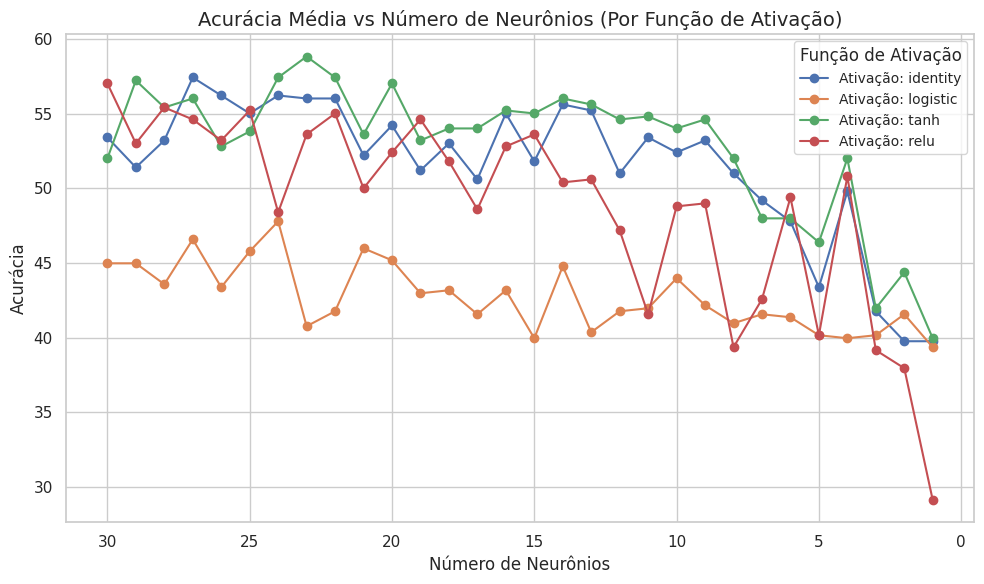

In [ ]:
# Transformar os resultados em um DataFrame para facilitar o plot
resultados_df = pd.DataFrame([
    {'neurons': k[0], 'activation': k[1], 'alpha': k[2], 'accuracy': v}
    for k, v in acuracias.items()
])

# Configurar estilo do Seaborn
seaborn.set(style="whitegrid")

# Gráfico simplificado: Acurácia por número de neurônios
plt.figure(figsize=(10, 6))

# Criar um gráfico de linhas para cada função de ativação
for act in resultados_df["activation"].unique():
    dados_filtrados = resultados_df[resultados_df["activation"] == act]
    medias = dados_filtrados.groupby("neurons")["accuracy"].mean()
    plt.plot(medias.index, medias.values, marker="o", label=f"Ativação: {act}")

# Configurações do gráfico
plt.title("Acurácia Média vs Número de Neurônios (Por Função de Ativação)", fontsize=14)
plt.xlabel("Número de Neurônios", fontsize=12)
plt.ylabel("Acurácia", fontsize=12)
plt.gca().invert_xaxis()  # Inverter o eixo X para mostrar de maior para menor
plt.legend(title="Função de Ativação", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

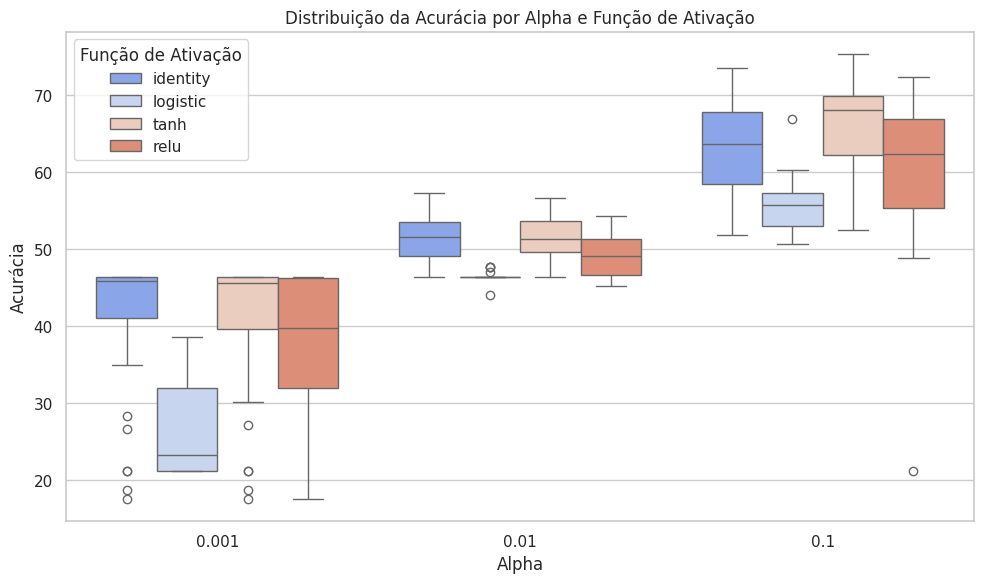

In [ ]:
# Gráfico: Comparação de acurácia por taxa de aprendizado inicial (Alpha)
plt.figure(figsize=(10, 6))
seaborn.boxplot(data=resultados_df, x="alpha", y="accuracy", hue="activation", palette="coolwarm")
plt.title("Distribuição da Acurácia por Alpha e Função de Ativação")
plt.xlabel("Alpha")
plt.ylabel("Acurácia")
plt.legend(title="Função de Ativação")
plt.tight_layout()
plt.show()
